# Exploratory Data Analysis of Professional (CS:GO) Gamer's Gear and Settings, and Modeling Player Accuracy  Performance  


#### Author: Thorneinsight@gmail.com


    
# Project Goals: 
    
* Describe Player equipment and setting choices at the pro level, including frequent combinations of equipment and settings.   
* Look for and describe trends in equipment/settings choices based on their properties (weight, sensitivity, mousepad speed, etc).
* Look to see if there is a relationship between player equipment/setting choices and whether they perform above the median of the dataset in terms of accuracy performance, when player role is accounted for (rifler vs awper).
* Optimise models to see what degree of accuracy player performance (in terms of their aim) can be predicted knowing only their gear and settings, when player role is accounted for.


## Why I'm doing this Project

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*I wanted my first personal Data Science project to be novel, answer questions I personally have, and be associated with data I believed I could obtain through web scraping. Now I don’t game as much as I used too, but I know that players are always talking about the properties of their equipment and settings (mouse weight, in-game-sensitivity, mousepad speed, etc.), and how these properties may give them an edge. I myself used to watch product reviews often, and experiment with different equipment. When I realized that no one had played with the data from prosettings.net, which I used to visit, in combination with player performance, I thought it was a great place to start.*

*What this project is:
-An exploratory data analysis to describe trends in what gear/settings pro players prefer, and an attempt to see what degree of accuracy you can model whether a player has above average aim based only on their gear/settings.*


*What this project not:
-Absolute Proof that the gear/settings/properties found to pass chi2 tests during feature selection, or those features optimizing the performance of certain models, make anyone aim better or worse! We can let ourselves get a little excited, though.*


### Lingo/Description of data

Data was obtained from prosettings.net, leetify.com, and thegamingsetup.com. Data is that of 118 total players.  

"CS:GO": Title of the game, Counter Strike: Global Offensive.  
"Role": Whether a player is an awper or rifler.  
"Awper": Player that has a precision role on the team. Uses the AWP rifle, which is a one-hit elimination.   
"Rifler": Player that has a more general role.  

"dpi": in-mouse sensitivity value, dots per inch    
"sens": in-game sensitivity value, however I immediately created an edpi feature which I refer to as "sens" or "sensitivity" throughout the project. The original value is not referred to again.    
"edpi" ("sens" or "sensitivity"): A player's crosshair will move quicker or slower around the world depending on dpi and in game sensitivity. Edpi gives a universal value, two players with different dpi and in game sensitivities can have the same edpi, and the crosshair will be equally sensitive to how much they move their mice across the pad. Higher edpi's are more sensitive to mouse movement.       
"mouse2": What mouse a player is using  
"width, height, length, size, weight": All mouse dimensions, in centimeters and grams.   
"type": Whether the mouse is designed to be held in right hand (ergonomic) or both right and left hand (ambidextrous).     
"hertz": Monitor setting, defines frame rate  
"resolution": in game setting, pixel density  
"aspect_ratio": in game setting, or how stretched the world appears  
"mouse_pad": The mouse pad a player is using  
"speed": The subjective speed or "control" feeling of the mouse moving on the pad. Higher numbers= slower speed, higher control.    
"acc spotted": The subject of this project, a player’s accuracy on their target when that target is in their field of view (more info on this later). Accuracy spotted will be a focus of this project.   
"scored high spotted", "target", "high-scorer": the class we are predicting during modeling. Whether a player's accuracy score is above or below the median value for his role

Mousepad speeds are written as float values, 1.0-6.0, while clusters are written as integer values, 0-3.



# Outline:

### To Run:  
* Under "Importing data from csv", enter your path to the file "CSGO_Scraped_Cleaned.csv". Cells must be run in order.
    
    
### Data web scraping, data importing and cleaning.
    
    
* Data was scraped in early September of 2021 using selenium (code is in repo) from prosettings.net for gear/settings, leetify.com for player performance (stats recorded over 1 year), and thegamingsetup.com / mouse-size-chart-table for mouse dimensions. Then the data was sorted in openrefine and excel so that all rows matched to the associated players, then all rows were dropped  that contained missing data. I then manually entered mouse pad speeds from a "Mousepad Master Sheet" made by a reddit user on r/MouseReview, and loaded in the csv. The code for webscraping comes in 3 files, and they essentially use the same method.

* Units had to be removed from many columns of data, data types were inconsistent, some data had to be manually entered when nans were returned during type conversion.

* Potential issues with data: This project makes the assumption that the player performance stats recorded on Leetify were recorded while players were using the gear/settings on prosettings.net. The data was scraped within the same day. The stats recorded from Leetify were recorded over a year, and this project also assumes that players did not change their equipment/settings during the season. Also, mousepad speeds are subjective, and some of the speeds that I entered manually required me to research the specific reviews and advertising for those pads. Also, our sample contains only 118 players, and so not every feature has enough players actually using it to give us a confident idea of how it fits in the whole population.

    

      
    
    
## Exploratory data analysis: 


### EDA Purpose:    
* Find and describe most frequent individual gear/settings used.
* Find an describe most frequent combinations of gear/settings used (apriori)
* Find and describe trends of gear/settings used based on general properties of those gear/settings (weight, sensitivity, mousepad speed, etc).
* Find and describe trends of gear/settings used based on player role (rifler vs awper)
* Attempt to separate players into clusters based on their gear/settings.
* Perform chi2 tests between all individual choices/freq-combinations/clusters to look for trends between them.
* Look for trends between player accuracy performance and their gear/settings choices through visualizations.
* Perform chi2 tests between all individual choices/freq-combinations/clusters and player accuracy performance.

 
### Methods Used: 
* Descriptive statistics, histograms, regression plots, pairplots, correlation matrices, apriori, chi2 tests, clustering 
    
    
### Feature creation: 
* Binning
* Apriori to find frequent gear/settings patterns and turn them into features
* Clustering to separate players based on their gear/settings choices and turn those clusters into features
* Created new mouse dimension, Volume, and new feature, Aspect + Resolution pair.





    
    

  
### Results of EDA:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*A large imbalance of players use the logitech g pro wireless and g pro superlight over other mice. The current market trend in mouse weight is to make mice as light as possible, often under 60g. Most csgo pro players evidently use heavier mice, at least relative to this trend (75% of players above 63g). Similarly players tend not to lean towards using smaller mice, as mean volume falls around what would be considered a medium sized mouse. Mean edpi is around 886. Most players use mousepads with slower speeds/higher control compared to all options on the market, the top four being the Steelseries qck heavy, Steelseries qck+, Zowie G-SR, and logitech G640. Almost half of players use one of the top 2 monitor settings:(1280x960, 4:03), or (1024x768, 4:03). Most players use over 144hz. Low sensitivity users may seem to prefer the monitor settings: (1920x1080, 16:09) more so than players using other sensitivities. No other interpretable patterns were found in terms of players choosing one gear/setting while using another. There are over three times as many riflers as awpers. More awpers tend to use edpi's above the median value of the dataset than not. Awpers also tend to have greater accuracy scores. Just as many Awpers use the logitech G Pro X Superlight as every other mouse. Most Players use the following gear/settings: 90% of players use refresh rates of 144-240hz, 74% of players medium-sized mice (mice that fit in a box 300-360 cm^3), 74% of players use aspect ratio 4:03, 60% of players use a mousepad surface speed/control rating of 5.0. There is no combination of features that over 50% of players use (outside of combinations of those features). Players could not be separated into well defined clusters based on original dataset features, left as numerical, evaluated based on cluster silhouette scores.*
  
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*The following are features passing a chi2 test performed on all features created with respect to whether the player is above or below the median accuracy score of their role(awper/rifler). This displays all features scoring at most p-value=0.1. Note that 0.1 is slightly lenient and that chi2 tests are not reliable on features with fewer players. Some of these features contain only 3 players. Note also that many of the pairs of features created from frequent patterns implicitly describe other individual features, and that many of these features are correlated. A positive result means that over all players that use this feature, more of them are high-scorers than expected given the distributions. These features were used for feature selection during modeling. The visualization displays how many players score above(1)/below(0) the median accuracy of their role when using(1)/not using(0) each feature. Bin and cluster interpretation is written below.*  

    
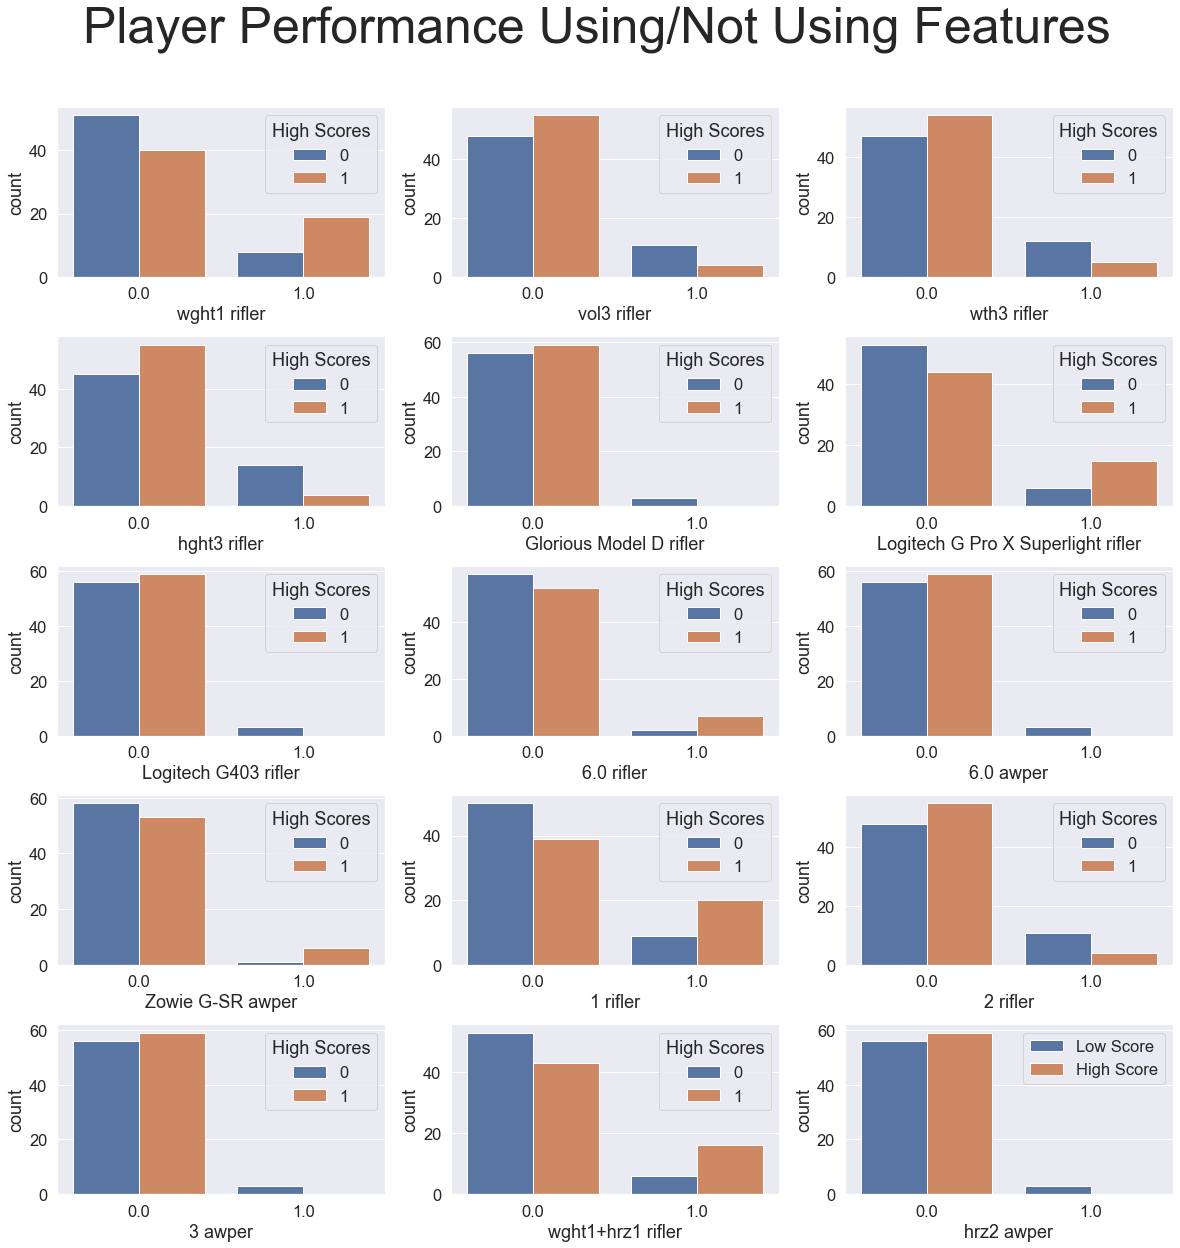  

    
**Bin Interpretation**: (bins are numbered starting from 1, 1<2<3)    
Weight bins (g):  (0.0, 67.7], (67.7, 87.4], (87.4, 200.0]    
Width bins (cm):  (5.2, 6.1], (6.1, 6.7], (6.7, 10.0]    
Length bins (cm):  (11.4, 12.0], (12.0, 12.4], (12.4, 12.8]    
Height bins (cm):  (3.5, 3.846], (3.846, 4.13], (4.13, 10.0]    
Volume bins (cm^3):  (218, 300], (300, 360], (360, 1000]    
Sens Bins (edpi):  (439, 800], (800, 1180], (1180, 3000]    
Hertz bins (hz):  (143, 240], (240, 555]                                                                 
The logitech g pro x superlight falls into bins: wght1, length2, wdth2, hght2, vol2.                                                                                

**Describing clusters:**      
lower bin number are lower values  
cluster 0: players that belong near: vol2, weight2, sens1, speed under 5, hrz1  
cluster 1: players that belong near: vol2, weight2, sens2, speed 5, hrz1, more likely to use (1280x960, 4:03)  
cluster 2: players that belong near: vol3, weight3, sens2, speed 5, hrz1, more likley to use (1024x768, 4:03)  
Cluster 3: players that belong near: vol2, weight2, sens2, speed 5, hrz2     

  



    
  
    
## Modeling: 
* Original features were used to train and evaluate models as baseline 
* Feature Selection:  
    Filter methods: Features that scored high on chi2 test were selected for modeling.   
    Wrapper methods: Forward and Backward Sequential Feature Selection was used to further select Features for Model   Performance        
* Logistic regression, Lasso, knn, and random forest.
* Grid search for parameter optimization was used for each model.

    
### Modeling Results:
**---Managed an increase in model performance of 17% through feature creation (binning, frequent patterns, clustering, separation by player role), filter methods(chi2 tests with target), and wrapper methods (sequential feature selection). Original Accuracies: Around 50%. Best Performing Model: Logistic Regression, Test Accuracy: 0.672, Train Accuracy: 0.678.**
    
*All Models were evaluated on average test and train accuracy scores across all splits of cross validation with k = 50 (nearly leave-one-out). Those average scores were also averaged together anywhere from 10 to 30 times.** 

    
#### Modeling using original features:  

    *Logistic Regression:*
    Test Accuracy: 0.50
    Train Accuracy:N/A
    
    *Logistic regression, Lasso, gridsearched regularization:*
    Best Parameter: C=.25
    Test Accuracy: 0.564
    Train Accuracy: 0.602
    
    *k nearest neighbors, gridsearched parameters:*
    Best Parameter: 'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
    Test Accuracy:0.531
    Train Accuracy: 0.595

    *Random Forest, gridsearched parameters:*
    Best Parameter: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 500}
    Test Accuracy: 0.50
    Train Accuracy: N/A 
    
   
#### Modeling using Sequential Feature Selector (scoring for accuracy) on features passing chi2 test, pvalue=.1, from list of over 300 features, including original features, frequent patterns, and clusters, all seperated by role:    


    *Logistic Regression:*
    Test Accuracy: 0.672
    Train Accuracy: 0.678
    Sfs chosen Features: ['Logitech G Pro X Superlight rifler', 'wght1+hrz1 rifler', '1 rifler', 'hght3 rifler', 'hrz2 awper', '6.0 awper', 'Zowie G-SR awper', '3 awper']
    Aproximate model coeeficients (taken from one cv run):
    (0.37847194  0.20237742  0.48302971 -0.92805684 -0.56933603 -0.72778813 1.0131123  -0.56933603)
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*Logistic Regression is our best performing model, and its classification accuracy has improved over 17% compared to our models that use the original features only. Our test and train accuracy are 0.672 and 0.678 respectivley, which suggests we are not overfitting. This is far better than a coin flip! Notice however how many of the chosen features end up in the model just to classify the 3 or so players that use them. Specifically, the features: '6.0 awper','hrz2 awper', and '3 awper'. There is no guarantee that the distribution of high-scorers using those features is the same across all players in reality, it's just that way in our sample of 118 players. However my goal was to see with what degree of accuracy you could currently model whether a players aim was above average based on their gear/settings alone, and I am happy with these results. I’m very curious what performance could be accomplished if I had more data, but also how this current model performs on the whole population.*   &nbsp;                           
&nbsp;

    *Random Forest, gridsearched parameters:*
    Best Params: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
    Test Accuracy:0.669
    Train Accuracy:0.67  

    *K Nearest Neighbors, gridsearched parameters:*
    Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
    Test Accuracy: 0.64
    Train Accuracy: 0.665
    sfs Chosen Features:['wght1 rifler', 'wght1+hrz1 rifler', '1 rifler', 'hght3 rifler', 'hrz2 awper', '6.0 awper', 'Zowie G-SR awper', '3 awper']
    
  
    

    
    
    

    
    

### Possible Recommendations of equipment/settings to use:
*If you are a rifler:*

Use lighter mice or the Logitech g pro x superlight, avoid larger sized mice.

This is because players using certain features have a significant imbalance in high/low scoring players. The following features all passed the (lenient) chi2 test with the scored_high_spotted target, but also have at least 15 players using them: 

The Logitech g pro x superlight, weight1, clust1 (the Logitech g pro x superlight accounts for most of the mice in the weight1 bin and cluster 1) tend to have an imbalance favoring high-scoring players.  

More players using features hght3, wth3, vol3, and clust2 rifler (which contains vol3, weight3), tend to have an imbalance favoring low-scoring players.  


However, we can still only guess who is a high-scoring player with 67.2% accuracy based on their gear/settings, and we had a small sample of players to analyze. At the end of the day, it's important to use what works best for you!   
                     
                     

### Issues with data that could affect analysis and model accuracy:

* We have not accounted for sponsorships, for instance, the logitech g pro x superlight has a few high scoring players, what if a few of them are forced to use the mouse, as they became sponsored by logitech because they were recognized as good players in the first place?
* Some of the features that end up in the models after chi2 tests are represented by only 3 players.
* Clusters were not generated to maximize model accuracy nor could they be well defined.
* We only have 118 players in this sample
* Features like mousepad speed are subjective
* The player's gear and stats may not match
* We are relying on Leetify's accuracy scoring system
* We are relying on the mouse measurements of one source
* Even if these results were certain and represent the whole professional player population, they may not apply to the average player. 



### Ok, let's start.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


pd.options.mode.chained_assignment = None  # default='warn'


### Importing and continuing to clean data

#### Importing data from csv

In [2]:
df = pd.read_csv()


df2 = df[['hs acc', 'acc all', 'acc spotted', 'time_to_damage', 'sens', 'dpi', 'role', 'mouse2', 'width', 'height',
          'length', 'size', 'weight', 'type', 'hertz', 'resolution','aspect_ratio', 'mouse_pad', 'speed']]

df2.head()

,hs acc,acc all,acc spotted,time_to_damage,sens,dpi,role,mouse2,width,height,length,size,weight,type,hertz,resolution,aspect_ratio,mouse_pad,speed
0,16.82%,17.45%,38.93%,528 ms,2.20,400,Rifler,Zowie FK1+,6.20,3.8,12.8,M,95.0,Ambidextrous,240,1680x1050,16:10,Zowie G-SR DG,4
1,18.57%,17.84%,37.97%,549 ms,2.50,400,Rifler,Zowie FK1,6.00,3.7,12.8,M / S,90.0,Ambidextrous,240,1024x768,4:03,SteelSeries QcK Heavy,5
2,15.65%,23.18%,43.30%,503 ms,2.20,400,Rifler,Zowie EC2-A,6.40,4.0,12.0,M,93.0,Ergonomic,360,1024x768,4:03,ASUS ENCE Edition,4
3,16.56%,16.86%,40.50%,527 ms,1.05,800,Rifler,Logitech G Pro Wireless,6.35,4.0,12.5,M / L,80.0,Ambidextrous,240,1440x1080,4:03,SteelSeries QcK Heavy,5
4,20.04%,23.06%,42.87%,500 ms,3.00,400,AWPer,Logitech G Pro Wireless,6.35,4.0,12.5,M / L,80.0,Ambidextrous,360,1280x960,4:03,Logitech G640 ENCE Edition,5


#### Description of Data

sens: in game mouse sensitivity value, however I immediately created an edpi feature which I refer to as sens or sensitivity throughout the project. The original value is not referred to again.  
edpi ("sens" or "sensitivity"): A player's crosshair will move quicker or slower around the world depending on dpi and in game sensitivity. Edpi gives a universal value, two players with different dpi and in game sensitivities can have the same edpi, and the crosshair will be equally sensitive to how much they move their mice across the pad. Higher edpi's are more sensitive to mouse movement.    
dpi: in-mouse sensitivity value, dots per inch  
mouse2: What mouse a player is using  
width, height, length, size, weight: All mouse dimensions, in centimeters and grams.   
type: Whether the mouse is designed to be held in right hand (ergonomic) or both right and left hand (ambidextrous).     
hertz: Monitor setting, defines frame rate  
resolution: in game setting, pixel density  
aspect_ratio: in game setting, how stretched the world appears  
mouse_pad: The mouse pad a player is using  
speed: The subjective speed or "control" feeling of the mouse moving on the pad. Higher numbers= slower speed, higher control.  
time_to_damage: How long it takes a player to react and land a shot  
hs acc: headshot accuracy  
acc spotted: The subject of this project, a player’s accuracy on their target when that target is in their field of view  
Accuracy spotted will be a focus of this project as opposed to creating my own performance metric, since for instance, awpers do not rely as much on hs accuracy, and this simplifies things. I have the most confidence in spotted accuracy as a target for classification since Leetify defines it as:  
  
"Accuracy (Enemy Spotted)  
This is the accuracy number we primarily focus on, e.g. in our graphics and app. Given that we can detect when you had an enemy spotted, this is the most accurate number to measure your accuracy by.

What is it?  
When you were actually firing at a target, how accurate were you? For example, this would exclude any time you're spamming through a smoke or wall. Only shots when you were actually shooting at an enemy in your field of view count. Naturally, you want to push this number as high as possible, no matter what Wayne Gretzky said.

How is it calculated  
All hits divided by all shots while you had an enemy spotted."



#### Replaced dpi manually:

In [3]:
#Lets find the nans for dpi
df2['dpi'] = pd.to_numeric(df2['dpi'], errors = 'coerce') #sets invalids to Nan, now i find index
truefalse = np.isnan(df2['dpi']) #creates an array of tru false for nans
indices = np.where(truefalse)[0]
print(indices) #there are 6

print(df2.loc[31, 'dpi']) 
print(df2.loc[52, 'dpi'])
print(df2.loc[82, 'dpi'])
print(df2.loc[101, 'dpi'])
print(df2.loc[102, 'dpi'])
print(df2.loc[112, 'dpi'])

[ 31  52  82 101 102 112]
nan
nan
nan
nan
nan
nan


#### We manually replace those strings with numericals

In [4]:
#VALUES ARE: 1600, 1600, 1800, 1200, 1600, 1600
df2.loc[31, 'dpi'] = 1600
df2.loc[52, 'dpi'] = 1600
df2.loc[82, 'dpi'] = 1800
df2.loc[101, 'dpi'] = 1200
df2.loc[102, 'dpi'] = 1600
df2.loc[112, 'dpi'] = 1600



#### Creating edpi feature, since we already have the necessary data, (easier than cleaning edpi from csv)

In [5]:
df2['dpi'] = df2['dpi'].astype("float")
df2['sens'] = df2['dpi']*df2['sens']

Description of edpi:
     A player's crosshair will move quicker or slower around the world depending on dpi and in game sensitivity. Edpi gives a universal value, two players with different dpi and in game sensitivities can have the same edpi, and the crosshair will be equally sensitive to how much they move their mice across the pad. Higher edpi's are more sensitive to mouse movement.

#### Removing units

In [6]:
#removing units
df2['hs acc'] = df2['hs acc'].str.replace('%', '')
df2['acc all'] = df2['acc all'].str.replace('%', '')
df2['time_to_damage'] = df2['time_to_damage'].str.replace(' ms', '')
df2['acc spotted'] = df2['acc spotted'].str.replace('%', '')
#fixing M / L and M/L to be the same
df2['size'] = df2['size'].str.replace('M/L', 'M / L')  

#### Changing columns from object to float

In [7]:
df2['hs acc'] = pd.to_numeric(df2['hs acc'], downcast= "float")
df2['hs acc'] = df2['hs acc'].astype("float", copy=True, errors='raise') #any of these seem to work
df2['hs acc'] = df2['hs acc'].apply(pd.to_numeric)

df2['acc all'] = df2['acc all'].astype("float")
df2['acc spotted'] = df2['acc spotted'].astype("float")
df2['time_to_damage'] = df2['time_to_damage'].astype("float")

df2['length'] = df2['length'].astype("float") #these 3 just in case (not sure if float)
df2['width'] = df2['width'].astype("float")
df2['height'] = df2['height'].astype("float")

df2['speed'] = df2['speed'].astype("float") #just in case

#### Creating feature, "volume" to use instead of mouse size column, which was subjective to the person who created it.

In [8]:
df2['volume'] = df2['length']*df2['width']*df2['height']

#### Creating classification targets

In [9]:
hs_acc_array = df2['hs acc'].to_numpy()
hs_avg = np.mean(hs_acc_array)

acc_spotted_array = df2['acc spotted'].to_numpy()
acc_spotted_med= np.median(acc_spotted_array)
# print(acc_spotted_med)
# print(acc_spotted_array)


df2["scored_high_spotted"] = 0 + (acc_spotted_array >= acc_spotted_med) 
# print(df2['scored_high_spotted'])

### Feature Creation, Monitor settings
*Apriori to find all frequent monitor setting pairs. Players don’t use every possible combination of resolution/aspect ratio, so this will actually act as dimensionality reduction and become a feature that better represents a player’s monitor preferences than resolution/aspect ratio alone.*

In [10]:
from mlxtend.frequent_patterns import apriori
#to use for modeling: multiply one column by the other for each pair, if 1 = a pair, 0 if not

res_dums_apr = pd.get_dummies(df2['resolution'], drop_first=False)
aspect_dums_apr = pd.get_dummies(df2['aspect_ratio'], drop_first=False)
frames_screen_apr = [aspect_dums_apr, res_dums_apr]
result_screen_apr = pd.concat(frames_screen_apr, axis = 1)
apriori(result_screen_apr, min_support=0.0000000000000000000001, use_colnames=True) #used this to find pairs for screens 

,support,itemsets
0,0.127119,(16:09)
1,0.084746,(16:10)
2,0.737288,(4:03)
3,0.050847,(5:04)
4,0.228814,(1024x768)
5,0.050847,(1152x864)
6,0.067797,(1280x1024)
7,0.033898,(1280x800)
8,0.364407,(1280x960)
9,0.008475,(1366x768)


#### Creating new feature, monitor settings pairs, and one hot encoding it.

In [11]:
frames_cat2 = [aspect_dums_apr, res_dums_apr] 
result_cat2 = pd.concat(frames_cat2, axis = 1)
result_cat2["(1280x800, 16:10)"] = res_dums_apr['1280x800']*aspect_dums_apr['16:10']
result_cat2["(1440:900, 16:10)"] = res_dums_apr['1440:900']*aspect_dums_apr['16:10'] #1440x900 is written with a ":" in the dfs
result_cat2["(1680x1050, 16:10)"] = res_dums_apr['1680x1050']*aspect_dums_apr['16:10']
result_cat2["(1152x864, 4:03)"] = res_dums_apr['1152x864']*aspect_dums_apr['4:03']
result_cat2["(1280x1024, 4:03)"] = res_dums_apr['1280x1024']*aspect_dums_apr['4:03']
result_cat2["(1280x960, 4:03)"] = res_dums_apr['1280x960']*aspect_dums_apr['4:03']
result_cat2["(1440x1080, 4:03)"] = res_dums_apr['1440x1080']*aspect_dums_apr['4:03']
result_cat2["(800x600, 4:03)"] = res_dums_apr['800x600']*aspect_dums_apr['4:03']
result_cat2["(1280x1024, 5:04)"] = res_dums_apr['1280x1024']*aspect_dums_apr['5:04']
result_cat2["(1920x1080, 16:09)"] = res_dums_apr['1920x1080']*aspect_dums_apr['16:09']
result_cat2["(1024x768, 4:03)"] = res_dums_apr['1024x768']*aspect_dums_apr['4:03']
result_cat2["(1366x768, 16:09)"] = res_dums_apr['1366x768']*aspect_dums_apr['16:09']
result_cat2["(1600x900, 16:09)"] = res_dums_apr['1600x900']*aspect_dums_apr['16:09']


freq_monitor_frames = [result_cat2["(1280x800, 16:10)"], result_cat2["(1440:900, 16:10)"], result_cat2["(1680x1050, 16:10)"],
                result_cat2["(1152x864, 4:03)"], result_cat2["(1280x1024, 4:03)"], result_cat2["(1280x960, 4:03)"],
                result_cat2["(1440x1080, 4:03)"], result_cat2["(800x600, 4:03)"], result_cat2["(1280x1024, 5:04)"], 
                result_cat2["(1920x1080, 16:09)"], result_cat2["(1024x768, 4:03)"], result_cat2["(1366x768, 16:09)"], 
                result_cat2["(1600x900, 16:09)"]]


freq_monitor1=pd.concat(freq_monitor_frames, axis = 1) #(1) to distinguish from dums name for modeling

#dont want to use freq_monitor as its called down the line. So ill make a temp df, freq_monitors(s)

#(needed to make as strings so we can add the text together)
#use combine first, which targets nans to replace, so still need to make 0's nans
freq_monitors = pd.DataFrame()
freq_monitors["(1280x800, 16:10)"] = freq_monitor1["(1280x800, 16:10)"].replace(1, "(1280x800, 16:10)")
freq_monitors["(1280x800, 16:10)"] = freq_monitors["(1280x800, 16:10)"].replace(0, np.nan)

freq_monitors["(1440:900, 16:10)"] = freq_monitor1["(1440:900, 16:10)"].replace(1, "(1440:900, 16:10)")
freq_monitors["(1440:900, 16:10)"] = freq_monitors["(1440:900, 16:10)"].replace(0, np.nan)

freq_monitors["(1680x1050, 16:10)"] = freq_monitor1["(1680x1050, 16:10)"].replace(1, "(1680x1050, 16:10)")
freq_monitors["(1680x1050, 16:10)"] = freq_monitors["(1680x1050, 16:10)"].replace(0, np.nan)

freq_monitors["(1152x864, 4:03)"] = freq_monitor1["(1152x864, 4:03)"].replace(1, "(1152x864, 4:03)")
freq_monitors["(1152x864, 4:03)"] = freq_monitors["(1152x864, 4:03)"].replace(0, np.nan)

freq_monitors["(1280x1024, 4:03)"] = freq_monitor1["(1280x1024, 4:03)"].replace(1, "(1280x1024, 4:03)")
freq_monitors["(1280x1024, 4:03)"] = freq_monitors["(1280x1024, 4:03)"].replace(0, np.nan)

freq_monitors["(1280x960, 4:03)"] = freq_monitor1["(1280x960, 4:03)"].replace(1, "(1280x960, 4:03)")
freq_monitors["(1280x960, 4:03)"] = freq_monitors["(1280x960, 4:03)"].replace(0, np.nan)

freq_monitors["(1440x1080, 4:03)"] = freq_monitor1["(1440x1080, 4:03)"].replace(1, "(1440x1080, 4:03)")
freq_monitors["(1440x1080, 4:03)"] = freq_monitors["(1440x1080, 4:03)"].replace(0, np.nan)

freq_monitors["(800x600, 4:03)"] = freq_monitor1["(800x600, 4:03)"].replace(1, "(800x600, 4:03)")
freq_monitors["(800x600, 4:03)"] = freq_monitors["(800x600, 4:03)"].replace(0, np.nan)

freq_monitors["(1280x1024, 5:04)"] = freq_monitor1["(1280x1024, 5:04)"].replace(1, "(1280x1024, 5:04)")
freq_monitors["(1280x1024, 5:04)"] = freq_monitors["(1280x1024, 5:04)"].replace(0, np.nan)

freq_monitors["(1920x1080, 16:09)"] = freq_monitor1["(1920x1080, 16:09)"].replace(1, "(1920x1080, 16:09)")
freq_monitors["(1920x1080, 16:09)"] = freq_monitors["(1920x1080, 16:09)"].replace(0, np.nan)


freq_monitors["(1024x768, 4:03)"] = freq_monitor1["(1024x768, 4:03)"].replace(1, "(1024x768, 4:03)")
freq_monitors["(1024x768, 4:03)"] = freq_monitors["(1024x768, 4:03)"].replace(0, np.nan)


freq_monitors["(1366x768, 16:09)"] = freq_monitor1["(1366x768, 16:09)"].replace(1, "(1366x768, 16:09)")
freq_monitors["(1366x768, 16:09)"] = freq_monitors["(1366x768, 16:09)"].replace(0, np.nan)

freq_monitors["(1600x900, 16:09)"] = freq_monitor1["(1600x900, 16:09)"].replace(1, "(1600x900, 16:09)")
freq_monitors["(1600x900, 16:09)"] = freq_monitors["(1600x900, 16:09)"].replace(0, np.nan)




#cant reset df must name it somehting else, otherwise old columns to combine dont exist
#WONT REPLACE IF THEY ARE STRINGS!
freq_monitorss = freq_monitors["(1280x800, 16:10)"].combine_first(freq_monitors["(1440:900, 16:10)"])
#combine one with the other to start, then result with the next, and that result with the next
freq_monitorss=freq_monitorss.combine_first(freq_monitors["(1680x1050, 16:10)"])
freq_monitorss=freq_monitorss.combine_first(freq_monitors["(1152x864, 4:03)"])
freq_monitorss=freq_monitorss.combine_first(freq_monitors["(1280x1024, 4:03)"])
freq_monitorss=freq_monitorss.combine_first(freq_monitors["(1280x960, 4:03)"])
freq_monitorss=freq_monitorss.combine_first(freq_monitors["(1440x1080, 4:03)"])
freq_monitorss=freq_monitorss.combine_first(freq_monitors["(800x600, 4:03)"])
freq_monitorss=freq_monitorss.combine_first(freq_monitors["(1280x1024, 5:04)"])
freq_monitorss=freq_monitorss.combine_first(freq_monitors["(1920x1080, 16:09)"])
freq_monitorss=freq_monitorss.combine_first(freq_monitors["(1024x768, 4:03)"])
freq_monitorss=freq_monitorss.combine_first(freq_monitors["(1366x768, 16:09)"])
freq_monitorss=freq_monitorss.combine_first(freq_monitors["(1600x900, 16:09)"])




# print(freq_monitorss)
df2["freq monitors"] = freq_monitorss
print(df2["freq monitors"]) #all monitors are in df2 for eda

0      (1680x1050, 16:10)
1        (1024x768, 4:03)
2        (1024x768, 4:03)
3       (1440x1080, 4:03)
4        (1280x960, 4:03)
              ...        
113      (1152x864, 4:03)
114     (1280x800, 16:10)
115      (1024x768, 4:03)
116      (1152x864, 4:03)
117      (1280x960, 4:03)
Name: freq monitors, Length: 118, dtype: object


#### One hot encoding catagoricals for use in feature creation and modeling

In [12]:
#doesnt drop a column, used for eda and feature creation
role_dums_eda = pd.get_dummies(df2['role'], drop_first=False)
size_dums_eda = pd.get_dummies(df2['size'], drop_first=False)
mouse_dums_eda = pd.get_dummies(df2['mouse2'], drop_first=False)
type_dums_eda = pd.get_dummies(df2['type'], drop_first=False)
res_dums_eda = pd.get_dummies(df2['resolution'], drop_first=False)
aspect_dums_eda = pd.get_dummies(df2['aspect_ratio'], drop_first=False)
mpad_dums_eda = pd.get_dummies(df2['mouse_pad'], drop_first=False)
speed_dums_eda = pd.get_dummies(df2['speed'], drop_first=False)

#drops a columns, used for modeling
role_dums_mod = pd.get_dummies(df2['role'], drop_first=True)
size_dums_mod = pd.get_dummies(df2['size'], drop_first=True)
mouse_dums_mod = pd.get_dummies(df2['mouse2'], drop_first=True)
type_dums_mod = pd.get_dummies(df2['type'], drop_first=True)
res_dums_mod = pd.get_dummies(df2['resolution'], drop_first=True)
aspect_dums_mod = pd.get_dummies(df2['aspect_ratio'], drop_first=True)
mpad_dums_mod = pd.get_dummies(df2['mouse_pad'], drop_first=True)
speed_dums_mod = pd.get_dummies(df2['speed'], drop_first=True)




#and now dummies for modeling, which we will concat back with res and aspect dums 
freq_monitor_mod = pd.get_dummies(df2["freq monitors"], drop_first=True) #DUMS FOR MODELING, used further down

result_cat2_frames_mod = [aspect_dums_mod, res_dums_mod, freq_monitor_mod]
result_cat2_mod = pd.concat(result_cat2_frames_mod, axis = 1) #ALSO FOR MODELING, USED HEAVILY FURTHER DOWN
# print(df2)

freq_monitor_eda = pd.get_dummies(df2["freq monitors"], drop_first=False) #For eda/feature selection

result_cat2_frames_eda = [aspect_dums_eda, res_dums_eda, freq_monitor_eda]
result_cat2_eda = pd.concat(result_cat2_frames_eda, axis = 1)

### Exploratory Data Analysis

In [13]:
df2.describe().apply(lambda s: s.apply('{0:.5f}'.format)) #removes scientific notation

,hs acc,acc all,acc spotted,time_to_damage,sens,dpi,width,height,length,weight,hertz,speed,volume,scored_high_spotted
count,118.00000,118.00000,118.00000,118.00000,118.00000,118.00000,118.00000,118.00000,118.00000,118.00000,118.00000,118.00000,118.00000,118.00000
mean,20.84881,18.15661,40.19347,510.11017,886.49153,597.54237,6.39822,4.01181,12.43093,78.75593,250.57627,4.71186,319.75026,0.50000
std,3.59378,3.21467,3.31694,28.43309,263.69384,296.24988,0.30549,0.16316,0.26194,13.63540,39.00831,0.80704,29.71709,0.50213
min,12.73000,12.58000,34.23000,428.00000,440.00000,400.00000,5.30000,3.57000,11.60000,48.00000,144.00000,1.00000,219.48360,0.00000
25%,18.57250,15.81000,37.74750,494.50000,760.00000,400.00000,6.35000,4.00000,12.40000,63.00000,240.00000,4.00000,307.20000,0.00000
50%,20.81000,17.84000,39.69000,510.00000,880.00000,400.00000,6.35000,4.00000,12.50000,80.00000,240.00000,5.00000,317.50000,0.50000
75%,22.78000,20.35000,42.86250,528.00000,1032.00000,800.00000,6.40000,4.00000,12.50000,92.25000,240.00000,5.00000,317.50000,1.00000
max,32.23000,29.73000,50.66000,574.00000,2160.00000,1800.00000,7.10000,4.40000,12.80000,107.00000,360.00000,6.00000,391.16000,1.00000


#### Histograms of Features

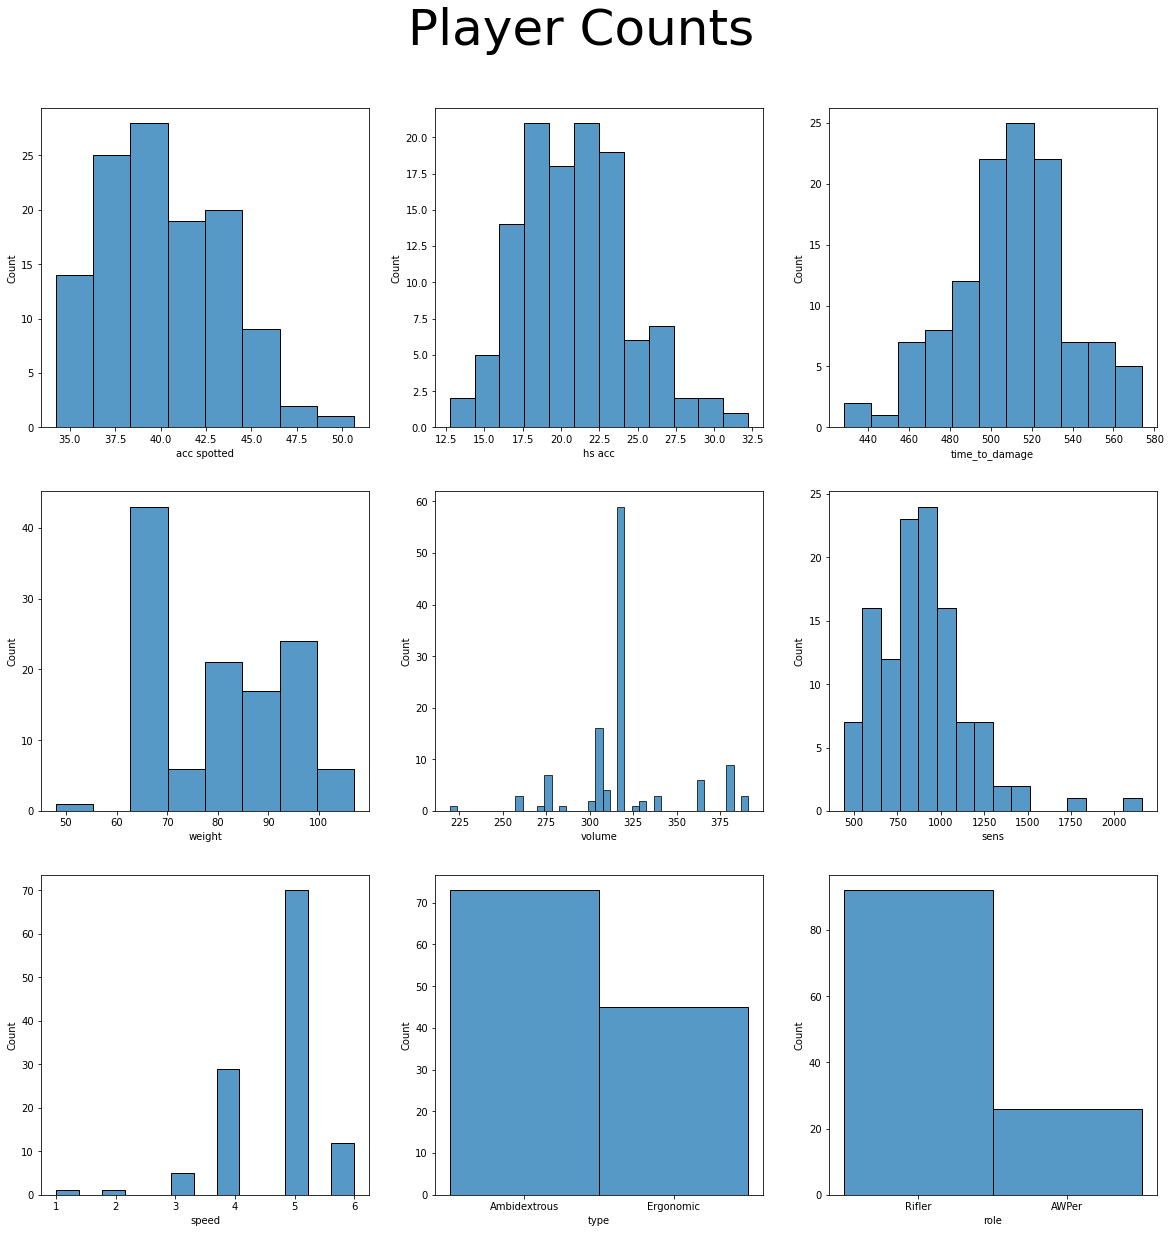

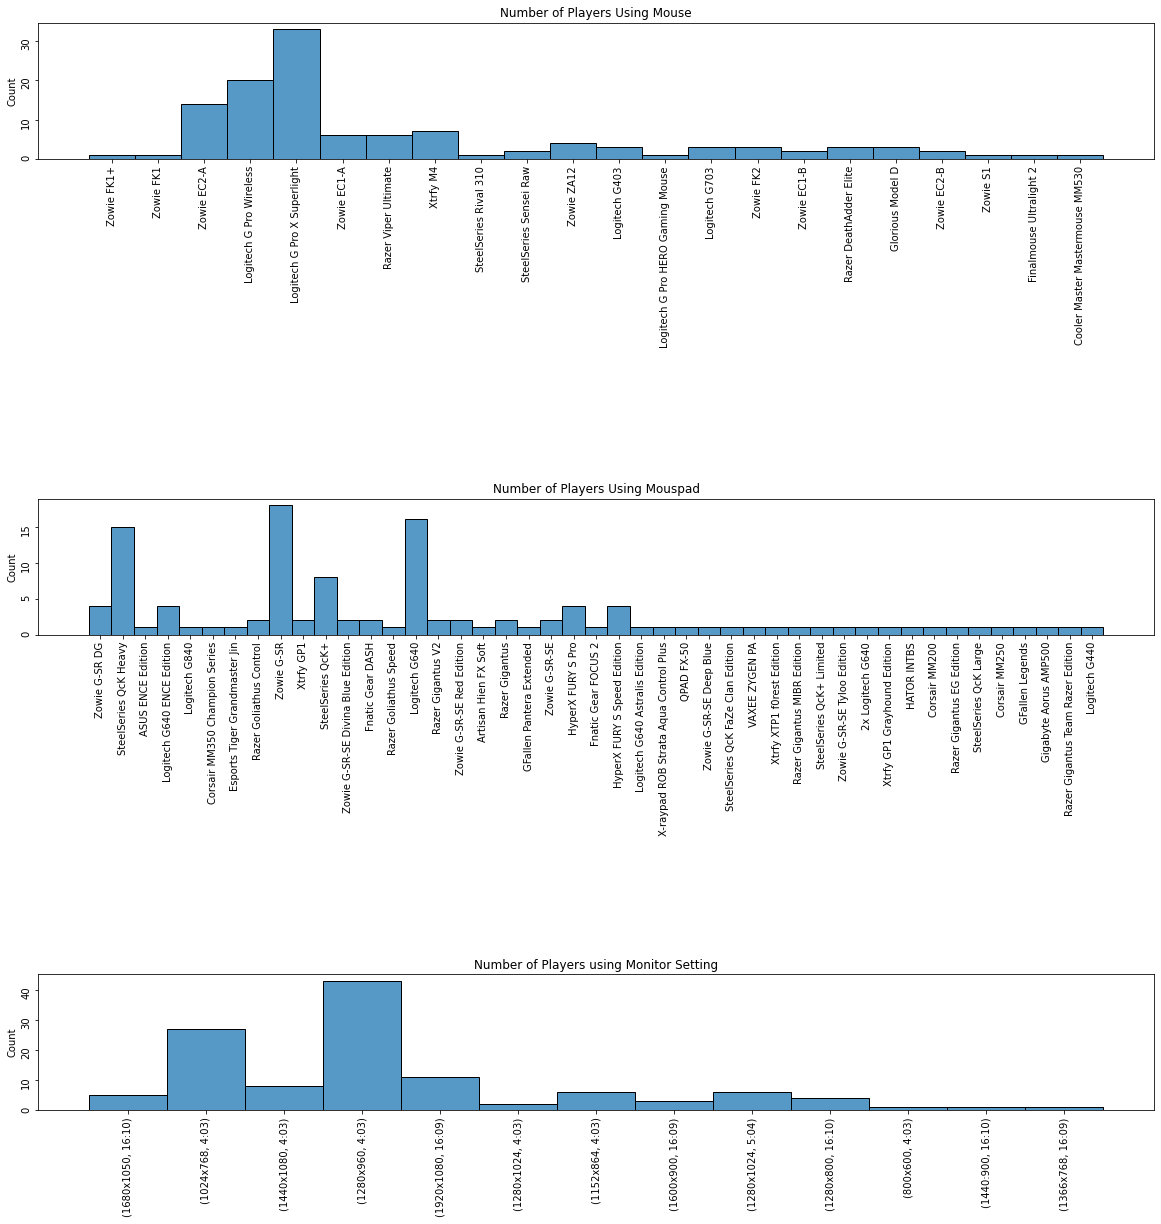

In [14]:
#HISTOGRAM DISPLAY
from seaborn import histplot
#acc dist is skewed
#huge imbalance of mice
#imbalance of monitor settings
#not a lot of count to go around

fig, axs = plt.subplots(3, 3, figsize=(20,20))
fig.suptitle("Player Counts", y=.95, fontsize=50)


hist3 = histplot(df2["acc spotted"], ax=axs[0, 0])
hist4 = histplot(df2["hs acc"], ax=axs[0, 1])
hist4 = histplot(df2["time_to_damage"], ax=axs[0, 2])

hist1 = histplot(df2["weight"], ax=axs[1, 0])
hist2 = histplot(df2["volume"], ax=axs[1, 1])
hist3 = histplot(df2["sens"], ax=axs[1, 2])
hist4 = histplot(df2["speed"], ax=axs[2, 0])
hist4 = histplot(df2["type"], ax=axs[2, 1])


hist4 = histplot(df2["role"], ax=axs[2, 2])


plt.show()



fig, axs = plt.subplots(3, 1, figsize=(20,20))

hist4 = histplot(df2["mouse2"], ax=axs[0], legend=False)
hist4.set(xlabel=None)

hist4 = histplot(df2["mouse_pad"], ax=axs[1], legend=False)
hist4.set(xlabel=None)

hist4 = histplot(df2["freq monitors"], ax=axs[2], legend=False)
hist4.set(xlabel=None)

for ax in fig.axes:
    ax.tick_params(labelrotation=90)
    

axs[0].title.set_text('Number of Players Using Mouse')#just call on axs[] instead of ax[]
axs[0].title.set_size('large')
axs[1].title.set_text('Number of Players Using Mouspad')
axs[1].title.set_size('large')
axs[2].title.set_text('Number of Players using Monitor Setting')
axs[2].title.set_size('large')
fig.subplots_adjust(hspace=2.5)
fig.tight_layout
plt.show()


*There is a near-normal distribution of performance metrics. Accuracy spotted looks slightly skewed. A large imbalance of players use the logitech g pro wireless and g pro superlight over other mice, which is reflected in the "volume" and "weight" histograms. The current market trend in mouse weight is to make mice as light as possible, often under 60g. Most csgo pro players evidently use heavier mice, at least relative to this trend (75% of players above 63g). Similarly players tend not to lean towards using smaller mice, as mean volume falls around what would be considered a medium sized mouse. Mean edpi is around 886. Most players use mousepads with slower speeds/higher control compared to all options on the market, the top four bieng the Steelseries qck heavy, Steelseries qck+, Zowie G-SR, and logitech G640. Almost half of players use one of the top 2 monitor settings:(1280x960, 4:03), or (1024x768, 4:03). Most players use over 144hz. There are over three times as many riflers as awpers.* 

#### Regression of Numerical Features

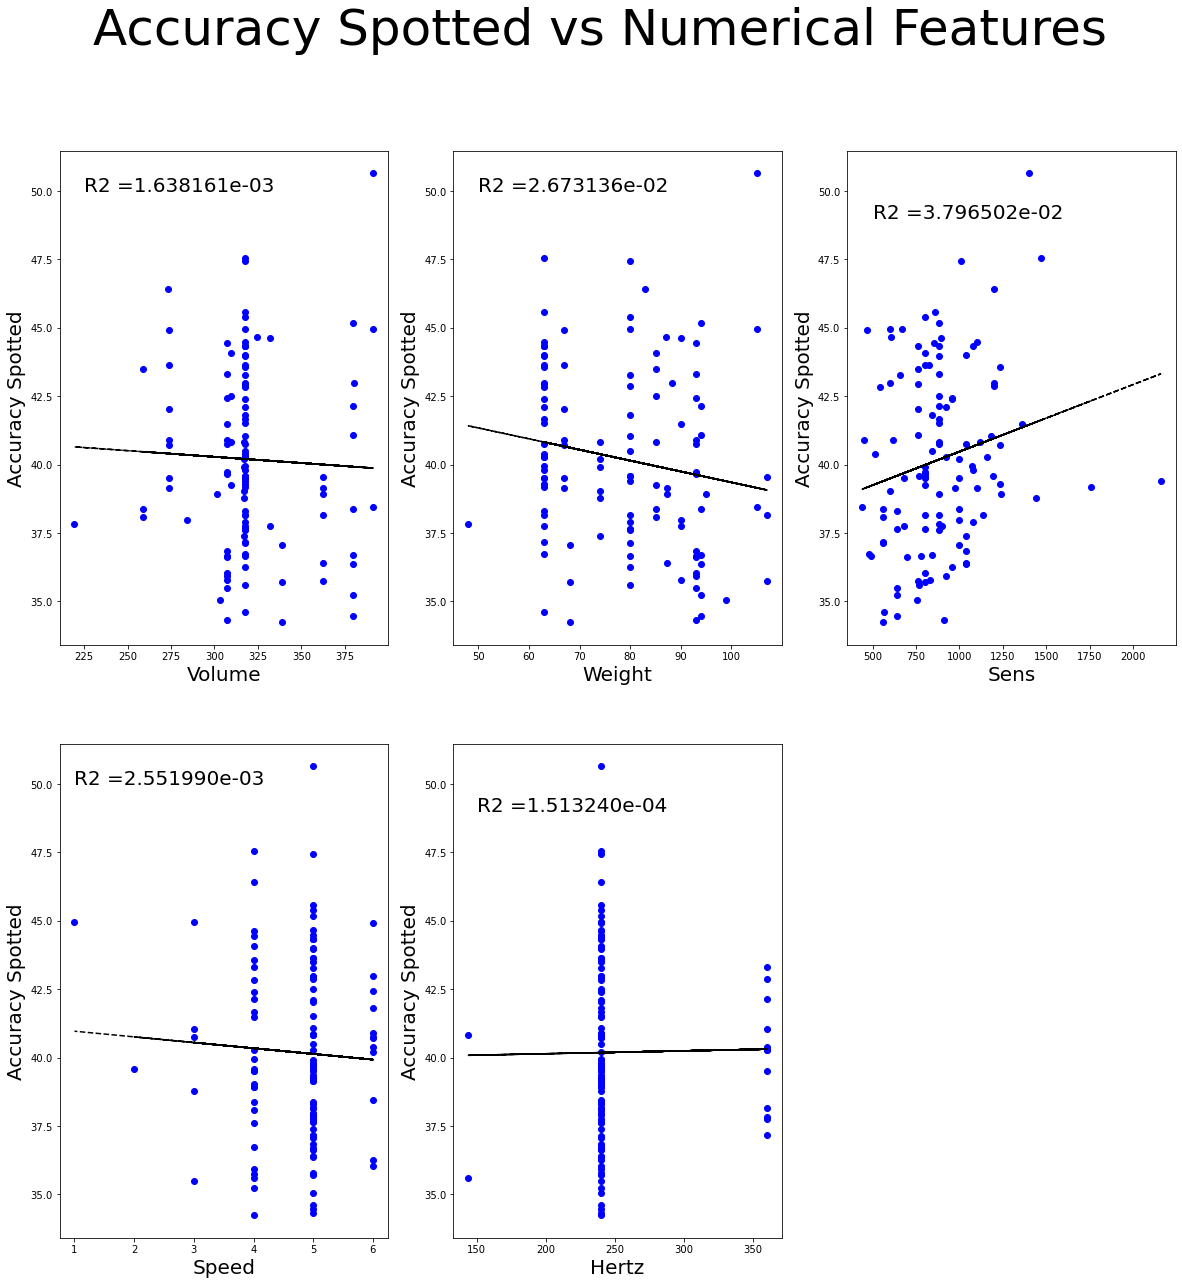

In [15]:
from seaborn import lmplot
from sklearn.metrics import r2_score


fig = plt.figure(figsize=(20,20))
plt.subplot(2, 3, 1) #2 row, 2 col, 1st plot
fig.suptitle('Accuracy Spotted vs Numerical Features', fontsize=50)




coef = np.polyfit(df2["volume"], df2['acc spotted'], 1)
poly1d_fn = np.poly1d(coef)
R2 = r2_score(df2['acc spotted'], poly1d_fn(df2["volume"]))
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(df2["volume"], df2['acc spotted'], 'bo', df2["volume"], poly1d_fn(df2["volume"]), '--k') 
plt.xlabel("Volume", fontsize=20)
plt.ylabel("Accuracy Spotted", fontsize=20)
plt.text(225, 50, "R2 =" "{:e}".format(R2) , fontsize=20)



coef = np.polyfit(df2["weight"], df2['acc spotted'], 1)
poly1d_fn = np.poly1d(coef) 
R2 = r2_score(df2['acc spotted'], poly1d_fn(df2["weight"]))


plt.subplot(2, 3, 2)
plt.plot(df2["weight"], df2['acc spotted'], 'bo', df2["weight"], poly1d_fn(df2["weight"]), '--k')
plt.xlabel("Weight", fontsize=20)
plt.ylabel("Accuracy Spotted", fontsize=20)
plt.text(50, 50, "R2 =" "{:e}".format(R2) , fontsize=20)



coef = np.polyfit(df2["sens"], df2['acc spotted'], 1)
poly1d_fn = np.poly1d(coef) 
R2 = r2_score(df2['acc spotted'], poly1d_fn(df2["sens"]))


plt.subplot(2, 3, 3)
plt.plot(df2["sens"], df2['acc spotted'], 'bo', df2["sens"], poly1d_fn(df2["sens"]), '--k')
plt.xlabel("Sens", fontsize=20)
plt.ylabel("Accuracy Spotted", fontsize=20)
plt.text(500, 49, "R2 =" "{:e}".format(R2) , fontsize=20)



coef = np.polyfit(df2["speed"], df2['acc spotted'], 1)
poly1d_fn = np.poly1d(coef) 
R2 = r2_score(df2['acc spotted'], poly1d_fn(df2["speed"]))


plt.subplot(2, 3, 4)
plt.plot(df2["speed"], df2['acc spotted'], 'bo', df2["speed"], poly1d_fn(df2["speed"]), '--k')
plt.xlabel("Speed", fontsize=20)
plt.ylabel("Accuracy Spotted", fontsize=20)
plt.text(1, 50, "R2 =" "{:e}".format(R2) , fontsize=20)



coef = np.polyfit(df2["hertz"], df2['acc spotted'], 1)
poly1d_fn = np.poly1d(coef) 
R2 = r2_score(df2['acc spotted'], poly1d_fn(df2["hertz"]))


plt.subplot(2, 3, 5)
plt.plot(df2["hertz"], df2['acc spotted'], 'bo', df2["hertz"], poly1d_fn(df2["hertz"]), '--k')
plt.xlabel("Hertz", fontsize=20)
plt.ylabel("Accuracy Spotted", fontsize=20)
plt.text(150, 49, "R2 =" "{:e}".format(R2) , fontsize=20)



plt.tight_layout
plt.show()
#plt.close('all')

*While it may visually appear that there is some linear correlation between weight and accuracy, and sensitivity and accuracy,
the r^2 values are extraordinarily low. Of course, relations between these features and accuracy will continue to be explored in other ways*


### Pairplot of Numerical Features with Roles Highlighted
#### Are there any linear trends between numerical gear and setting features chosen by players? Is there a visible seperation between gear/settings of riflers and awpers?

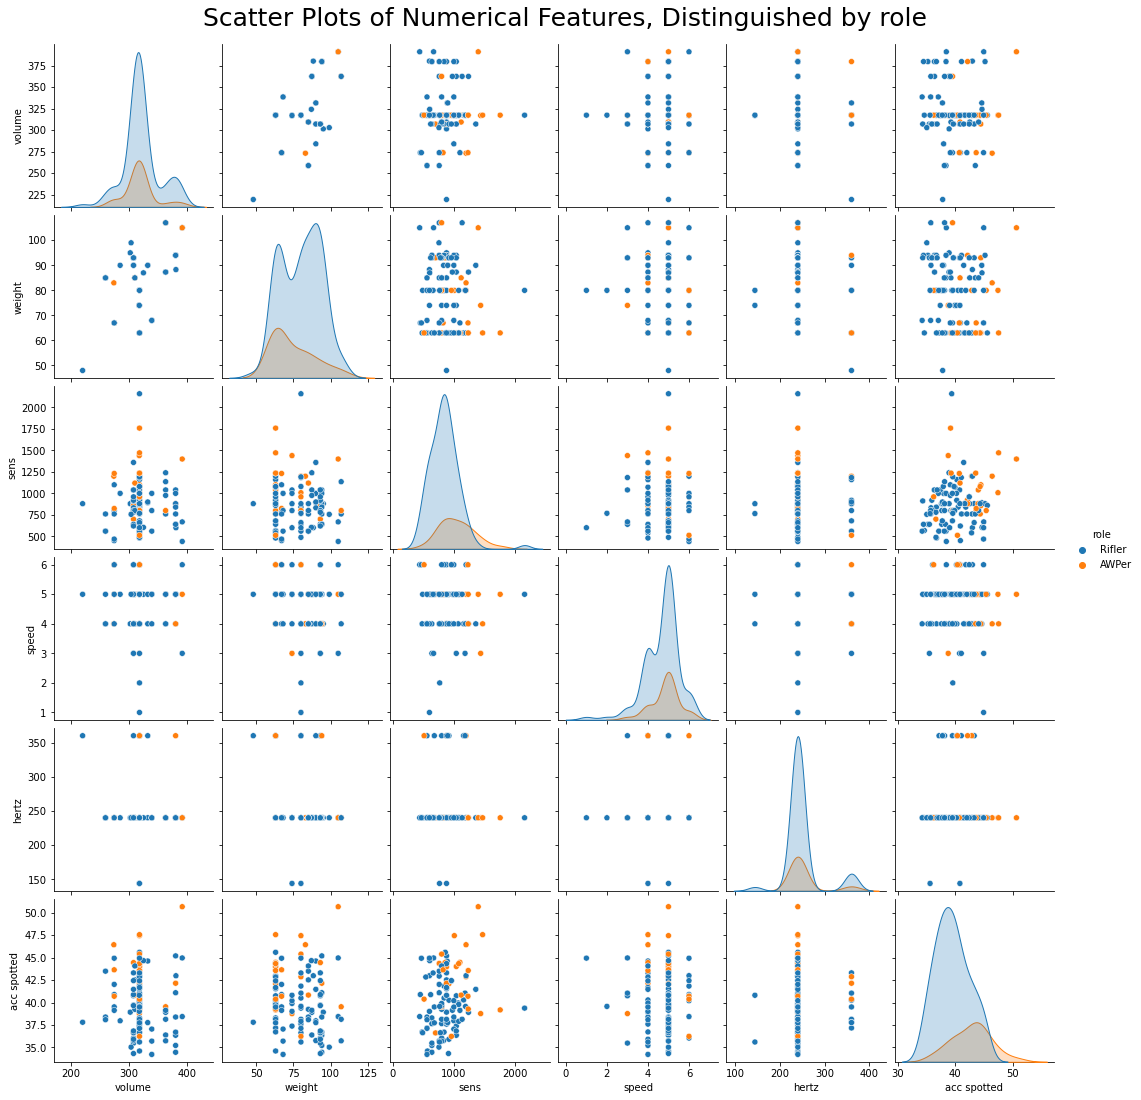

In [16]:
frames_num = [df2["volume"], df2["weight"], df2["sens"], df2["speed"], df2["hertz"], df2['acc spotted'], df2['role']] 
result_num = pd.concat(frames_num, axis = 1)
pairplot = sns.pairplot(result_num, hue = 'role')
pairplot.fig.suptitle("Scatter Plots of Numerical Features, Distinguished by role", y=1.02, fontsize=25)
plt.show()


*Visually, besides what we already observed from the regression plots, the only scatter plot suspect to show some sort of linear correlation is sensitivity and mouse pad speed. There seems to be a separation in the peaks and range of players scoring better than average accuracy between riflers and awpers. There is also a small shift in the distributions of awpers and riflers over sensitivity, and mouse weight. We will further investigate these possibilities.*

### Pairplot of Numerical Features with Accuracy Score Highlighted

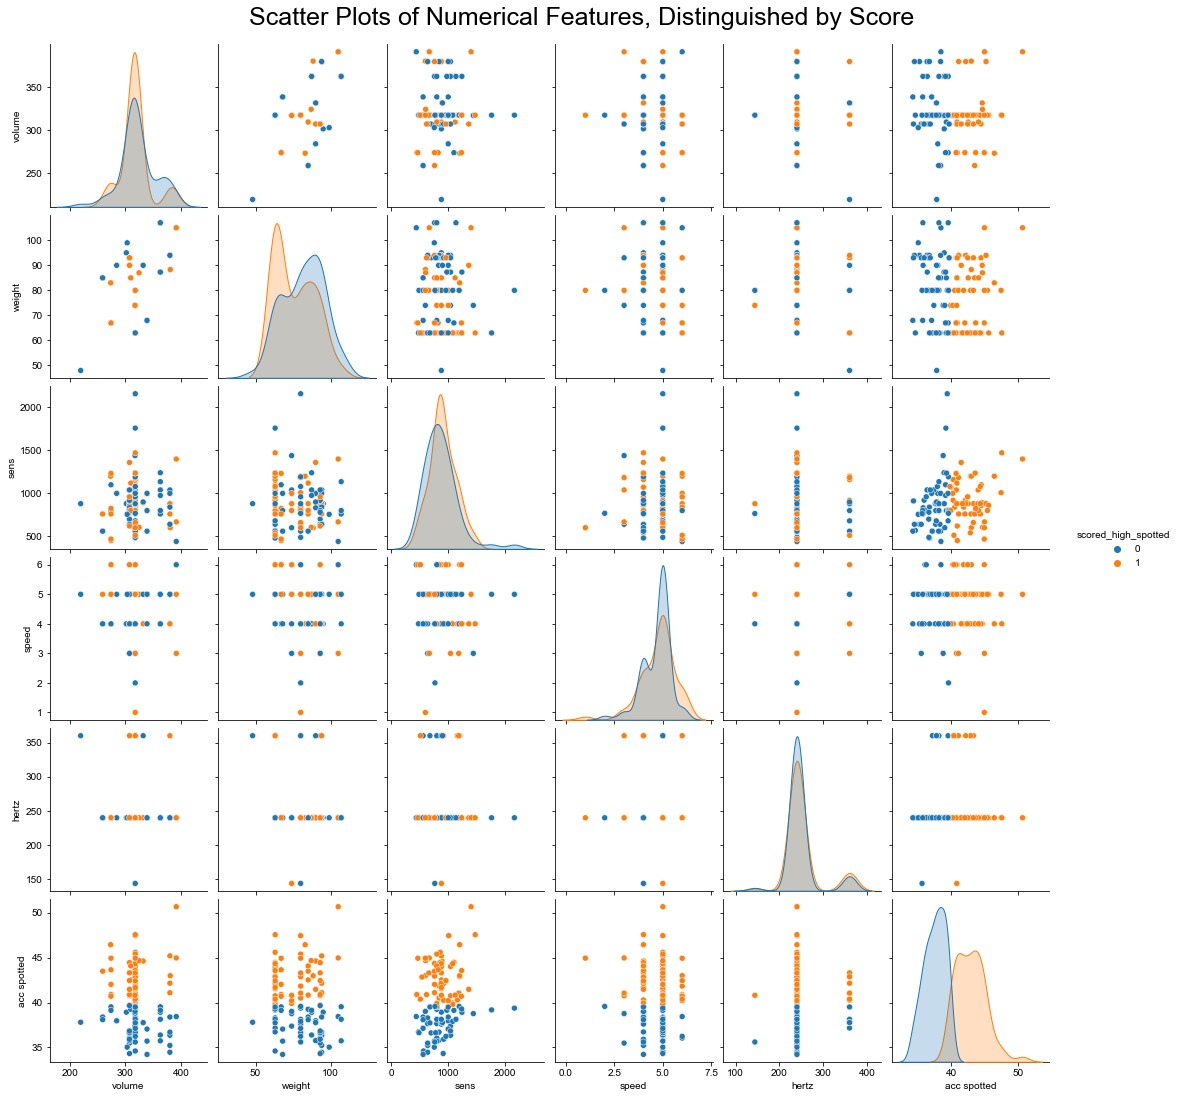

In [17]:
frames_num = [df2["volume"], df2["weight"], df2["sens"], df2["speed"], df2["hertz"], df2['acc spotted'], df2['scored_high_spotted']] 
result_num = pd.concat(frames_num, axis = 1)
pairplot = sns.pairplot(result_num, hue = 'scored_high_spotted')
pairplot.fig.suptitle("Scatter Plots of Numerical Features, Distinguished by Score", y=1.02, fontsize=25)
sns.set(font_scale=1.0)
plt.show()

*Visually it seems there may be a separation in players that score higher than the median accuracy based on mouse weight, higher scores favoring slightly lower weight. However, the separation of the peaks is only over a small range of the total mouse weights in our data.*

#### Looking further into mouse Sensitivity vs Mousepad speed

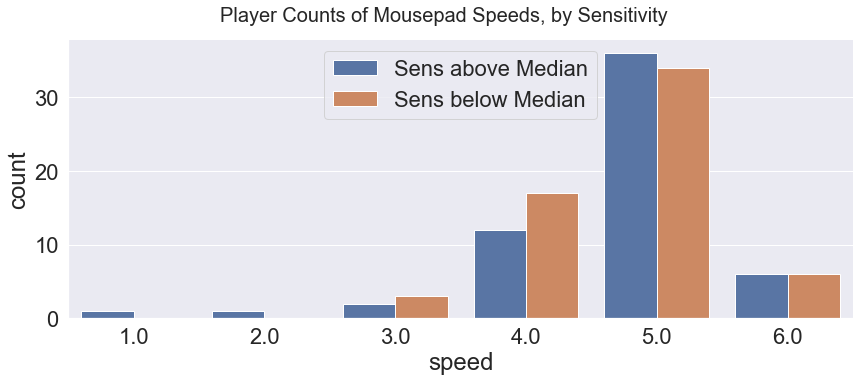

In [18]:
df2["speed_med"] = np.median(df2['speed'])
df2["speed_med"] = 0 + (df2['speed'] >= df2["speed_med"])

df2["sens_med"] = np.median(df2['sens'])
df2["sens_med"] = 0 + (df2['sens'] >= df2["sens_med"])

sns.set(font_scale=2)
catplot = sns.catplot(x="speed", hue="sens_med", kind="count", data=df2, aspect=20/8.27, legend = False)
# catplot.set_xlabel("Speed", fontsize=15)
# catplot.set_ylabel("Count", fontsize=15)
catplot.fig.suptitle("Player Counts of Mousepad Speeds, by Sensitivity", y=1.02, fontsize=20)
plt.legend(labels=["Sens above Median","Sens below Median"])

# print(df2["sens_med"])
# print(df2["speed_med"])

plt.show()

*There does not seem to be a distinction in whether players prefer higher/lower sensitivities paired with higher/lower speed mousepad surfaces.*

#### Looking further into rifler vs awper accuracy scores

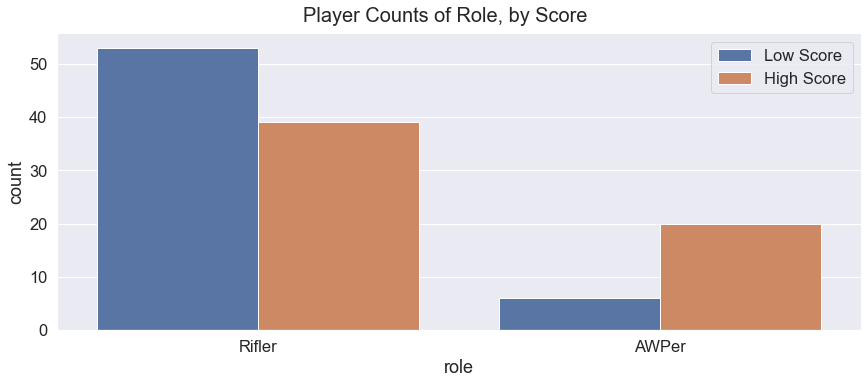

In [19]:
sns.set(font_scale=1.5)

catplot3 = sns.catplot(x="role", hue="scored_high_spotted", kind="count", data=df2, aspect=20/8.27, legend=False)
plt.legend(labels=["Low Score","High Score"])
catplot3.fig.suptitle("Player Counts of Role, by Score", y=1.02, fontsize=20)


plt.show()

*A higher proportion of awpers have higher than the median accuracy. This makes sense to me since awpers generally hold positions and see their targets first, and so have more time to react. They also do not have to deal with spray patterns.*

#### Looking further into rifler vs awper sensitivities

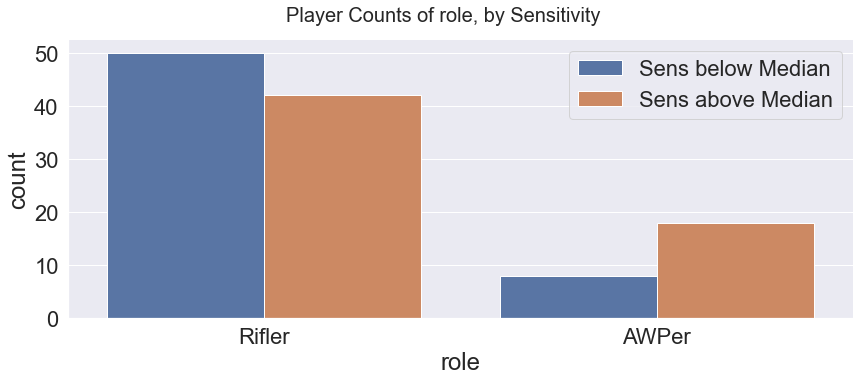

In [20]:
df2["sens_med"] = np.median(df2['sens'])
df2["sens_med"] = 0 + (df2['sens'] >= df2["sens_med"])

sns.set(font_scale=2)
catplot = sns.catplot(x="role", hue="sens_med", kind="count", data=df2, aspect=20/8.27, legend = False)

catplot.fig.suptitle("Player Counts of role, by Sensitivity", y=1.02, fontsize=20)
plt.legend(labels=["Sens below Median","Sens above Median"])


plt.show()

*Awpers tend to use higher sensitivites than riflers, with respect to the median value over our players in this dataset.*

#### Next we will observe our catagorical features of interest with respect to role and accuracy score. 

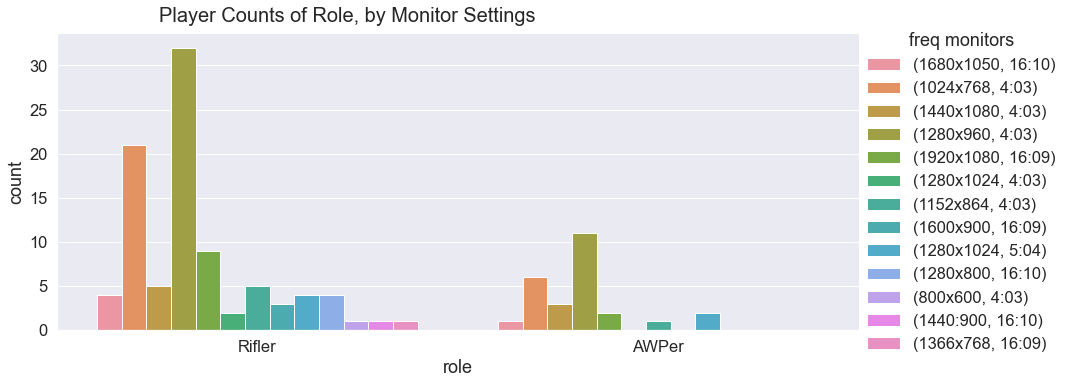

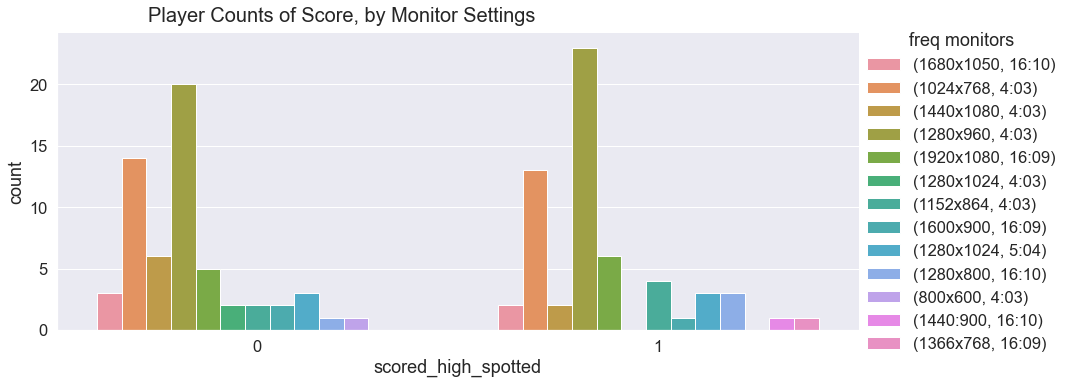

In [21]:
sns.set(font_scale=1.5)

catplot1 = sns.catplot(x="role", hue="freq monitors", kind="count", data=df2, aspect=20/8.27)
catplot1.fig.suptitle("Player Counts of Role, by Monitor Settings", ha = 'right', y=1.02, fontsize=20)

catplot2 = sns.catplot(x="scored_high_spotted", hue="freq monitors", kind="count", data=df2, aspect=20/8.27)
catplot2.fig.suptitle("Player Counts of Score, by Monitor Settings", ha = 'right', y=1.02, fontsize=20)


plt.show()

*Whether rifler or awper, good aim or bad aim, it seems the relative counts of monitor setting choices are about the same, maybe favoring (1280x960, 4:03) slightly by players who score higher (visually).*

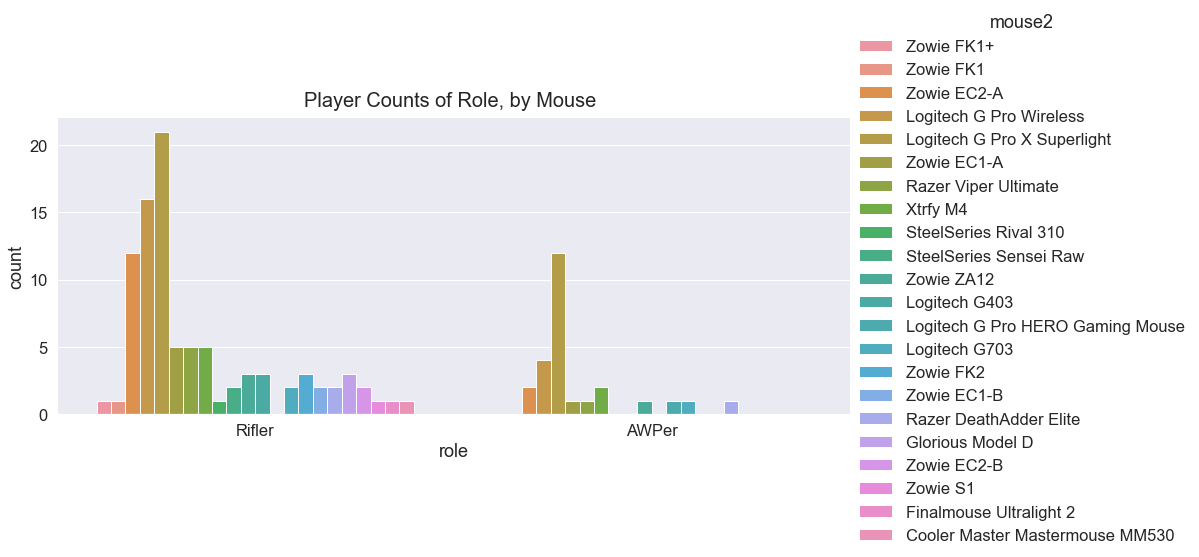

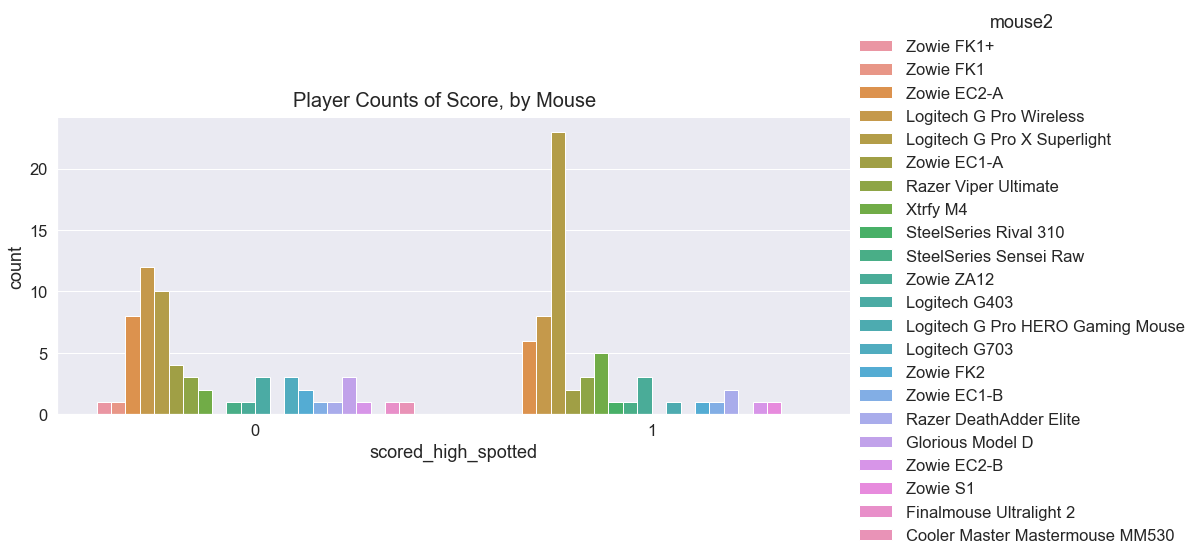

In [22]:
sns.set(font_scale=1.5)

catplot1 = sns.catplot(x="role", hue="mouse2", kind="count", data=df2, aspect=20/8.27)
catplot1.fig.suptitle("Player Counts of Role, by Mouse", ha = 'right', y=1.02, fontsize=20)

catplot2 = sns.catplot(x="scored_high_spotted", hue="mouse2", kind="count", data=df2, aspect=20/8.27)
catplot2.fig.suptitle("Player Counts of Score, by Mouse", ha = 'right', y=1.02, fontsize=20)

plt.show()

*A higher proportion of players that scored high seem to use the logitech G Pro X Superlight. However, just as many Awpers use the logitech G Pro X Superlight as every other mouse. Since there is an even higher ratio awpers who prefer the logitech g pro x superlight in comparison to riflers, this may partly explain why earlier we observed there may be a separation in players that score higher than the median accuracy based on mouse weight, simply because so many awpers use that specific mouse, awpers generally scoring above the median accuracy.*  

#### Changing scored high definition to account for difference in riflers and awpers
*One of the goals of this project is to attempt to model a player's accuracy performance based only on their gear/settings choices. Since awpers score higher than riflers, and have been shown to use different equipment/settings (more players choosing the logitech g pro x superlight and higher sensitivities), our models would simply get trained to predict who is a rifler vs who is an awper, when asked to learn to classify based on the current accuracy metric. In order to make things fair again we will classify players to score high only when they score high with respect to the median spotted accuracy score of their roles.*

In [23]:
df2['awper'] = role_dums_eda['AWPer']
df2['rifler'] = role_dums_eda['Rifler']



df2_riflers = df2[df2.rifler == 1]
acc_spotted_array_riflers = df2_riflers['acc spotted'].to_numpy()
acc_spotted_med_riflers= np.median(acc_spotted_array_riflers)

df2_riflers["scored_high_spotted"] = 0 + (acc_spotted_array_riflers >= acc_spotted_med_riflers)




df2_awpers = df2[df2.awper == 1]
acc_spotted_array_awpers = df2_awpers['acc spotted'].to_numpy()
acc_spotted_med_awpers= np.median(acc_spotted_array_awpers)


df2_awpers["scored_high_spotted"] = 0 + (acc_spotted_array_awpers >= acc_spotted_med_awpers)

# print(df2_riflers)
# print(df2_awpers)

df2 = pd.concat([df2_riflers, df2_awpers], axis = 0)


# print(df2.head())


df2 = df2.sort_index()

#### Checking if role is accounted for when labeling high scoring players

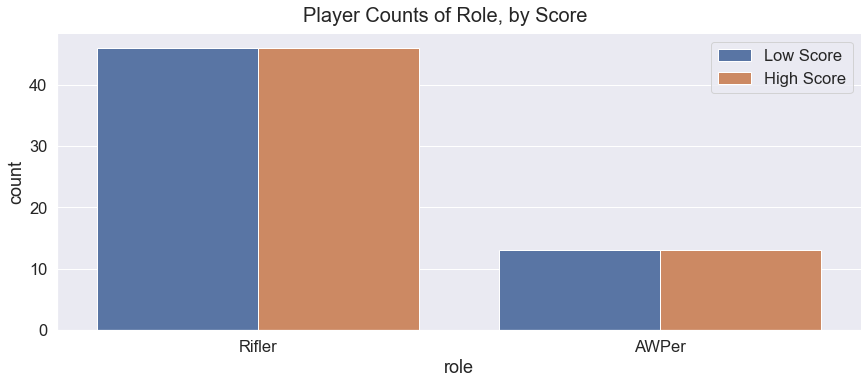

In [24]:
sns.set(font_scale=1.5)

catplot3 = sns.catplot(x="role", hue="scored_high_spotted", kind="count", data=df2, aspect=20/8.27, legend=False)
plt.legend(labels=["Low Score","High Score"])
catplot3.fig.suptitle("Player Counts of Role, by Score", y=1.02, fontsize=20)


plt.show()

*Great, now there is an equal number of high scorers in each role, which helps with the rest of our EDA, and our models can't cheat.*

#### Let's look to see if any of our numerical features are linearly correlated with each other or with accuracy (using Pearsons). We will define a significant correlation to be a lenient (+/-)0.4.

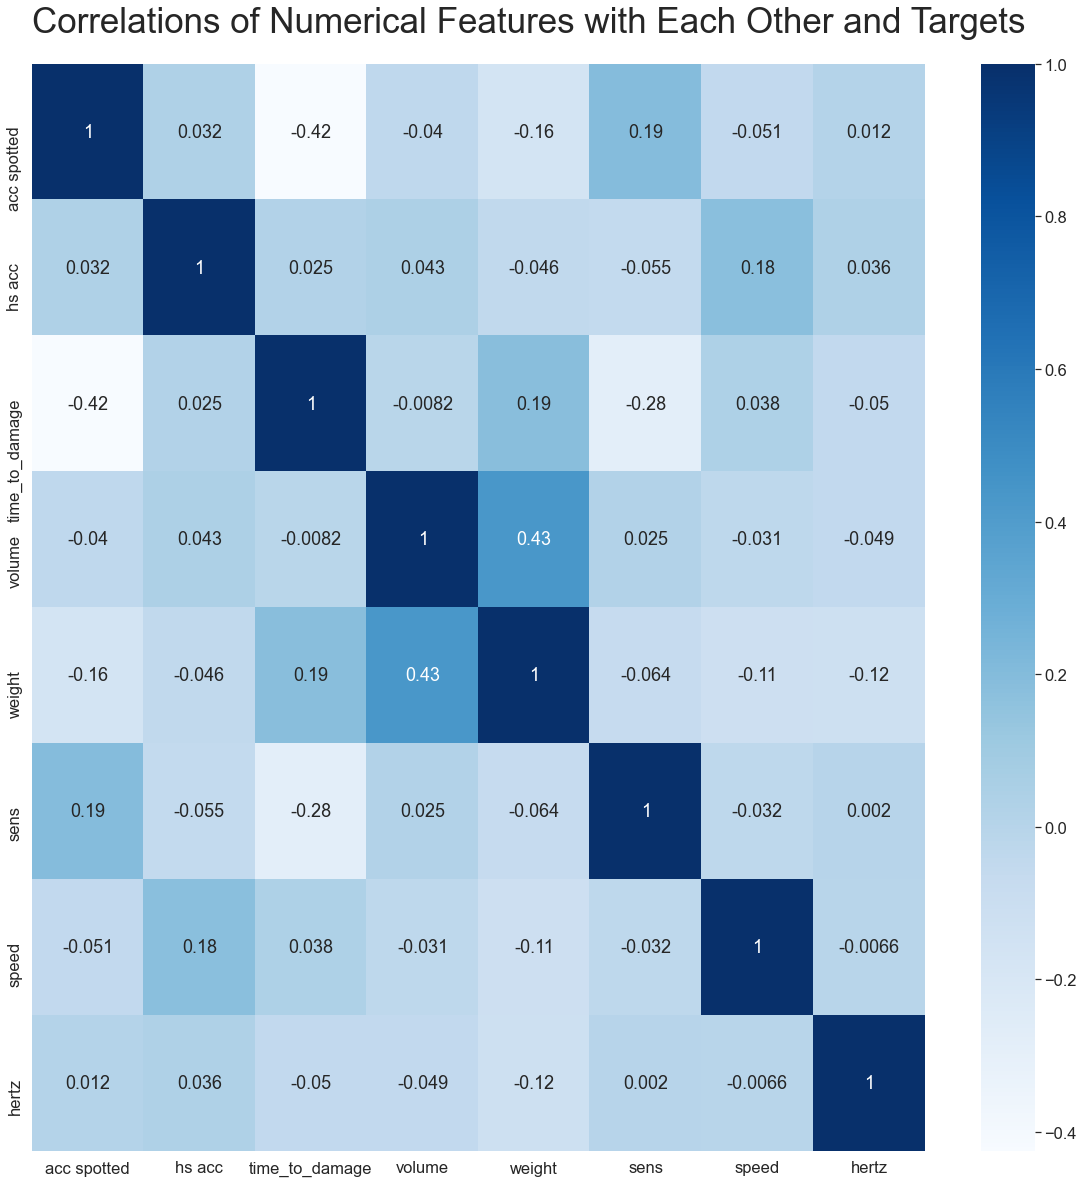

In [25]:
frames_perf = [df2['acc spotted'], df2['hs acc'], df2['time_to_damage'], df2['volume'], df2['weight'], df2['sens'],
               df2['speed'], df2['hertz']]
result_perf = pd.concat(frames_perf, axis = 1)
correlation = result_perf.corr()

fig = plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True, cmap='Blues')
fig.suptitle("Correlations of Numerical Features with Each Other and Targets", x=.47, y=.92, fontsize=35)
plt.show()
#plt.close()
#max .4 correlation among performance metrics, not significant, ill call .5 significant




*The only two features that we can say to be linearly correlated based on our lenient definition (besides weight and volume) are time to damage and spotted accuracy. However, again, role comes into play here. The accuracy score used here is the original numerical feature and has not been changed to accommodate player roles. Awpers still score higher accuracies here. I’d have to guess the correlation we’ve observed is again due to the fact that awpers generally have the upper hand when taking a shot, since they are already scoped in most of the time, and are focused and ready to react. Also much of the time riflers have to wait for their crosshairs to center after movement. They also don’t always land their first shot as much as awpers (time to damage is measured by the time it takes to deal damage).*

*I was hoping to find some relationship between things like mouse weight, sensitivity, and mouse pad speed, but if there is one, it's not linear.*

### Binning, Normalizing
#### Binning and one hot encoding the bins as features for use in models, frequent patterns search, and chi2 test. Binning will also allow us to find non linear relationships. 
*3 bins each, smallest bin contains 12 players. Tried to split range of values about evenly.*

In [26]:
#_eda: for eda/feature creation, dont drop one
#_mod: for modeling, drop one



print(np.max(df2['weight']), np.min(df2['weight']), np.median(df2['weight']))
weight_ints = [(0, 67.7), (67.7, 87.4), (87.4, 200)]
weight_interval = pd.IntervalIndex.from_tuples(weight_ints)
weightbins = pd.cut(df2['weight'].sort_values(), bins=weight_interval).map(dict(zip(weight_interval, 
                                                                                    ['wght1', 'wght2', 'wght3'])))
print(weightbins.value_counts())
print(pd.unique(weightbins))
weightbins_eda = pd.get_dummies(weightbins, drop_first=False)
weightbins_mod = pd.get_dummies(weightbins, drop_first=True)
# print(weightbins_eda)
# print(weight_interval)


# print(df2['width'].sort_values().value_counts())
print(np.max(df2['width']), np.min(df2['width']), np.median(df2['width']))
width_ints = [(5.2, 6.1), (6.1, 6.7), (6.7, 10)]
width_interval = pd.IntervalIndex.from_tuples(width_ints)
widthbins = pd.cut(df2['width'].sort_values(), bins=width_interval).map(dict(zip(width_interval, ['wth1', 'wth2', 'wth3'])))
print(widthbins.value_counts())
print(pd.unique(widthbins))
widthbins_eda = pd.get_dummies(widthbins, drop_first=False)
widthbins_mod = pd.get_dummies(widthbins, drop_first=True)
# print(widthbins_eda)
# print(width_interval)


# print(df2['length'].sort_values().value_counts())
print(np.max(df2['length']), np.min(df2['length']), np.median(df2['length']))
length_ints = [(11.4, 12), (12, 12.4), (12.4, 12.8)]
length_interval = pd.IntervalIndex.from_tuples(length_ints)
lengthbins = pd.cut(df2['length'].sort_values(), bins=length_interval).map(dict(zip(length_interval, 
                                                                                    ['lgth1', 'lgth2', 'lght3'])))
print(lengthbins.value_counts())
print(pd.unique(lengthbins))
lengthbins_eda = pd.get_dummies(lengthbins, drop_first=False)
lengthbins_mod = pd.get_dummies(lengthbins, drop_first=True)
# print(lengthbins_eda)
# print(length_interval)


# print(df2['height'].sort_values().value_counts())
print(np.max(df2['height']), np.min(df2['height']), np.median(df2['height']))
height_ints = [(3.50, 3.846), (3.846, 4.13), (4.13, 10)]
height_interval = pd.IntervalIndex.from_tuples(height_ints)
heightbins = pd.cut(df2['height'].sort_values(), bins=height_interval).map(dict(zip(height_interval,
                                                                                    ['hght1', 'hght2', 'hght3'])))
print(heightbins.value_counts())
print(pd.unique(heightbins))
heightbins_eda = pd.get_dummies(heightbins, drop_first=False)
heightbins_mod = pd.get_dummies(heightbins, drop_first=True)
# print(heightbins_eda)
# print(height_interval)


# print(df2['volume'].sort_values().value_counts())
print(np.max(df2['volume']), np.min(df2['volume']), np.median(df2['volume']))
volume_ints = [(218, 300), (300, 360), (360, 1000)]
volume_interval = pd.IntervalIndex.from_tuples(volume_ints)
volumebins = pd.cut(df2['volume'].sort_values(), bins=volume_interval).map(dict(zip(volume_interval, ['vol1', 'vol2', 'vol3'])))
print(volumebins.value_counts())
print(pd.unique(volumebins))
volumebins_eda = pd.get_dummies(volumebins, drop_first=False)
volumebins_mod = pd.get_dummies(volumebins, drop_first=True)
# print(volumebins_eda)
# print(volume_interval)


# print(df2['sens'].sort_values().value_counts())
print(np.max(df2['sens']), np.min(df2['sens']), np.median(df2['sens']))
sens_ints = [(439, 800), (800, 1180), (1180, 3000)]
sens_interval = pd.IntervalIndex.from_tuples(sens_ints)
sensbins = pd.cut(df2['sens'].sort_values(), bins=sens_interval).map(dict(zip(sens_interval, ['sns1', 'sns2', 'sns3'])))
print(sensbins.value_counts())
print(pd.unique(sensbins))
sensbins_eda = pd.get_dummies(sensbins, drop_first=False)
sensbins_mod = pd.get_dummies(sensbins, drop_first=True)
# print(sensbins_eda)
# print(sens_interval)


# print(df2['hertz'].sort_values().value_counts())
# print(np.max(df2['hertz']), np.min(df2['hertz']), np.median(df2['hertz']))
hertz_ints = [(143, 240), (240, 555)]
hertz_interval = pd.IntervalIndex.from_tuples(hertz_ints)
hertzbins = pd.cut(df2['hertz'].sort_values(), bins=hertz_interval).map(dict(zip(hertz_interval, 
                                                                                 ['hrz1', 'hrz2', 'hrz3']))) 
print(hertzbins.value_counts())
print(pd.unique(hertzbins))
hertzbins_eda = pd.get_dummies(hertzbins, drop_first=False)
hertzbins_mod = pd.get_dummies(hertzbins, drop_first=True)
# print(hertzbins_eda)
# print(hertz_interval)

107.0 48.0 80.0
wght1    41
wght2    41
wght3    36
Name: weight, dtype: int64
['wght1', 'wght2', 'wght3']
Categories (3, object): ['wght1' < 'wght2' < 'wght3']
7.1 5.3 6.35
wth2    85
wth3    20
wth1    13
Name: width, dtype: int64
['wth1', 'wth2', 'wth3']
Categories (3, object): ['wth1' < 'wth2' < 'wth3']
12.8 11.6 12.5
lght3    80
lgth2    20
lgth1    18
Name: length, dtype: int64
['lgth1', 'lgth2', 'lght3']
Categories (3, object): ['lgth1' < 'lgth2' < 'lght3']
4.4 3.57 4.0
hght2    84
hght3    21
hght1    13
Name: height, dtype: int64
['hght1', 'hght2', 'hght3']
Categories (3, object): ['hght1' < 'hght2' < 'hght3']
391.15999999999997 219.48359999999997 317.5
vol2    87
vol3    18
vol1    13
Name: volume, dtype: int64
['vol1', 'vol2', 'vol3']
Categories (3, object): ['vol1' < 'vol2' < 'vol3']
2160.0 440.00000000000006 880.0000000000001
sns2    52
sns1    51
sns3    15
Name: sens, dtype: int64
['sns1', 'sns2', 'sns3']
Categories (3, object): ['sns1' < 'sns2' < 'sns3']
hrz1    106
hrz

 Weight bins(g): (0.0, 67.7], (67.7, 87.4], (87.4, 200.0]  
 Width bins(cm): (5.2, 6.1], (6.1, 6.7], (6.7, 10.0]  
 Length bins(cm): (11.4, 12.0], (12.0, 12.4], (12.4, 12.8]  
 Height bins(cm): (3.5, 3.846], (3.846, 4.13], (4.13, 10.0]  
 Volume bins(cm^3) (218, 300], (300, 360], (360, 1000]  
 Sens Bins(edpi): (439, 800], (800, 1180], (1180, 3000]  
 Hertz bins(hz): (143, 240], (240, 555]  
 

#### Normalizing Numericals

In [27]:
weight = df2['weight'].values
sens = df2['sens'].values
hertz = df2['hertz'].values
length = df2['length'].values
width = df2['width'].values
height = df2['height'].values
volume = df2['volume'].values
speed = df2['speed'].values

StandardScaler = StandardScaler() 

weight = np.array(weight).reshape(-1,1)
weight = StandardScaler.fit_transform(weight)
weight = weight.flatten() #back to one dimension
df2['weight']= weight

length = np.array(length).reshape(-1,1)
length = StandardScaler.fit_transform(length)
length = length.flatten() #back to one dimension
df2['length']= length

width = np.array(width).reshape(-1,1)
width = StandardScaler.fit_transform(width)
width = width.flatten() #back to one dimension
df2['width']= width

height = np.array(height).reshape(-1,1)
height = StandardScaler.fit_transform(height)
height = height.flatten() #back to one dimension
df2['height']= height

volume = np.array(volume).reshape(-1,1)
volume = StandardScaler.fit_transform(volume)
volume = volume.flatten() #back to one dimension
df2['volume']= volume


sens = np.array(sens).reshape(-1,1)
sens = StandardScaler.fit_transform(sens)
sens = sens.flatten()
df2['sens']= sens

hertz = np.array(hertz).reshape(-1,1)
hertz = StandardScaler.fit_transform(hertz)
hertz = hertz.flatten()
df2['hertz']= hertz

speed = np.array(speed).reshape(-1,1)
speed = StandardScaler.fit_transform(speed)
speed = speed.flatten() #back to one dimension
df2['speed']= speed


# print(df2['weight'])
# print(df2['sens'])
# print(df2['hertz'])

#### For bin interpretation after normalization
*handy later*

In [28]:
#Using number of players per bin as reference to recreate bins

# wght1    41
# wght2    41
# wght3    36
# Name: weight, dtype: int64
# ['wght1', 'wght2', 'wght3']
# Categories (3, object): ['wght1' < 'wght2' < 'wght3']

# wth2    85
# wth3    20
# wth1    13
# Name: width, dtype: int64
# ['wth1', 'wth2', 'wth3']
# Categories (3, object): ['wth1' < 'wth2' < 'wth3']

# lght3    80
# lgth2    20
# lgth1    18
# Name: length, dtype: int64
# ['lgth1', 'lgth2', 'lght3']
# Categories (3, object): ['lgth1' < 'lgth2' < 'lght3']

# hght2    84
# hght3    21
# hght1    13
# Name: height, dtype: int64
# ['hght1', 'hght2', 'hght3']
# Categories (3, object): ['hght1' < 'hght2' < 'hght3']

# vol2    87
# vol3    18
# vol1    13
# Name: volume, dtype: int64
# ['vol1', 'vol2', 'vol3']
# Categories (3, object): ['vol1' < 'vol2' < 'vol3']

# sns2    52
# sns1    51
# sns3    15
# Name: sens, dtype: int64
# ['sns1', 'sns2', 'sns3']
# Categories (3, object): ['sns1' < 'sns2' < 'sns3']

# hrz1    106
# hrz2     12
# Name: hertz, dtype: int64
# ['hrz1', 'hrz2']
# Categories (2, object): ['hrz1' < 'hrz2']

####################################################################################

# wght1    41
# wght2    41
# wght3    36
weight_sort = df2['weight'].sort_values().reset_index().drop(['index'], axis=1) #new 1d df, sorted, with indices reset 
#we can now call on this by index based on what we see from how many players are in each bin above (1 more than index start)
print("weight center bin: [", weight_sort.iloc[40][0], ",", weight_sort.iloc[81][0], "]")
# print(weight_sort.iloc[40])
# print(weight_sort.iloc[81])
# print(weight_sort.iloc[117])
#print(df2['weight'].sort_values())
# print(np.max(df2['weight']), np.min(df2['weight']), np.median(df2['weight']))

####################################################################################


# wth2    85
# wth3    20
# wth1    13
width_sort = df2['width'].sort_values().reset_index().drop(['index'], axis=1) #new 1d df, sorted, with indices reset 
#we can now call on this by index based on what we see from how many players are in each bin above
print("width center bin: [", width_sort.iloc[12][0], ",", width_sort.iloc[97][0], "]")
# print(width_sort.iloc[84])
# print(width_sort.iloc[104])
# print(width_sort.iloc[117])
# print(df2['width'].sort_values())
# print(df2['width'].sort_values().value_counts())


####################################################################################


# lght3    80
# lgth2    20
# lgth1    18
length_sort = df2['length'].sort_values().reset_index().drop(['index'], axis=1) #new 1d df, sorted, with indices reset 
#we can now call on this by index based on what we see from how many players are in each bin above
print("length center bin: [", length_sort.iloc[17][0], ",", length_sort.iloc[37][0], "]")
# print(length_sort.iloc[79])
# print(length_sort.iloc[99])
# print(length_sort.iloc[117])
# print(df2['length'].sort_values())
# print(df2['length'].sort_values().value_counts())
# print(np.max(df2['length']), np.min(df2['length']), np.median(df2['length']))


####################################################################################


# hght2    84
# hght3    21
# hght1    13
height_sort = df2['height'].sort_values().reset_index().drop(['index'], axis=1) #new 1d df, sorted, with indices reset 
#we can now call on this by index based on what we see from how many players are in each bin above
print("height center bin: [", height_sort.iloc[12][0], ",", height_sort.iloc[96][0], "]")
# print(height_sort.iloc[83])
# print(height_sort.iloc[104])
# print(height_sort.iloc[117])
# print(df2['height'].sort_values())
# print(df2['height'].sort_values().value_counts())
# print(np.max(df2['height']), np.min(df2['height']), np.median(df2['height']))


####################################################################################


# vol2    87
# vol3    18
# vol1    13
volume_sort = df2['volume'].sort_values().reset_index().drop(['index'], axis=1) #new 1d df, sorted, with indices reset 
#we can now call on this by index based on what we see from how many players are in each bin above
print("volume center bin: [", volume_sort.iloc[12][0], ",", volume_sort.iloc[99][0], "]")
# print(volume_sort.iloc[86])
# print(volume_sort.iloc[104])
# print(volume_sort.iloc[117])
# print(df2['volume'].sort_values())
# print(df2['volume'].sort_values().value_counts())
# print(np.max(df2['volume']), np.min(df2['volume']), np.median(df2['volume']))


####################################################################################


# sns2    52
# sns1    51
# sns3    15
sens_sort = df2['sens'].sort_values().reset_index().drop(['index'], axis=1) #new 1d df, sorted, with indices reset 
#we can now call on this by index based on what we see from how many players are in each bin above
print("sens center bin: [", sens_sort.iloc[50][0], ",", sens_sort.iloc[102][0], "]")
# print(sens_sort.iloc[51])
# print(sens_sort.iloc[102])
# print(sens_sort.iloc[117])
# print(df2['sens'].sort_values())
# print(df2['sens'].sort_values().value_counts())
# print(np.max(df2['sens']), np.min(df2['sens']), np.median(df2['sens']))


####################################################################################


# hrz1    106
# hrz2     12
hertz_sort = df2['hertz'].sort_values().reset_index().drop(['index'], axis=1) #new 1d df, sorted, with indices reset 
#we can now call on this by index based on what we see from how many players are in each bin above
print("hertz first bin max cutoff: [", hertz_sort.iloc[105][0], "]")
# print(hertz_sort.iloc[105])
# print(hertz_sort.iloc[])
# print(df2['hertz'].sort_values())
# print(df2['hertz'].sort_values().value_counts())
# print(np.max(df2['hertz']), np.min(df2['hertz']), np.median(df2['hertz']))


weight center bin: [ -0.8658390927778182 , 0.6292812668242471 ]
width center bin: [ -1.1775986524655842 , 0.7290692390590106 ]
length center bin: [ -1.6521586567802038 , -0.11859152600290139 ]
height center bin: [ -1.303705646415776 , 0.050387279124491535 ]
volume center bin: [ -1.2027433604691955 , 0.639985150053527 ]
sens center bin: [ -0.32939852374168543 , 1.0416429507386982 ]
hertz first bin max cutoff: [ -0.2722848978268127 ]


Bin sanity checks

In [29]:
# pd.set_option("display.max_rows", None)
# print(df2['mouse2'])

# print(df2['weight']) #superlight should be wght1, it is
# print(df2['width']) #superlight, wdth2 should be, it is
# print(df2['height']) #superlight should be hght2, it is
#print(df2['volume']) #superlight should be vol2, it is
# print(weightbins_eda) # superlight checks out
# print(widthbins_eda) # superlight checks out
#print(heightbins_eda) # superlight checks out
#print(volumebins_eda) # superlight checks out should be 2


# print(df2['sens'])#matches
# print(sensbins_eda)

# print(df2['hertz'])#matches
# print(hertzbins_eda)

# print(df2['length'])#matches, and with superlight
# print(lengthbins_eda)

#### Creating dataframe of all features so far including bins
*Left out mouse type, and dimensions besides weight and volume, as this would create many combinations of redundant features describing the same singular mouse, and not offer much more inference or modeling power.

In [30]:
#For modeling:
frames_all_bins_mod = [weightbins_mod, volumebins_mod, sensbins_mod, hertzbins_mod, speed_dums_mod, mpad_dums_mod, 
                       result_cat2_mod, mouse_dums_mod]
result_all_bins_mod = pd.concat(frames_all_bins_mod, axis = 1)

#For EDA/feature creation
frames_all_bins_eda = [weightbins_eda, volumebins_eda, sensbins_eda, hertzbins_eda, speed_dums_eda, mpad_dums_eda, 
                       result_cat2_eda, mouse_dums_eda]
result_all_bins_eda = pd.concat(frames_all_bins_eda, axis = 1)


# print(result_all_bins_eda)

#### Chi2 test between all of our original features. This will further help us find trends between gear/settings choices.

In [31]:
######################################################

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

frames_all_cat_chi2 = [weightbins_eda, volumebins_eda, sensbins_eda, hertzbins_eda, speed_dums_eda, freq_monitor_eda, role_dums_eda] #is all of them?
result_all_cat_chi2 = pd.concat(frames_all_cat_chi2, axis = 1)




chi2_cols = []
p_cols = []
for i in range(len(result_all_cat_chi2.columns)): #gives array of length col names, had to be 0-12 not 1-13 (13 out of iloc range)
    chi2_col_whole = pd.DataFrame(chi2(result_all_cat_chi2, result_all_cat_chi2.iloc[:, i]))
    chi2_col_whole = np.array(chi2_col_whole)
    chi2_col, p_col = np.split(chi2_col_whole, 2)
    chi2_col = chi2_col.flatten() #len was 1
    p_col = p_col.flatten()
    chi2_col = pd.DataFrame(chi2_col)  #need as df or series to concat
    chi2_col.columns = pd.DataFrame(result_all_cat_chi2.iloc[:, i]).columns #iloc returns a series, must keep it as a df to call columns
    p_col = pd.DataFrame(p_col)  #need as df or series to concat
    p_col.columns = pd.DataFrame(result_all_cat_chi2.iloc[:, i]).columns
    chi2_cols.append(chi2_col)
    p_cols.append(p_col)
  




chi2_check = pd.concat(chi2_cols, axis = 1)
chi2_check.index = chi2_check.columns
#print(chi2_check.shape)

p_check = pd.concat(p_cols, axis = 1)
p_check.index = p_check.columns #CHANGES ROW NAMES
#print(p_check.shape)










wherenew= np.array(np.where(p_check <= 0.05))
wherenew = np.dstack(wherenew)  
# print(wherenew)
wherenew = np.squeeze(wherenew) 
# print(wherenew.shape)

#removing diagonals
corrdnew = []
for i in wherenew:
    if i[0] != i[1]:
        corrdnew.append(i)

corrdnew = np.vstack(corrdnew)

# print(corrdnew) #think that worked 


#sorting each element before dups
pcorrdss = []
for i in corrdnew:
    pcorrdss.append(np.sort(i))

pcorrdss = np.vstack(pcorrdss)
# print(pcorrdss)


#removing dups
pcorr_cat_no_dups = np.vstack({tuple(row) for row in pcorrdss})
# print(pcorr_cat_no_dups)

pcorrelations_cat = []
for i in range(len(pcorr_cat_no_dups)):
    pcorrelations_cat.append([p_check.iloc[pcorr_cat_no_dups[i][0]].name, p_check.iloc[pcorr_cat_no_dups[i][1]].name])


 
pcorrelations_cat=np.array(pcorrelations_cat)   
print("CHI2 BETWEEN ORIGNAL FEATURES")
print(pcorrelations_cat)
###################################

CHI2 BETWEEN ORIGNAL FEATURES
[['wght1' 'AWPer']
 ['vol1' 'vol2']
 ['6.0' '(1024x768, 4:03)']
 ['sns1' 'AWPer']
 ['4.0' '6.0']
 ['vol2' '(1280x800, 16:10)']
 ['wght1' 'wght3']
 ['2.0' '(1920x1080, 16:09)']
 ['wght1' 'vol3']
 ['sns3' '5.0']
 ['wght3' 'vol3']
 ['sns3' '(1440:900, 16:10)']
 ['sns3' 'AWPer']
 ['wght3' '(1024x768, 4:03)']
 ['hrz2' '(1680x1050, 16:10)']
 ['sns1' 'sns3']
 ['vol2' 'vol3']
 ['(1280x960, 4:03)' '(1440x1080, 4:03)']
 ['vol2' '(1024x768, 4:03)']
 ['4.0' '5.0']
 ['(1280x960, 4:03)' '(1920x1080, 16:09)']
 ['wght1' 'wght2']
 ['hrz1' 'hrz2']
 ['wght3' 'vol2']
 ['wght2' 'wght3']
 ['AWPer' 'Rifler']
 ['sns1' 'sns2']
 ['3.0' '5.0']
 ['wght3' '(1280x960, 4:03)']
 ['5.0' '6.0']
 ['sns1' '(1920x1080, 16:09)']
 ['vol1' '(1366x768, 16:09)']
 ['wght1' 'vol1']
 ['vol3' '(1024x768, 4:03)']
 ['(1024x768, 4:03)' '(1280x960, 4:03)']
 ['hrz1' '(1680x1050, 16:10)']
 ['sns3' '(1440x1080, 4:03)']
 ['sns3' 'Rifler']
 ['3.0' '(1280x800, 16:10)']
 ['sns2' 'sns3']]


C:\Users\Dave\AppData\Local\Temp/ipykernel_11752/3608047882.py:74: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pcorr_cat_no_dups = np.vstack({tuple(row) for row in pcorrdss})


*The following are the only combinations of two features chosen by players that pass the chi2 test with p value less than 0.05, and also that aren’t directly related (two different weight bins, any volume and weight combo, etc). Note that whether there is a positive or negative relationship is not defined.*

['wght1' 'AWPer']  
['sns1' 'AWPer']    
['sns3' 'AWPer']    

['sns3' '5.0']

['sns3' '(1440:900, 16:10)']    
['sns3' '(1440x1080, 4:03)']   
['sns1' '(1920x1080, 16:09)']  

['wght3' '(1024x768, 4:03)']    
['wght3' '(1280x960, 4:03)']    

['3.0' '(1280x800, 16:10)']  
['6.0' '(1024x768, 4:03)']  
['2.0' '(1920x1080, 16:09)']  

 
 


*As we’ve already seen there is a difference in the ratio of players that use higher sensitivity between riflers and awpers (['sns1' 'AWPer'], ['sns3' 'AWPer']), as well as a difference in mouse weight, which is related to the higher ratio of awpers than riflers choosing the logitech g pro x superlight.*

*The other patterns here could suggest some relation between monitor settings/sensitivity/speed/weight, so lets look into it further.*


In [32]:
#sens and monitor settings

players_using = result_all_cat_chi2['sns1'].value_counts()[1]
expected = (result_all_cat_chi2['sns1'].value_counts()[1]*(result_all_cat_chi2['(1920x1080, 16:09)'].value_counts()[1]/118))
actual = (abs(((result_all_cat_chi2['sns1']*result_all_cat_chi2['(1920x1080, 16:09)']).value_counts()[0])-118)) #some have no 1's we must grab negative class and
#use subtraction and absolute value to find the amount of positive class
difference = actual - expected
if actual > expected:
    print(result_all_cat_chi2['sns1'].name, " : players using=", players_using, ", positive result with", result_all_cat_chi2['(1920x1080, 16:09)'].name, ", expected users=", expected, ", actual=", actual, ", difference=", difference)
if actual < expected:
    print(result_all_cat_chi2['sns1'].name, " : players using=", players_using, ", negative result with", result_all_cat_chi2['(1920x1080, 16:09)'].name, ", expected users=", expected, ", actual=", actual, ", difference=", difference)

    
    
    
# players_using = result_all_cat_chi2['sns3'].value_counts()[1]
# expected = (result_all_cat_chi2['sns3'].value_counts()[1]*(result_all_cat_chi2['(1440:900, 16:10)'].value_counts()[1]/118))
# actual = (abs(((result_all_cat_chi2['sns3']*result_all_cat_chi2['(1440:900, 16:10)']).value_counts()[0])-118)) #some have no 1's we must grab negative class and
# #use subtraction and absolute value to find the amount of positive class
# difference = actual - expected
# if actual > expected:
#     print(result_all_cat_chi2['sns3'].name, " : players using=", players_using, ", positive result with", result_all_cat_chi2['(1440:900, 16:10)'].name, ", expected users=", expected, ", actual=", actual, ", difference=", difference)
# if actual < expected:
#     print(result_all_cat_chi2['sns3'].name, " : players using=", players_using, ", negative result with", result_all_cat_chi2['(1440:900, 16:10)'].name, ", expected users=", expected, ", actual=", actual, ", difference=", difference)    
    
    
    
players_using = result_all_cat_chi2['sns3'].value_counts()[1]
expected = (result_all_cat_chi2['sns3'].value_counts()[1]*(result_all_cat_chi2['(1440x1080, 4:03)'].value_counts()[1]/118))
actual = (abs(((result_all_cat_chi2['sns3']*result_all_cat_chi2['(1440x1080, 4:03)']).value_counts()[0])-118)) #some have no 1's we must grab negative class and
#use subtraction and absolute value to find the amount of positive class
difference = actual - expected
if actual > expected:
    print(result_all_cat_chi2['sns3'].name, " : players using=", players_using, ", positive result with", result_all_cat_chi2['(1440x1080, 4:03)'].name, ", expected users=", expected, ", actual=", actual, ", difference=", difference)
if actual < expected:
    print(result_all_cat_chi2['sns3'].name, " : players using=", players_using, ", negative result with", result_all_cat_chi2['(1440x1080, 4:03)'].name, ", expected users=", expected, ", actual=", actual, ", difference=", difference)        
    
    
    
    
######################
    
#speed and monitor settings    
    
# players_using = result_all_cat_chi2[2.0].value_counts()[1]
# expected = (result_all_cat_chi2[2.0].value_counts()[1]*(result_all_cat_chi2['(1920x1080, 16:09)'].value_counts()[1]/118))
# actual = (abs(((result_all_cat_chi2[2.0]*result_all_cat_chi2['(1920x1080, 16:09)']).value_counts()[0])-118)) #some have no 1's we must grab negative class and
# #use subtraction and absolute value to find the amount of positive class
# difference = actual - expected
# if actual > expected:
#     print(result_all_cat_chi2[2.0].name, " : players using=", players_using, ", positive result with", result_all_cat_chi2['(1920x1080, 16:09)'].name, ", expected users=", expected, ", actual=", actual, ", difference=", difference)
# if actual < expected:
#     print(result_all_cat_chi2[2.0].name, " : players using=", players_using, ", negative result with", result_all_cat_chi2['(1920x1080, 16:09)'].name, ", expected users=", expected, ", actual=", actual, ", difference=", difference)
   


players_using = result_all_cat_chi2[6.0].value_counts()[1]
expected = (result_all_cat_chi2[6.0].value_counts()[1]*(result_all_cat_chi2['(1024x768, 4:03)'].value_counts()[1]/118))
actual = (abs(((result_all_cat_chi2[6.0]*result_all_cat_chi2['(1024x768, 4:03)']).value_counts()[0])-118)) #some have no 1's we must grab negative class and
#use subtraction and absolute value to find the amount of positive class
difference = actual - expected
if actual > expected:
    print(result_all_cat_chi2[6.0].name, " : players using=", players_using, ", positive result with", result_all_cat_chi2['(1024x768, 4:03)'].name, ", expected users=", expected, ", actual=", actual, ", difference=", difference)
if actual < expected:
    print(result_all_cat_chi2[6.0].name, " : players using=", players_using, ", negative result with", result_all_cat_chi2['(1024x768, 4:03)'].name, ", expected users=", expected, ", actual=", actual, ", difference=", difference)

    
    
# players_using = result_all_cat_chi2[3.0].value_counts()[1]
# expected = (result_all_cat_chi2[3.0].value_counts()[1]*(result_all_cat_chi2['(1280x800, 16:10)'].value_counts()[1]/118))
# actual = (abs(((result_all_cat_chi2[3.0]*result_all_cat_chi2['(1280x800, 16:10)']).value_counts()[0])-118)) #some have no 1's we must grab negative class and
# #use subtraction and absolute value to find the amount of positive class
# difference = actual - expected
# if actual > expected:
#     print(result_all_cat_chi2[3.0].name, " : players using=", players_using, ", positive result with", result_all_cat_chi2['(1280x800, 16:10)'].name, ", expected users=", expected, ", actual=", actual, ", difference=", difference)
# if actual < expected:
#     print(result_all_cat_chi2[3.0].name, " : players using=", players_using, ", negative result with", result_all_cat_chi2['(1280x800, 16:10)'].name, ", expected users=", expected, ", actual=", actual, ", difference=", difference)

################################### 

# weight and monitor setting 
    
players_using = result_all_cat_chi2['wght3'].value_counts()[1]
expected = (result_all_cat_chi2['wght3'].value_counts()[1]*(result_all_cat_chi2['(1024x768, 4:03)'].value_counts()[1]/118))
actual = (abs(((result_all_cat_chi2['wght3']*result_all_cat_chi2['(1024x768, 4:03)']).value_counts()[0])-118)) #some have no 1's we must grab negative class and
#use subtraction and absolute value to find the amount of positive class
difference = actual - expected
if actual > expected:
    print(result_all_cat_chi2['wght3'].name, " : players using=", players_using, ", positive result with", result_all_cat_chi2['(1024x768, 4:03)'].name, ", expected users=", expected, ", actual=", actual, ", difference=", difference)
if actual < expected:
    print(result_all_cat_chi2['wght3'].name, " : players using=", players_using, ", negative result with", result_all_cat_chi2['(1024x768, 4:03)'].name, ", expected users=", expected, ", actual=", actual, ", difference=", difference)

    
    
players_using = result_all_cat_chi2['wght3'].value_counts()[1]
expected = (result_all_cat_chi2['wght3'].value_counts()[1]*(result_all_cat_chi2['(1280x960, 4:03)'].value_counts()[1]/118))
actual = (abs(((result_all_cat_chi2['wght3']*result_all_cat_chi2['(1280x960, 4:03)']).value_counts()[0])-118)) #some have no 1's we must grab negative class and
#use subtraction and absolute value to find the amount of positive class
difference = actual - expected
if actual > expected:
    print(result_all_cat_chi2['wght3'].name, " : players using=", players_using, ", positive result with", result_all_cat_chi2['(1280x960, 4:03)'].name, ", expected users=", expected, ", actual=", actual, ", difference=", difference)
if actual < expected:
    print(result_all_cat_chi2['wght3'].name, " : players using=", players_using, ", negative result with", result_all_cat_chi2['(1280x960, 4:03)'].name, ", expected users=", expected, ", actual=", actual, ", difference=", difference)
    
    
    
    

    
#######################

#speed and sens
players_using = result_all_cat_chi2['sns3'].value_counts()[1]
expected = (result_all_cat_chi2['sns3'].value_counts()[1]*(result_all_cat_chi2[5.0].value_counts()[1]/118))
actual = (abs(((result_all_cat_chi2['sns3']*result_all_cat_chi2[5.0]).value_counts()[0])-118)) #some have no 1's we must grab negative class and
#use subtraction and absolute value to find the amount of positive class
difference = actual - expected
if actual > expected:
    print(result_all_cat_chi2['sns3'].name, " : players using=", players_using, ", positive result with", result_all_cat_chi2[5.0].name, ", expected users=", expected, ", actual=", actual, ", difference=", difference)
if actual < expected:
    print(result_all_cat_chi2['sns3'].name, " : players using=", players_using, ", negative result with", result_all_cat_chi2[5.0].name, ", expected users=", expected, ", actual=", actual, ", difference=", difference)

sns1  : players using= 51 , positive result with (1920x1080, 16:09) , expected users= 4.754237288135593 , actual= 8 , difference= 3.2457627118644066
sns3  : players using= 15 , positive result with (1440x1080, 4:03) , expected users= 1.0169491525423728 , actual= 3 , difference= 1.9830508474576272
6.0  : players using= 12 , positive result with (1024x768, 4:03) , expected users= 2.7457627118644066 , actual= 6 , difference= 3.2542372881355934
wght3  : players using= 36 , positive result with (1024x768, 4:03) , expected users= 8.23728813559322 , actual= 15 , difference= 6.76271186440678
wght3  : players using= 36 , negative result with (1280x960, 4:03) , expected users= 13.118644067796609 , actual= 7 , difference= -6.118644067796609
sns3  : players using= 15 , negative result with 5.0 , expected users= 8.898305084745763 , actual= 5 , difference= -3.898305084745763


*Note that only the relation between sns1 and 16:09's showed up again in apriori when using only aspect ratios rather than aspect+res together.*

*Low sensitivity users may prefer to use the monitor settings: (1920x1080, 16:09) more so than players using other sensitivities. (Expected to see around 5 out of 51 players who use sens1 to be using (1920x1080, 16:09), and we found 8.
Players that prefer to use higher sensitivities and lower mouse pad speeds may prefer to use the aspect ratio 4:03, which usually stretches the view of the game world. We expected to see 1 player out of the 15 using sns3 to also be using (1440x1080, 4:03), and we found 3. We expected to see 3 players out of the 12 using speed 6.0 to also be using (1440x1080, 4:03), and we found 6.*


*These results together make me wonder if some players using the less "stretched" aspect ratios use lower sensitivites to stay in control, while players using the more "stretched" aspect ratios use higher sensitivites to compensate for their crosshairs feeling slower, while also using higher control pads to compensate for the more sensitive input.*

#### Apriori/frequent patterns to find what features and feature combinations the majority of players are using.

In [33]:
apriori_all = pd.DataFrame(apriori(result_all_bins_eda, min_support=0.5, use_colnames=True))
   
apriori_all = apriori_all.sort_values(by='support', ascending=False)

print(apriori_all)

    support      itemsets
1  0.898305        (hrz1)
0  0.737288        (vol2)
3  0.737288        (4:03)
7  0.677966  (hrz1, 4:03)
4  0.652542  (vol2, hrz1)
2  0.593220         (5.0)
5  0.542373  (vol2, 4:03)
6  0.533898   (5.0, hrz1)


*Over half of all Players use the following gear/settings:  
90% of players use hrz1 (144-240hz), 74% of players use vol2 (medium-sized mice), 74% of players use 4:03, 60% of players use speed 5.0.*

In [34]:
apriori_all = pd.DataFrame(apriori(result_all_bins_eda, min_support=0.25, use_colnames=True))
   
apriori_all = apriori_all.sort_values(by='support', ascending=False)

print(apriori_all)


     support             itemsets
6   0.898305               (hrz1)
3   0.737288               (vol2)
8   0.737288               (4:03)
35  0.677966         (hrz1, 4:03)
22  0.652542         (vol2, hrz1)
..       ...                  ...
43  0.262712  (wght2, vol2, hrz1)
55  0.262712    (sns2, 5.0, hrz1)
18  0.262712        (wght2, 4:03)
14  0.262712        (4:03, wght1)
29  0.262712          (5.0, sns1)

[69 rows x 2 columns]


#### Finding all frequent gear combos of length at least 2, that at least 1/4 of players are using, to turn them into features for modeling. (Indices are the features of the df: result_all_bins_eda)

In [35]:
apriori_all = pd.DataFrame(apriori(result_all_bins_eda, min_support=0.10))
apriori_all['length'] = apriori_all['itemsets'].apply(lambda x: len(x))
apriori_all = apriori_all[(apriori_all['length'] >= 2) & (apriori_all['support'] >= 0.25)] 

apriori_all = apriori_all.sort_values(by='support', ascending=False)

print(apriori_all)
#to use for modeling: multiply one column by the other for each pair, if 1 = a pair, 0 if not

      support            itemsets  length
97   0.677966             (64, 9)       2
57   0.652542              (9, 4)       2
64   0.542373             (64, 4)       2
92   0.533898             (9, 15)       2
210  0.483051          (64, 9, 4)       3
109  0.466102            (64, 15)       2
59   0.440678             (4, 15)       2
271  0.423729         (64, 9, 15)       3
75   0.398305              (9, 6)       2
80   0.389831              (9, 7)       2
207  0.389831          (9, 4, 15)       3
120  0.364407            (64, 70)       2
126  0.364407            (83, 70)       2
304  0.364407        (64, 83, 70)       3
122  0.364407            (64, 83)       2
222  0.347458         (64, 4, 15)       3
283  0.338983         (64, 9, 83)       3
281  0.338983         (64, 9, 70)       3
101  0.338983             (9, 83)       2
99   0.338983             (9, 70)       2
287  0.338983         (9, 83, 70)       3
460  0.338983     (64, 9, 83, 70)       4
56   0.338983              (4, 7) 

#### Turning frequent combos into features 

In [36]:
freq_features = []
for i in apriori_all['itemsets']:
    index_list = list(i)
    columns = []
    for col_index in index_list:
        column = result_all_bins_eda.iloc[:, col_index]
        columns.append(column)
    columns = pd.concat(columns, axis=1)
    #make into df's so can multiply easier: USE PANDAS DF.PROD TO MULTIPLY ALL COLUMNS
    columns = pd.DataFrame(columns)
    freq_feature = columns.prod(axis=1)
    freq_features.append(freq_feature)
    #print(columns)
    #print(freq_feature)


freq_features = pd.concat(freq_features, axis=1) 
freq_features = pd.DataFrame(freq_features) 

all_col_names = []
for i in apriori_all['itemsets']:
    col_names = []
    index_list = list(i)
    for col_index in index_list:
        col_name = result_all_bins_eda.iloc[:, col_index].name
        col_name = str(col_name)
        col_names.append(col_name)
    col_names = '+'.join(col_names) #list to string, + in '' to fit in between
    all_col_names.append(col_names)

freq_features.columns = all_col_names 
print("Checking:")
print(freq_features)


Checking:
     4:03+hrz1  hrz1+vol2  4:03+vol2  hrz1+5.0  4:03+hrz1+vol2  4:03+5.0  \
0            0          1          0         0               0         0   
1            1          0          0         1               0         1   
2            0          0          1         0               0         0   
3            1          1          1         1               1         1   
4            0          0          1         0               0         1   
..         ...        ...        ...       ...             ...       ...   
113          1          1          1         0               1         0   
114          0          0          0         1               0         0   
115          1          1          1         0               1         0   
116          1          0          0         1               0         1   
117          1          1          1         0               1         0   

     vol2+5.0  4:03+hrz1+5.0  hrz1+sns1  hrz1+sns2  ...  \
0           0     

#### We will attempt to cluster players based on their gear/settings, and then turn those clusters into features.

*Instead of including all features of the original dataframe in our search for clusters, which contain many one-hot-encoded columns describing all variations of mouse, monitor settings, etc., we will try to include only general properties of gear/settings as well as the most frequent individual one-hot features such as (1024x768, 4:03) and (1280x960, 4:03). This way, clusters will have a better chance of being identified, as well as visualized.*

#############################

#### Creating df of general properties:

In [37]:
scored_high_spotted_sorted = df2['scored_high_spotted'].sort_index()
# print(scored_high_spotted_sorted) #name is still scored high spotted, is df

#need target in one of the frames for use in parrallel coord plot
properties_frames_clust = [df2['volume'], df2['weight'], df2['sens'], df2['speed'], df2['hertz'], 
                           result_all_bins_eda['(1280x960, 4:03)'], result_all_bins_eda['(1024x768, 4:03)'], scored_high_spotted_sorted]
result_properties_clust = pd.concat(properties_frames_clust, axis = 1)

properties_frames_clust2 = [df2['volume'], df2['weight'], df2['sens'], df2['speed'], df2['hertz'], 
                            result_all_bins_eda['(1280x960, 4:03)'], result_all_bins_eda['(1024x768, 4:03)']]
result_properties_clust2 = pd.concat(properties_frames_clust2, axis = 1)

#### Choosing best # of clusters from relative cluster size (visually) and sillouhette score. (Most of this code for displaying cluster size was obtained from sklearn example and modified)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.24991603078670477
For n_clusters = 3 The average silhouette_score is : 0.2000029016459022
For n_clusters = 4 The average silhouette_score is : 0.22378123607258746
For n_clusters = 5 The average silhouette_score is : 0.22262111928516484
For n_clusters = 6 The average silhouette_score is : 0.2304329236891838
For n_clusters = 7 The average silhouette_score is : 0.21227137366289334


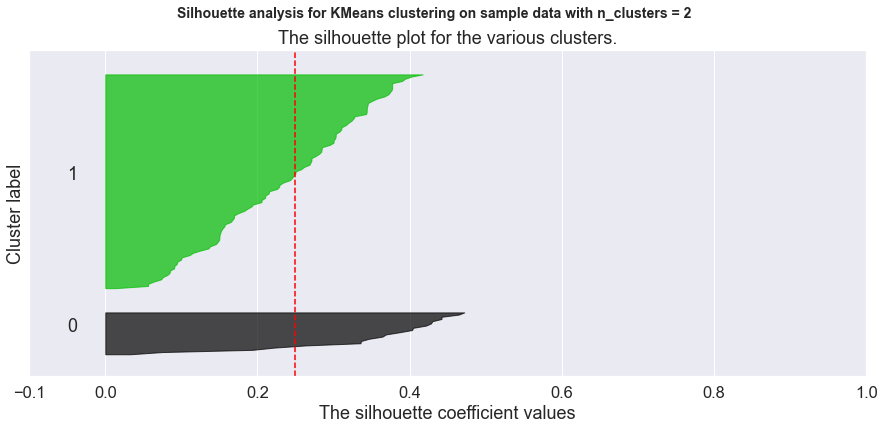

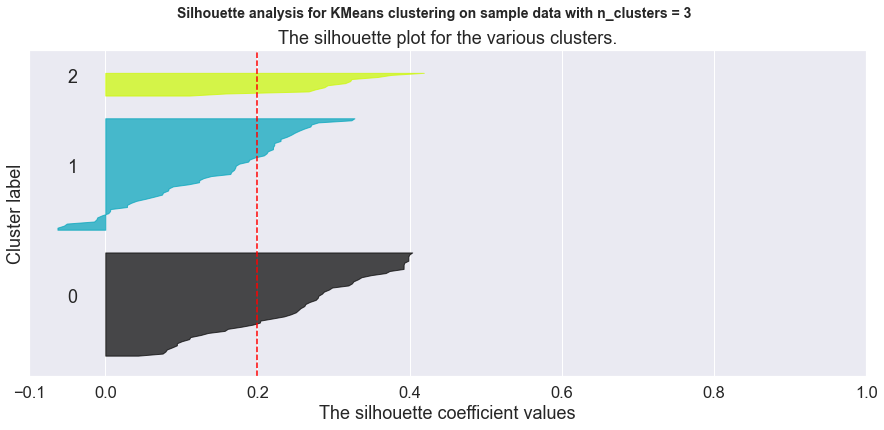

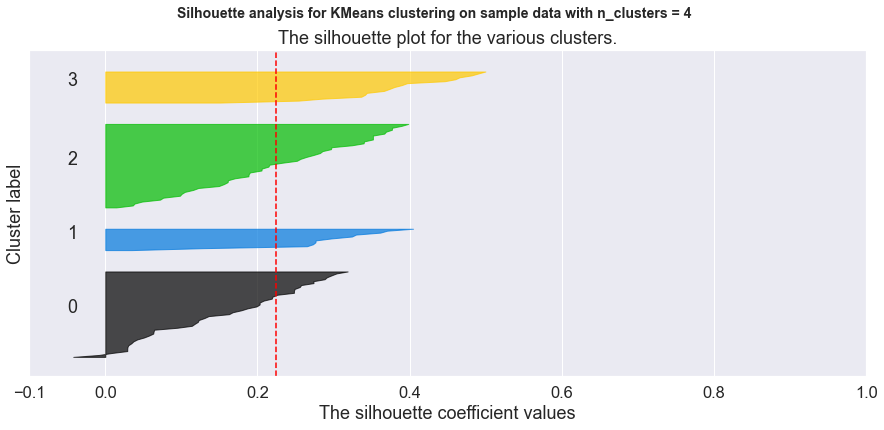

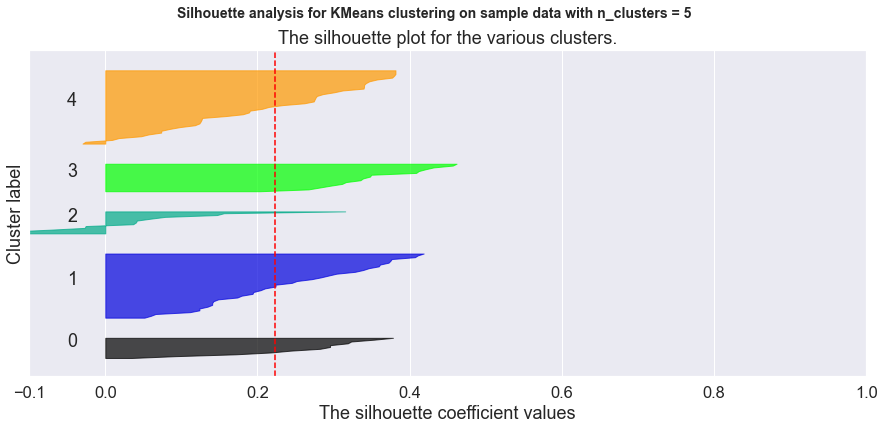

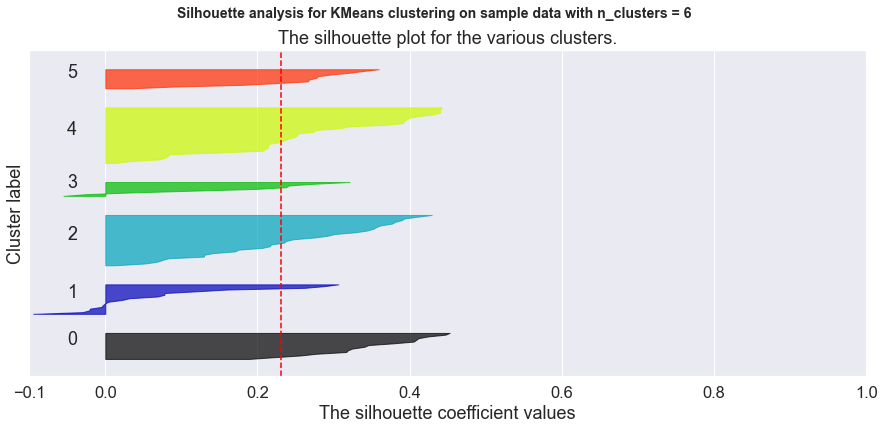

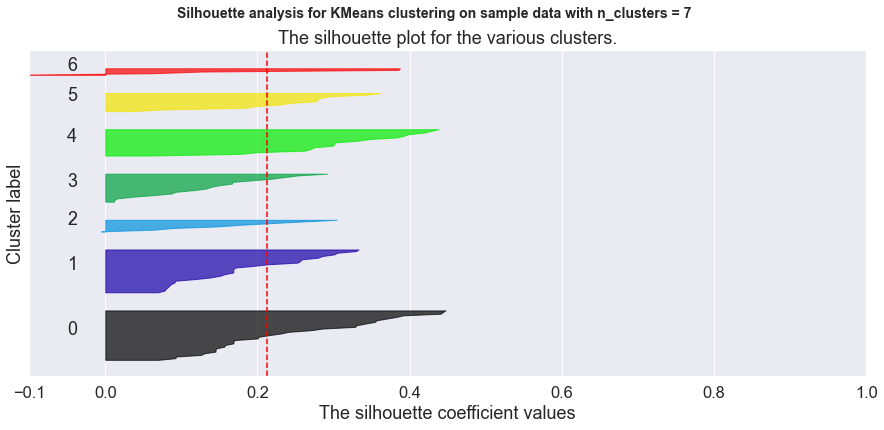

In [38]:
#ALL HAVE BAD SILLHOUTTE SCORE, ALL UNEVEN, CHOOSING K=4.
#COPIED AND MODIFIED FROM SKLEARN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans

print(__doc__)


range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    fig = plt.figure()
    fig.set_size_inches(15, 6)
    ax1 = plt.axes()
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(result_properties_clust2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(result_properties_clust2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(result_properties_clust2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(result_properties_clust2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
#plt.close('all')

*The ideal number of clusters to use would have a high silhouette score, which defines how well the clusters are seperated, as well as even sized clusters. Unfortunately we were not able to obtain either of those qualities given any choice for # of clusters. We will still however attempt to visualize the clusters as well as turn them into features for modeling, since we will be using filter methods to determine the best features for modeling later on anyway. We will choose 4 clusters.*

#### Random state was chosen such that three of the clusters showed predictive power via chi2 test with accuracy target class.

In [39]:
plt.close('all')
clust = KMeans(n_clusters=4, random_state=0).fit(result_properties_clust2)
#print(clust)

#### Parallel coordinates to see clusters w/target (scored high spotted)

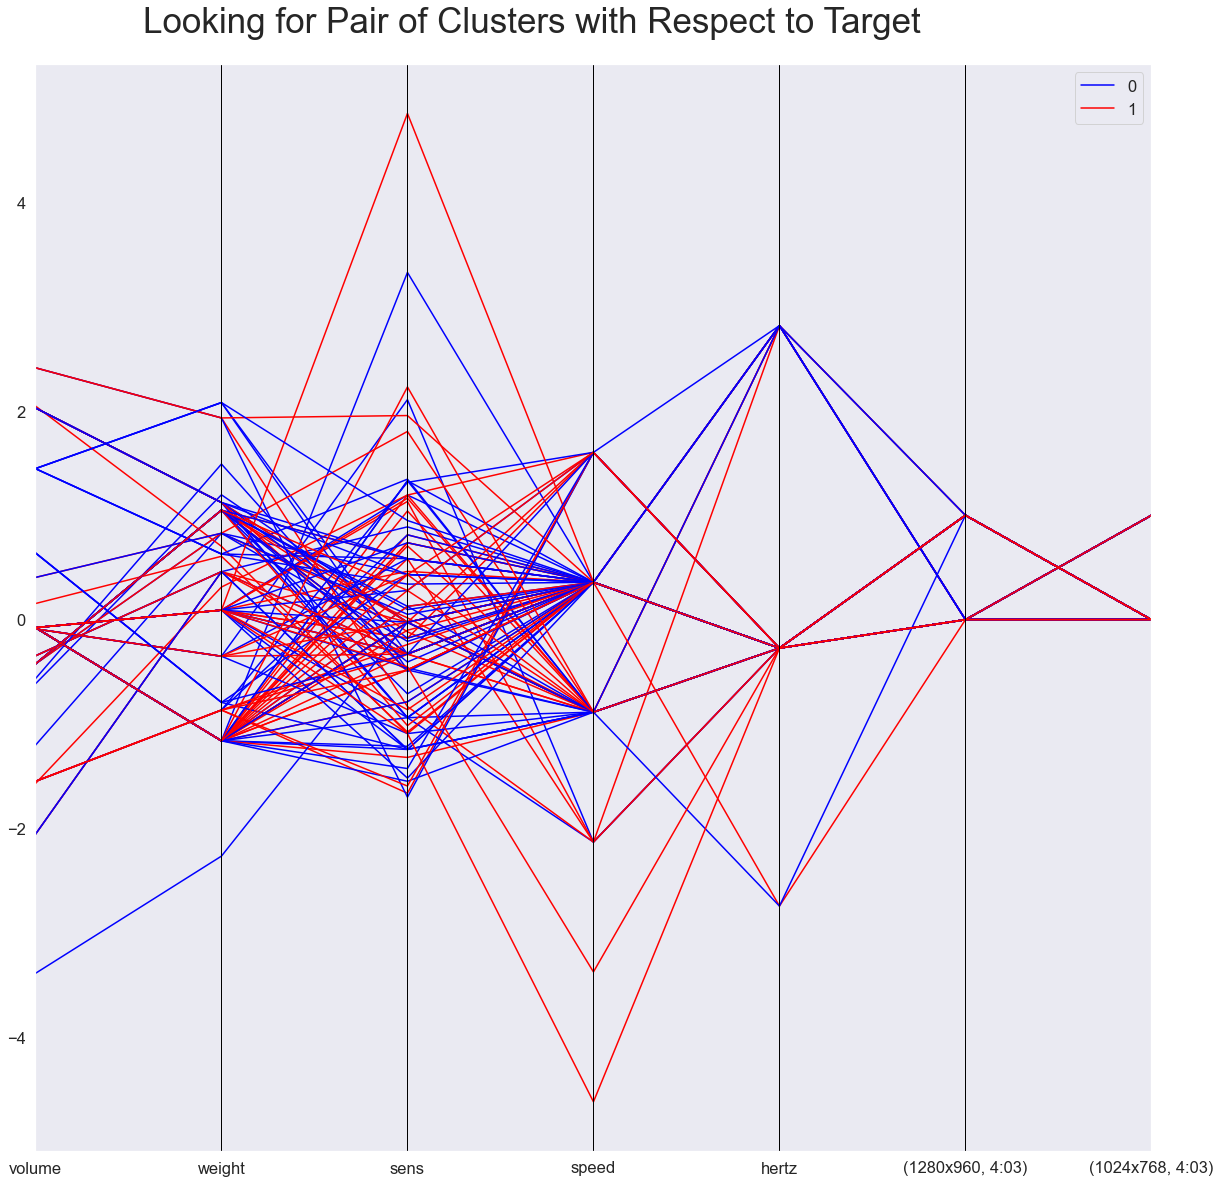

In [40]:
from pandas.plotting import parallel_coordinates
fig = plt.figure(figsize=(20,20))
par_coord_class = parallel_coordinates(result_properties_clust, 'scored_high_spotted', color=('blue', 'red'))
fig.suptitle("Looking for Pair of Clusters with Respect to Target", x=.47, y=.92, fontsize=35)
plt.show()


*We cannot see a clear binary cluster seperation between players with higher/lower than the median accuracy based on these general features.*

#### Visualization of our four clusters and description of cluster centers
*I'm leaving our bin descriptions near the cluster centers for interpretation.*

Cluster Centers:
[[-0.44064118  0.46502185 -0.40627604 -0.36492728 -0.32976185  0.3255814
   0.1627907 ]
 [-0.24422838 -0.81940678  0.4039762   0.33149907 -0.32601336  0.47826087
   0.19565217]
 [ 1.89234543  1.32290274 -0.04712528  0.065755   -0.2722849   0.23529412
   0.47058824]
 [-0.16564969 -0.39938118 -0.02599212 -0.05624327  2.81710144  0.25
   0.25      ]]
Bins (normalized):
volume center bin: [ -1.2027433604691955 , 0.639985150053527 ]
weight center bin: [ -0.8658390927778182 , 0.6292812668242471 ]
sens center bin: [ -0.32939852374168543 , 1.0416429507386982 ]
speed max= 1.6029332543164718 ,speed median= 0.3585508595181583 ,speed min= -4.618978719675096
hertz first bin max cutoff: [ -0.2722848978268127 ]


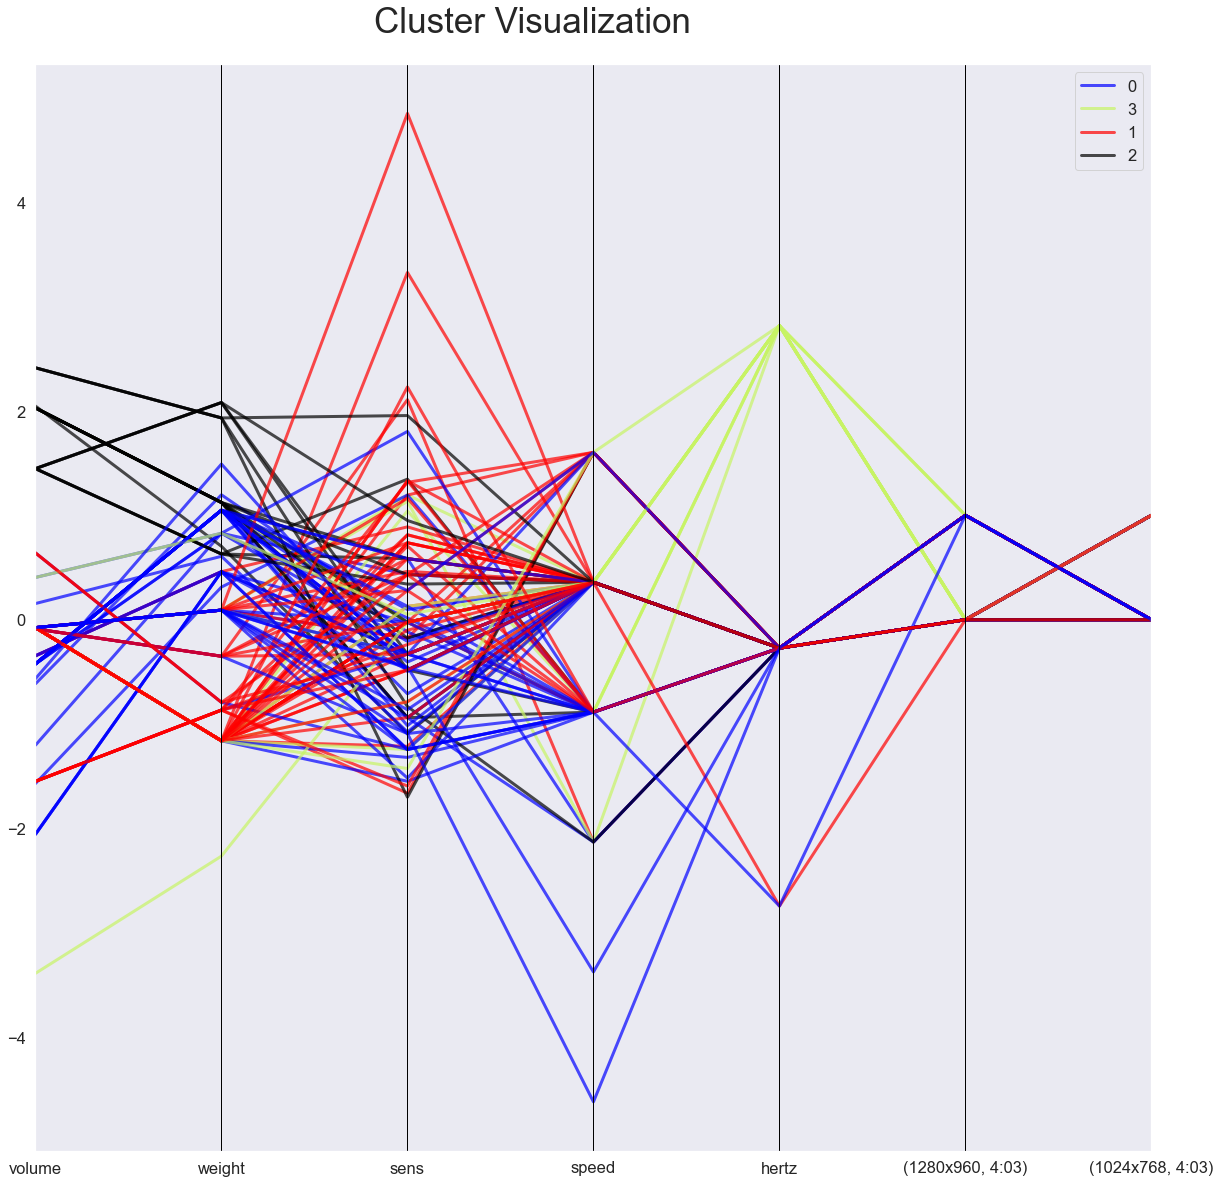

In [41]:
from pandas.plotting import parallel_coordinates
which_clust = clust.predict(result_properties_clust2)
which_clusts = pd.DataFrame(which_clust)
which_clusts.columns = ['clusts']
# print(which_clusts)
print("Cluster Centers:")
print(clust.cluster_centers_)
print("Bins (normalized):")
print("volume center bin: [ -1.2027433604691955 , 0.639985150053527 ]")
print("weight center bin: [ -0.8658390927778182 , 0.6292812668242471 ]")
print("sens center bin: [ -0.32939852374168543 , 1.0416429507386982 ]")
print("speed max=", max(df2['speed']), ",speed median=", np.median(df2['speed']), ",speed min=", min(df2['speed']))
print("hertz first bin max cutoff: [ -0.2722848978268127 ]")
# print(np.median(result_all_bins_eda['(1280x960, 4:03)']))



result_properties_clust_which_frames = [result_properties_clust2, which_clusts]
result_properties_clust_which = pd.concat(result_properties_clust_which_frames, axis = 1)
# print(result_properties_clust_which)
fig = plt.figure(figsize=(20,20))
par_coord_class = parallel_coordinates(result_properties_clust_which, "clusts", color=('blue', '#C7F464', 'red', 'black'), 
                                       linewidth=3, alpha=0.7)
fig.suptitle("Cluster Visualization", x=.47, y=.92, fontsize=35)

plt.show()



*Describing clusters:*

lower bin number are lower values

cluster 0: players that belong to:
vol2, weight2, sens1, speed under 5, hrz1

cluster 1: players that belong to:
vol2, weight2, sens2, speed 5, hrz1, more likely to use (1280x960, 4:03)

cluster 2: players that belong to: 
vol3, weight3, sens2, speed 5, hrz1, more likley to use (1024x768, 4:03)

Cluster 3: players that belong to:
vol2, weight2, sens2, speed 5, hrz2



(speed check, normalized, for cluster center interpretation)   
the only value closer to a speed other than 5 is in clust 0 which leans slightly towards speed 4

In [42]:
# print(df2['speed'].sort_values())

#### *--As seen by the range of cluster center values and range of values each cluster takes on the plot, the clusters are not clearly defined against each other.*

#### Turning clusters into features

In [43]:
df2["which_clusts"] = which_clust

#### Unifying all original and created features into one dataframe (and adding mouse dimensions back in)

In [44]:
########################################################
result_all_super_frames = [result_all_bins_eda, freq_features]
result_all_super = pd.concat(result_all_super_frames, axis = 1)
clust_dums = pd.get_dummies(df2['which_clusts'], drop_first=False)
add_clust = [result_all_super, clust_dums, widthbins_eda, lengthbins_eda, heightbins_eda] 
result_all_super = pd.concat(add_clust, axis = 1)
#print(result_all_super)
print(result_all_super.shape)

(118, 183)


### Now we will perform a chi2 test for all of our 154 features against the target (scored high spotted).

#### getting chi2 and mi scores for all features

In [45]:
scored_high_spotted_sorted = df2['scored_high_spotted'].sort_index()

super_mi_scores = mutual_info_classif(result_all_super, scored_high_spotted_sorted)


super_chi_2 = chi2(result_all_super, scored_high_spotted_sorted)
super_chi_2 = np.array(super_chi_2)
super_chi_2, super_chi_p = np.split(super_chi_2, 2) 
super_chi_2 = super_chi_2.flatten() 
super_chi_p = super_chi_p.flatten() 

#### Uniting scores into a df for sorting

In [46]:
#FOR SORTING
datas = np.vstack(np.array([[super_chi_2], [super_chi_p], [super_mi_scores]]))
#print(datas)
superscores = pd.DataFrame(data=datas, columns=result_all_super.columns) 

#### Sorting by best p value/chi2 score

In [47]:
favorable_columns = np.where(superscores.iloc[1, :] <= 0.1) 
favorable_columns = np.array(favorable_columns).flatten()
#print(favorable_columns)
filtered_super = superscores.iloc[:, favorable_columns]
# print(filtered_super)
# print(favorable_columns)

*The above features have the highest difference in count of players that scored high/low vs what the expected count is due to chance when considering the distributions of the feature and target.*

#### For index interpretation:

In [48]:
# print(result_all_bins_eda.iloc[:, 0].name) 
# print(result_all_bins_eda.iloc[:, 108].name) 
# print(result_all_bins_eda.iloc[:, 115].name) 
# print(result_all_bins_eda.iloc[:, 0].name) 
# print(result_all_bins_eda.iloc[:, 18].name) 
# print(result_all_bins_eda.iloc[:, 96].name) 

#### Making df of best scoring chi2 features, best_filter

In [49]:
best_filter_frames = []

for i in favorable_columns:
    best_filter_frame = pd.DataFrame(result_all_super.iloc[:, i]) 
    best_filter_frames.append(best_filter_frame)
                         
                         
best_filter = pd.concat(best_filter_frames, axis = 1) 
best_filter = best_filter.sort_index() #already sorted actually
# print(best_filter)

#### Determining if relationship is positive or negative

In [50]:
for i in best_filter:
    players_using = best_filter[i].value_counts()[1]
    expected = (best_filter[i].value_counts()[1]/2)
    actual = (abs(((best_filter[i]*scored_high_spotted_sorted).value_counts()[0])-118)) #some have no 1's we must grab negative class and
    #use subtraction and absolute value to find the amount of positive class
    difference = actual - expected
    if actual > expected:
        print(i, " : players using=", players_using, ", positive result,", "expected high scorers=", expected, ", actual=", actual, ", difference=", difference)
    if actual < expected:
        print(i, " : players using=", players_using, ", negative result,", "expected high scorers=", expected, ", actual=", actual, ", difference=", difference)


wght1  : players using= 41 , positive result, expected high scorers= 20.5 , actual= 27 , difference= 6.5
vol3  : players using= 18 , negative result, expected high scorers= 9.0 , actual= 5 , difference= -4.0
Logitech G640 ENCE Edition  : players using= 4 , negative result, expected high scorers= 2.0 , actual= 0 , difference= -2.0
Glorious Model D  : players using= 3 , negative result, expected high scorers= 1.5 , actual= 0 , difference= -1.5
Logitech G Pro X Superlight  : players using= 33 , positive result, expected high scorers= 16.5 , actual= 22 , difference= 5.5
Logitech G403  : players using= 3 , negative result, expected high scorers= 1.5 , actual= 0 , difference= -1.5
Logitech G703  : players using= 3 , negative result, expected high scorers= 1.5 , actual= 0 , difference= -1.5
vol2+sns2  : players using= 40 , positive result, expected high scorers= 20.0 , actual= 26 , difference= 6.0
hrz1+vol2+sns2  : players using= 36 , positive result, expected high scorers= 18.0 , actual= 23 

*The above are the results of a chi2 test performed on all features created with respect to whether the player is above or below the median accuracy score of their role(awper/rifler). This displays all features scoring at most p-value=0.1. Note that 0.1 is slightly lenient and that chi2 tests are not reliable on features with fewer players. Some of these features contain only 3 players. Note also that many of the pairs of features created from frequent patterns implicitly describe other individual features, but we will let sequential feature selector choose which ones to keep when we get to modeling. The expected number of high-scorers, the actual number, and the difference are given for each feature. A positive result means that over all players that use this feature, more of them are high-scorers than expected given the distributions. Please refer to Bin and cluster interpretation. This is an interesting result.*

 

#### Using the same chi2 test with all original and created features on role:


In [51]:
super_mi_scores = mutual_info_classif(result_all_super, role_dums_mod)
# print(super_mi_scores)
print(role_dums_mod.columns) 

super_chi_2 = chi2(result_all_super, role_dums_mod)
super_chi_2 = np.array(super_chi_2)
super_chi_2, super_chi_p = np.split(super_chi_2, 2) 
super_chi_2 = super_chi_2.flatten() 
super_chi_p = super_chi_p.flatten() 

#FOR SORTING
datas = np.vstack(np.array([[super_chi_2], [super_chi_p], [super_mi_scores]]))
#print(datas)
superscores = pd.DataFrame(data=datas, columns=result_all_super.columns) 

favorable_columns = np.where(superscores.iloc[1, :] <= 0.05) 
favorable_columns = np.array(favorable_columns).flatten()
#print(favorable_columns)
filtered_super = superscores.iloc[:, favorable_columns]
# print(filtered_super)
# print(favorable_columns)

c:\users\dave\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Index(['Rifler'], dtype='object')


In [52]:
rifler_vs_awper_frames = []

for i in favorable_columns:
    rifler_vs_awper_frame = pd.DataFrame(result_all_super.iloc[:, i]) 
    rifler_vs_awper_frames.append(rifler_vs_awper_frame)
                         
                         
rifler_vs_awper = pd.concat(rifler_vs_awper_frames, axis = 1) 
rifler_vs_awper = rifler_vs_awper.sort_index() #already sorted actually
rifler_vs_awper.head()

,sns3,Logitech G Pro X Superlight,wght1+hrz1,wght1+vol2+Logitech G Pro X Superlight,Logitech G Pro X Superlight+vol2,wght1+Logitech G Pro X Superlight,wght1+vol2,wght1+4:03,0,1
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0


*Nothing new to see here, besides that riflers and awpers fall into different clusters, which is expected.*

#### Seperating our dataframe of original and created features by role
*When playing with models, I realized that the chi2 tests had slightly different results when performed on riflers and awpers separately, and that model accuracies were increased slightly when creating features that took into account whether a player was using certain features/settings as a rifler or awper.*

In [53]:
result_all_super['awper'] = role_dums_eda['AWPer']
result_all_super['rifler'] = role_dums_eda['Rifler']
result_all_super['scored_high_spotted'] = df2['scored_high_spotted']


Superdf_riflers = result_all_super[result_all_super.rifler == 1]
rifler_scored_high = Superdf_riflers['scored_high_spotted']
Superdf_riflers = Superdf_riflers.drop(['scored_high_spotted'], axis=1)
Superdf_riflers = Superdf_riflers.drop(['rifler'], axis=1)
Superdf_riflers = Superdf_riflers.drop(['awper'], axis=1)


Superdf_awpers = result_all_super[result_all_super.awper == 1]
awper_scored_high = Superdf_awpers['scored_high_spotted']
Superdf_awpers = Superdf_awpers.drop(['scored_high_spotted'], axis=1)
Superdf_awpers = Superdf_awpers.drop(['awper'], axis=1)
Superdf_awpers = Superdf_awpers.drop(['rifler'], axis=1)

#print(Superdf_riflers)
# print(Superdf_awpers)
# print(result_all_super)

#### Chi2 test on target, riflers

In [54]:
super_mi_scores = mutual_info_classif(Superdf_riflers, rifler_scored_high)
# print(super_mi_scores)


super_chi_2 = chi2(Superdf_riflers, rifler_scored_high)
super_chi_2 = np.array(super_chi_2)
super_chi_2, super_chi_p = np.split(super_chi_2, 2) 
super_chi_2 = super_chi_2.flatten()
super_chi_p = super_chi_p.flatten() 

#FOR SORTING
datas = np.vstack(np.array([[super_chi_2], [super_chi_p], [super_mi_scores]]))
#print(datas)
superscores = pd.DataFrame(data=datas, columns=Superdf_riflers.columns) 

favorable_columns = np.where(superscores.iloc[1, :] <= 0.1) 
favorable_columns = np.array(favorable_columns).flatten()
#print(favorable_columns)
filtered_super = superscores.iloc[:, favorable_columns]
# print(filtered_super)
# print(favorable_columns)

In [55]:
best_filter_frames = []

for i in favorable_columns:
    best_filter_frame = pd.DataFrame(Superdf_riflers.iloc[:, i]) 
    best_filter_frames.append(best_filter_frame)
                         
                         
best_filter_riflers = pd.concat(best_filter_frames, axis = 1) 

In [56]:
for i in best_filter_riflers:
    players_using = best_filter_riflers[i].value_counts()[1]
    expected = (best_filter_riflers[i].value_counts()[1]/2)
    actual = (abs(((best_filter_riflers[i]*rifler_scored_high).value_counts()[0])-92)) #some have no 1's we must grab negative class and
    #use subtraction and absolut value to find the amount of positive class
    difference = actual - expected
    if actual > expected:
        print(i, " : players using=", players_using, ", positive result,", "expected high scorers=", expected, ", actual=", actual, ", difference=", difference)
    if actual < expected:
        print(i, " : players using=", players_using, ", negative result,", "expected high scorers=", expected, ", actual=", actual, ", difference=", difference)

wght1  : players using= 27 , positive result, expected high scorers= 13.5 , actual= 19 , difference= 5.5
vol3  : players using= 15 , negative result, expected high scorers= 7.5 , actual= 4 , difference= -3.5
6.0  : players using= 9 , positive result, expected high scorers= 4.5 , actual= 7 , difference= 2.5
Glorious Model D  : players using= 3 , negative result, expected high scorers= 1.5 , actual= 0 , difference= -1.5
Logitech G Pro X Superlight  : players using= 21 , positive result, expected high scorers= 10.5 , actual= 15 , difference= 4.5
Logitech G403  : players using= 3 , negative result, expected high scorers= 1.5 , actual= 0 , difference= -1.5
wght1+hrz1  : players using= 22 , positive result, expected high scorers= 11.0 , actual= 16 , difference= 5.0
wght1+vol2+Logitech G Pro X Superlight  : players using= 21 , positive result, expected high scorers= 10.5 , actual= 15 , difference= 4.5
Logitech G Pro X Superlight+vol2  : players using= 21 , positive result, expected high score

#### Chi2 test on target, awpers

In [57]:
super_mi_scores = mutual_info_classif(Superdf_awpers, awper_scored_high)
# print(super_mi_scores)


super_chi_2 = chi2(Superdf_awpers, awper_scored_high)
super_chi_2 = np.array(super_chi_2)
super_chi_2, super_chi_p = np.split(super_chi_2, 2) 
super_chi_2 = super_chi_2.flatten() 
super_chi_p = super_chi_p.flatten() 

#FOR SORTING
datas = np.vstack(np.array([[super_chi_2], [super_chi_p], [super_mi_scores]]))
#print(datas)
superscores = pd.DataFrame(data=datas, columns=Superdf_awpers.columns) 

favorable_columns = np.where(superscores.iloc[1, :] <= 0.1) 
favorable_columns = np.array(favorable_columns).flatten()
#print(favorable_columns)
filtered_super = superscores.iloc[:, favorable_columns]
print(filtered_super)
print(favorable_columns)

       hrz2       6.0  Zowie G-SR         3
0  3.000000  3.000000    3.571429  3.000000
1  0.083265  0.083265    0.058782  0.083265
2  0.068868  0.000000    0.227494  0.007937
[ 10  16  55 173]


In [58]:
best_filter_frames = []

for i in favorable_columns:
    best_filter_frame = pd.DataFrame(Superdf_awpers.iloc[:, i]) 
    best_filter_frames.append(best_filter_frame)
                         
                         
best_filter_awpers = pd.concat(best_filter_frames, axis = 1) 
# print(best_filter_awpers)

In [59]:
for i in best_filter_awpers:
    players_using = best_filter_awpers[i].value_counts()[1]
    expected = (best_filter_awpers[i].value_counts()[1]/2)
    actual = (abs(((best_filter_awpers[i]*awper_scored_high).value_counts()[0])-26)) #some have no 1's we must grab negative class and
    #use subtraction and absolute value to find the amount of positive class
    difference = actual - expected
    if actual > expected:
        print(i, " : players using=", players_using, ", positive result,", "expected high scorers=", expected, ", actual=", actual, ", difference=", difference)
    if actual < expected:
        print(i, " : players using=", players_using, ", negative result,", "expected high scorers=", expected, ", actual=", actual, ", difference=", difference)

hrz2  : players using= 3 , negative result, expected high scorers= 1.5 , actual= 0 , difference= -1.5
6.0  : players using= 3 , negative result, expected high scorers= 1.5 , actual= 0 , difference= -1.5
Zowie G-SR  : players using= 7 , positive result, expected high scorers= 3.5 , actual= 6 , difference= 2.5
3  : players using= 3 , negative result, expected high scorers= 1.5 , actual= 0 , difference= -1.5


### Creating new features that consider player role

In [60]:
Superdf_riflers = Superdf_riflers.add_suffix(' rifler')

# print(Superdf_riflers)

Superdf_awpers = Superdf_awpers.add_suffix(' awper')
# print(Superdf_awpers)

superdf_sfxd = pd.concat([Superdf_riflers, Superdf_awpers], axis=1)

#now change nans to 0's and we should have new features
#LOOKS LIKE IT PRESERVED THE INDICES, OPPOSITE NANS FOR RIFLER AND AWPER
superdf_sfxd = superdf_sfxd.fillna(0)

# print(superdf_sfxd)
# print(df2['scored_high_spotted'])

scored_high_spotted_sorted = df2['scored_high_spotted'].sort_index() #sort by index to match other df's
# print(scored_high_spotted_sorted)
print(superdf_sfxd.shape)

(118, 366)


#### Chi2 test on target with these new features that consider role.

In [61]:
super_mi_scores = mutual_info_classif(superdf_sfxd, scored_high_spotted_sorted)
# print(super_mi_scores)


super_chi_2 = chi2(superdf_sfxd, scored_high_spotted_sorted)
super_chi_2 = np.array(super_chi_2)
super_chi_2, super_chi_p = np.split(super_chi_2, 2) 
super_chi_2 = super_chi_2.flatten() 
super_chi_p = super_chi_p.flatten() 

#FOR SORTING
datas = np.vstack(np.array([[super_chi_2], [super_chi_p], [super_mi_scores]]))
#print(datas)
superscores = pd.DataFrame(data=datas, columns=superdf_sfxd.columns) 

favorable_columns = np.where(superscores.iloc[1, :] <= 0.1) 
favorable_columns = np.array(favorable_columns).flatten()
#print(favorable_columns)
filtered_super = superscores.iloc[:, favorable_columns]
print(filtered_super)
print(favorable_columns)

   wght1 rifler  vol3 rifler  6.0 rifler  Glorious Model D rifler  \
0      4.481481     3.266667    2.777778                 3.000000   
1      0.034264     0.070701    0.095581                 0.083265   
2      0.008842     0.058051    0.023094                 0.000000   

   Logitech G Pro X Superlight rifler  Logitech G403 rifler  \
0                            3.857143              3.000000   
1                            0.049535              0.083265   
2                            0.000000              0.006820   

   wght1+hrz1 rifler  wght1+vol2+Logitech G Pro X Superlight rifler  \
0           4.545455                                       3.857143   
1           0.033006                                       0.049535   
2           0.062949                                       0.000000   

   Logitech G Pro X Superlight+vol2 rifler  \
0                                 3.857143   
1                                 0.049535   
2                                 0.000000   



In [62]:
best_filter_frames = []

for i in favorable_columns:
    best_filter_frame = pd.DataFrame(superdf_sfxd.iloc[:, i]) 
    best_filter_frames.append(best_filter_frame)
                         
                         
best_filter_sfxd = pd.concat(best_filter_frames, axis = 1) 

In [63]:
for i in best_filter_sfxd:
    players_using = best_filter_sfxd[i].value_counts()[1]
    expected = (best_filter_sfxd[i].value_counts()[1]/2)
    actual = (abs(((best_filter_sfxd[i]*scored_high_spotted_sorted).value_counts()[0])-118)) #some have no 1's we must grab negative class and
    #use subtraction and absolut value to find the amount of positive class
    difference = actual - expected
    if actual > expected:
        print(i, " : players using=", players_using, ", positive result,", "expected high scorers=", expected, ", actual=", actual, ", difference=", difference)
    if actual < expected:
        print(i, " : players using=", players_using, ", negative result,", "expected high scorers=", expected, ", actual=", actual, ", difference=", difference)

wght1 rifler  : players using= 27 , positive result, expected high scorers= 13.5 , actual= 19 , difference= 5.5
vol3 rifler  : players using= 15 , negative result, expected high scorers= 7.5 , actual= 4 , difference= -3.5
6.0 rifler  : players using= 9 , positive result, expected high scorers= 4.5 , actual= 7 , difference= 2.5
Glorious Model D rifler  : players using= 3 , negative result, expected high scorers= 1.5 , actual= 0 , difference= -1.5
Logitech G Pro X Superlight rifler  : players using= 21 , positive result, expected high scorers= 10.5 , actual= 15 , difference= 4.5
Logitech G403 rifler  : players using= 3 , negative result, expected high scorers= 1.5 , actual= 0 , difference= -1.5
wght1+hrz1 rifler  : players using= 22 , positive result, expected high scorers= 11.0 , actual= 16 , difference= 5.0
wght1+vol2+Logitech G Pro X Superlight rifler  : players using= 21 , positive result, expected high scorers= 10.5 , actual= 15 , difference= 4.5
Logitech G Pro X Superlight+vol2 rif

*The above are the results of a chi2 test performed on all features created with respect to whether the player is above or below the median accuracy score of their role(awper/rifler). This time player role is taken into consideration while using a feature. This displays all features scoring at most p-value=0.1. Note that 0.1 is slightly lenient and that chi2 tests are not reliable on features with fewer players. Some of these features contain only 3 players. Note also that many of the pairs of features created from frequent patterns implicitly describe other individual features, but we will let sequential feature selector choose which ones to keep when we get to modeling. The expected number of high-scorers, the actual number, and the difference are given for each feature. A positive result means that over all players that use this feature, more of them are high-scorers than expected given the distributions. Please refer to Bin and cluster interpretation. Note that cluster 3 and Zowie G-SR have entered our best filtered features when the player is an awper, and mpad speed 6.0 has changed sign when paired with awper (although this represents 3 players).*

*Obviously many of the features displayed are correlated with each other. We will let Sequential feature selector decide which features to keep. The only features we will drop are: 'wght1+vol2 rifler', 'wght1+Logitech G Pro X Superlight rifler','Logitech G Pro X Superlight+vol2 rifler','wght1+vol2+Logitech G Pro X Superlight rifler', leaving only Logitech G Pro X Superlight rifler, since they are all essentially the same feature.*

#### Dropping Features mentioned above

In [64]:
best_filter_sfxd = best_filter_sfxd.drop(['wght1+vol2 rifler', 'wght1+Logitech G Pro X Superlight rifler', 
                                          'Logitech G Pro X Superlight+vol2 rifler','wght1+vol2+Logitech G Pro X Superlight rifler'], axis=1)

best_filter_sfxd.head()

,wght1 rifler,vol3 rifler,6.0 rifler,Glorious Model D rifler,Logitech G Pro X Superlight rifler,Logitech G403 rifler,wght1+hrz1 rifler,1 rifler,2 rifler,wth3 rifler,hght3 rifler,hrz2 awper,6.0 awper,Zowie G-SR awper,3 awper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


#### ##########################################################################

#### sanity checks

In [65]:
# print(df2['scored_high_spotted']) #think that looks good
# print(df2.head())

# best_filter = best_filter.drop(['Logitech G Pro X Superlight'], axis=1)
# best_filter = best_filter.drop(['hght2'], axis=1)
# pd.set_option("display.max_rows", None)

# print(acc_spotted_med)
# print(acc_spotted_med_riflers)
# print(acc_spotted_med_awpers)
# df2.sort_index()



# weightbins_eda = pd.qcut(df2['weight'], 4)
# print(weightbins_eda)
# widthbins_eda = pd.qcut(df2['width'].rank(method='first'), 4)
# lengthbins_eda = pd.qcut(df2['length'].rank(method='first'), 4)
# heightbins_eda = pd.qcut(df2['height'].rank(method='first'), 4)
# volumebins_eda = pd.qcut(df2['volume'].rank(method='first'), 4)
# sensbins_eda = pd.qcut(df2['sens'].rank(method='first'), 4)
# hertzbins_eda = pd.qcut(df2['hertz'].rank(method='first'), 4)

In [66]:
# print(best_filter_sfxd)

In [67]:
# print(scored_high_spotted_sorted)

In [68]:
# print(acc_spotted_array)

#### #############################################################################

#### A visualization of our filtered features and high scoring players

<bound method Figure.tight_layout of <Figure size 1440x1440 with 15 Axes>>

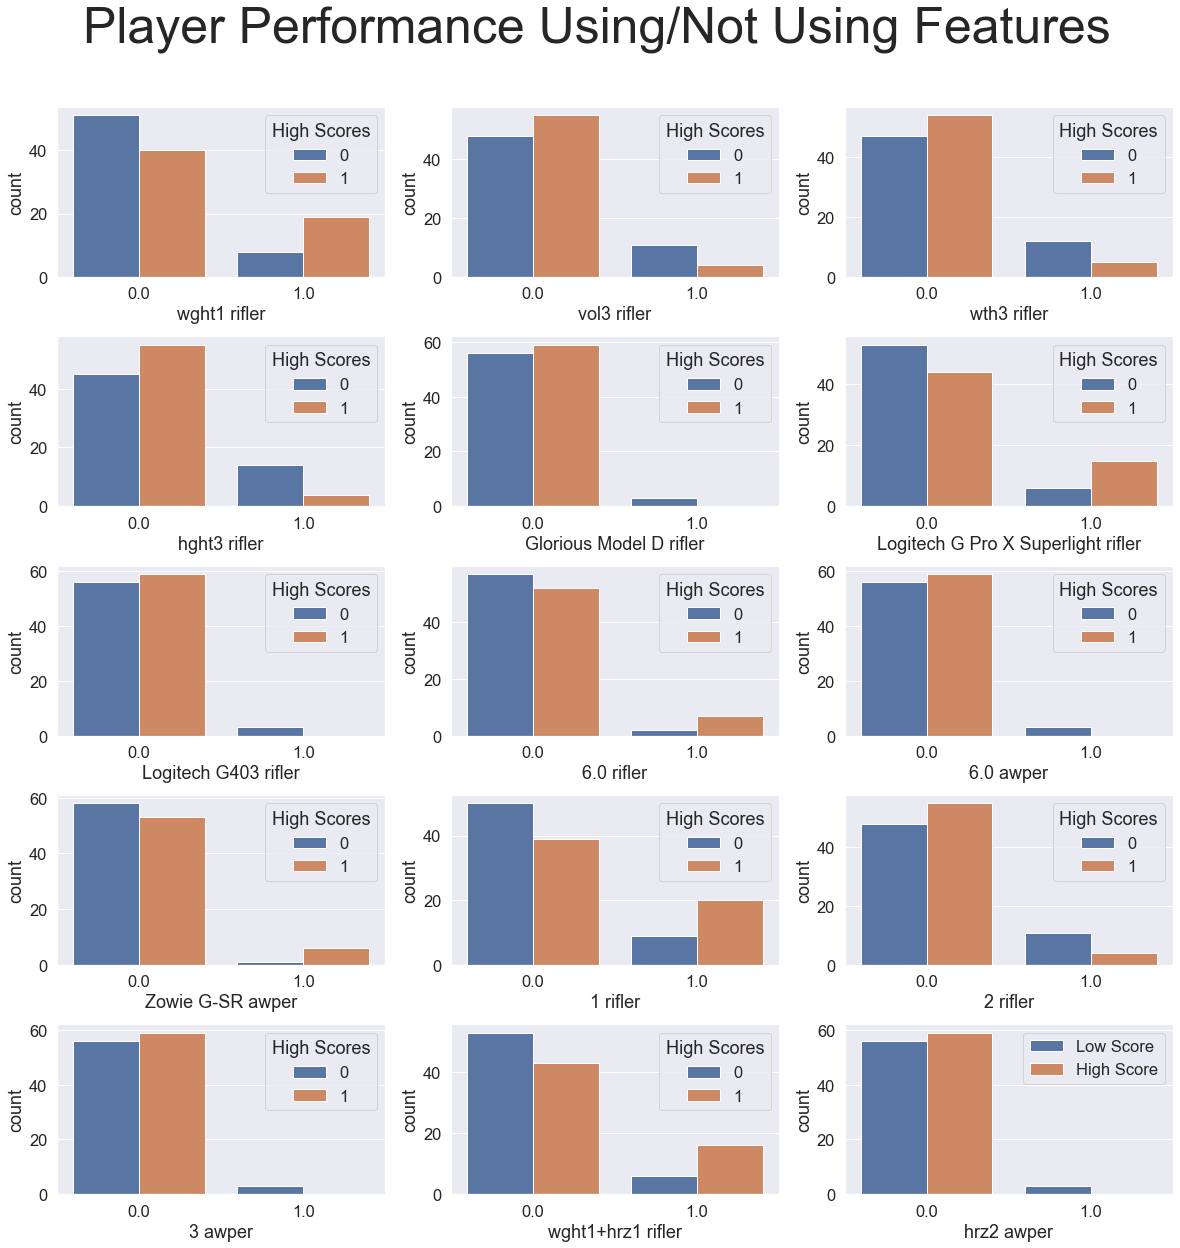

In [69]:
#SEABORN CATPLOT CANNOT TAKE AXIS 
# sns_col = pd.DataFrame(range(30))
gear_relations = [best_filter_sfxd, scored_high_spotted_sorted]
gear_relations = pd.concat(gear_relations, axis=1)
gear_relations = gear_relations.rename(columns={"scored_high_spotted": "High Scores"})
gear_relations.head()

fig, axs = plt.subplots(5, 3, figsize=(20,20))
fig.suptitle("Player Performance Using/Not Using Features", y=.95, fontsize=50)

sns.set(font_scale=1.5)

#Seaborn catplots cannot take axis, too difficult to make subplots.
#instead, using seaborn countplots, but left the names as catplots, as it came from the other kind=count catplots from eda
catplot = sns.countplot(x="wght1 rifler", hue="High Scores", data=gear_relations, ax=axs[0, 0])
plt.legend(labels=["Low Score","High Score"])

catplot = sns.countplot(x="vol3 rifler", hue="High Scores", data=gear_relations, ax=axs[0, 1])
plt.legend(labels=["Low Score","High Score"])

catplot = sns.countplot(x="wth3 rifler", hue="High Scores", data=gear_relations, ax=axs[0, 2])
plt.legend(labels=["Low Score","High Score"])

catplot = sns.countplot(x="hght3 rifler", hue="High Scores", data=gear_relations, ax=axs[1, 0])
plt.legend(labels=["Low Score","High Score"])

catplot = sns.countplot(x="Glorious Model D rifler", hue="High Scores", data=gear_relations, ax=axs[1, 1])
plt.legend(labels=["Low Score","High Score"])

catplot = sns.countplot(x="Logitech G Pro X Superlight rifler", hue="High Scores", data=gear_relations, ax=axs[1, 2])
plt.legend(labels=["Low Score","High Score"])

catplot = sns.countplot(x="Logitech G403 rifler", hue="High Scores", data=gear_relations, ax=axs[2, 0])
plt.legend(labels=["Low Score","High Score"])

catplot = sns.countplot(x="6.0 rifler", hue="High Scores", data=gear_relations, ax=axs[2, 1])
plt.legend(labels=["Low Score","High Score"])

catplot = sns.countplot(x="6.0 awper", hue="High Scores", data=gear_relations, ax=axs[2, 2])
plt.legend(labels=["Low Score","High Score"])

catplot = sns.countplot(x="Zowie G-SR awper", hue="High Scores", data=gear_relations, ax=axs[3, 0])
plt.legend(labels=["Low Score","High Score"])

catplot = sns.countplot(x="1 rifler", hue="High Scores", data=gear_relations, ax=axs[3, 1])
plt.legend(labels=["Low Score","High Score"])

catplot = sns.countplot(x="2 rifler", hue="High Scores", data=gear_relations, ax=axs[3, 2])
plt.legend(labels=["Low Score","High Score"])

catplot = sns.countplot(x="3 awper", hue="High Scores", data=gear_relations, ax=axs[4, 0])
plt.legend(labels=["Low Score","High Score"])

catplot = sns.countplot(x="wght1+hrz1 rifler", hue="High Scores", data=gear_relations, ax=axs[4, 1])
plt.legend(labels=["Low Score","High Score"])

catplot = sns.countplot(x="hrz2 awper", hue="High Scores", data=gear_relations, ax=axs[4, 2])
plt.legend(labels=["Low Score","High Score"])




# axs[4, 2].axis("off") #hides unused

fig.subplots_adjust(hspace=.35)
fig.tight_layout







## MODELING
*All Models were evaluated on average test and train accuracy scores across all splits of cross validation with k = 50 (nearly leave-one-out). Those average scores were also averaged together anywhere from 10 to 30 times.*

#### Uniting dums of original features

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

#From original features, not using sequential feature selector so must use dums with dropped column.
original_features_frames = [df2['weight'], df2['width'], df2['length'], df2['height'], df2['volume'], df2['sens'], df2['hertz'],
                  speed_dums_mod, mpad_dums_mod, result_cat2_mod, type_dums_mod, mouse_dums_mod]
original_features = pd.concat(original_features_frames, axis = 1)


### Logistic Regression, Original Features

In [71]:
log_orig_scores = []
for i in range(1, 30):
    clf_log_orig_cv = LogisticRegression()
    Scoring = ["accuracy", "roc_auc"]
    cv_scores_orig = cross_validate(clf_log_orig_cv, original_features, scored_high_spotted_sorted, 
                                 cv=StratifiedKFold(n_splits=50, shuffle=True), scoring = Scoring)
    accuracy_score_mean_log_orig = np.mean(cv_scores_orig['test_accuracy'])
    log_orig_scores.append(accuracy_score_mean_log_orig)
    
orig_scores_avg = np.mean(log_orig_scores)
print('log = ', orig_scores_avg)

log =  0.5014942528735632


*So, a coin flip*

### Logistic Regression, Gridsearch, Lasso, Original Features

#### Gridsearch for best regularization parameter

In [72]:
from sklearn.model_selection import GridSearchCV
C = [.05, .1, .15, .2, .25, .5, .75, 1, 1.25, 1.5, 1.75, 2]
penalty=["l1"]
solver=["liblinear"]
grid_lasso = {'C': C, 'penalty': penalty, 'solver': solver}


search_lasso = GridSearchCV(estimator = LogisticRegression(), param_grid = grid_lasso)

lasso_best_params = search_lasso.fit(original_features, df2['scored_high_spotted'])

print(lasso_best_params.best_params_)

{'C': 0.25, 'penalty': 'l1', 'solver': 'liblinear'}


### Training/Evaluation

In [73]:
log_orig_scorelist_lasso = []
log_orig_trainlist_lasso = []
for i in range(1, 30):
    clf_log_orig_lasso = LogisticRegression(C=.25, penalty='l1', solver='liblinear')
    Scoring = ["accuracy", "roc_auc"]
    cv_scores_orig_lasso = cross_validate(clf_log_orig_lasso, original_features, scored_high_spotted_sorted, 
                                 cv=StratifiedKFold(n_splits=50, shuffle=True), scoring = Scoring, return_train_score=True)
    cv_score_mean_log_orig_lasso = np.mean(cv_scores_orig_lasso['test_accuracy'])
    log_orig_scorelist_lasso.append(cv_score_mean_log_orig_lasso)
    cv_train_mean_log_orig_lasso = np.mean(cv_scores_orig_lasso['train_accuracy'])
    log_orig_trainlist_lasso.append(cv_train_mean_log_orig_lasso)
    
orig_scores_lasso_avg = np.mean(log_orig_scorelist_lasso)
orig_train_lasso_avg = np.mean(log_orig_trainlist_lasso)
print('log_lasso = ', orig_scores_lasso_avg)
print('log_lasso_train = ', orig_train_lasso_avg)

log_lasso =  0.5626436781609195
log_lasso_train =  0.6026412138758206


*Improvement over logistic regression without regularization*

### Logistic Regression Wrapper/Filter Methods

*Here we want to optimize our model by finding which/the best number of features to select out of the high scoring features of our chi2 test with the target (scored high spotted). Those features are contained in the best_filter_sfxd dataframe. I have sequential feature selector run 10 times, collecting average accuracy scores from the leave-one-out cross validation. The number of features that maximized those average accuracy scores are then displayed, to get an idea of which amount to choose. If the index of the list associated with a max average accuracy is odd, it came from forward selection, otherwise even index means backwards. However I found backwards always performs better.*


In [74]:
from sklearn.model_selection import StratifiedKFold
import time
from sklearn.feature_selection import SequentialFeatureSelector


maximums=[]
best_sfs_model=[]
for run in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    sfs_score_list = []
    for i in range(len(best_filter_sfxd.columns)-1):
        sfs_forward_log = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=i+1,
                                                direction='forward', scoring = 'accuracy').fit(best_filter_sfxd, scored_high_spotted_sorted)


        sfs_backward_log = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=i+1,
                                                 direction='backward', scoring = 'accuracy').fit(best_filter_sfxd, scored_high_spotted_sorted)

        mask_all_log = sfs_forward_log.get_support()
        features_all_log = best_filter_sfxd.columns[mask_all_log] 
        features_all_log = np.asarray(features_all_log) #was an object, now takes whats inside and makes array
        #print(features_all_log)
        mask_allb_log = sfs_backward_log.get_support()
        features_allb_log = best_filter_sfxd.columns[mask_allb_log]
        features_allb_log = np.asarray(features_allb_log) #was an object, now takes whats inside and makes array
        #print(features_allb_log)
        sfs_forward_log = sfs_forward_log.transform(best_filter_sfxd)
        sfs_backward_log = sfs_backward_log.transform(best_filter_sfxd)
        sfs_forward_log = pd.DataFrame(sfs_forward_log)
        sfs_backward_log= pd.DataFrame(sfs_backward_log)
        sfs_forward_log.columns = features_all_log  
        sfs_backward_log.columns = features_allb_log  

    #     print(sfs_forward_log)
    #     print(sfs_backward_log)

       
        clf_log_f_filt_cv = LogisticRegression()
        clf_log_b_filt_cv = LogisticRegression()
        Scoring = ["accuracy", "roc_auc"]
        cv_scores_f = cross_validate(clf_log_f_filt_cv, sfs_forward_log, scored_high_spotted_sorted, cv=StratifiedKFold(n_splits=50, shuffle=True), 
                                     scoring = Scoring)
        cv_scores_b = cross_validate(clf_log_b_filt_cv, sfs_backward_log, scored_high_spotted_sorted, cv=StratifiedKFold(n_splits=50, shuffle=True), 
                                     scoring = Scoring)

        accuracy_score_mean_f = np.mean(cv_scores_f['test_accuracy'])
        auc_score_mean_f = np.mean(cv_scores_f['test_roc_auc'])
        #print("accuracy forward =", acc_score_mean_f)
        #print("auc forward =", auc_score_mean_f)

        accuracy_score_mean_b = np.mean(cv_scores_b['test_accuracy'])
        auc_score_mean_b = np.mean(cv_scores_b['test_roc_auc'])
        #print("accuracy backward =", acc_score_mean_b)
        #print("auc backward =", auc_score_mean_b)
        sfs_score_list.append(accuracy_score_mean_f)
        sfs_score_list.append(accuracy_score_mean_b)
#     print(sfs_score_list)
#     print(max(sfs_score_list))
    where_max = np.where(sfs_score_list == max(sfs_score_list))
#     print(where_max[0])
    maximums.append(max(sfs_score_list))
    best_sfs_model.append(where_max[0])
    
    
best_sfs_model = np.hstack(best_sfs_model)
print(maximums)
print(best_sfs_model)
print(np.unique(best_sfs_model,return_counts=True))
#odds f evens b

[0.6866666666666665, 0.7, 0.6766666666666665, 0.69, 0.69, 0.6966666666666665, 0.6866666666666665, 0.69, 0.6833333333333332, 0.68]
[11 15 17  9 18 19 20 25 11 18 13 14 22 22 13 17 21]
(array([ 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 22, 25], dtype=int64), array([1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1], dtype=int64))


*Above suggests what number of features to train with, out of our best chi2 scorers in best_filter_sfxd. It tends to vary. # of features to select = half of the index number displayed (forward/backward was used for each run and appended together to the list), and even or odd index number tells you forward or backward respectivley.*

#### Training/Evaluation

In [75]:
log_scorelist_sfsb = []
log_trainlist_sfsb = []
   
for i in range(1, 30):
    sfs_backward_log = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=8,
                                             direction='backward', scoring = 'accuracy').fit(best_filter_sfxd, scored_high_spotted_sorted)

   
    
    mask_allb_log = sfs_backward_log.get_support()
    features_allb_log = best_filter_sfxd.columns[mask_allb_log]
    features_allb_log = np.asarray(features_allb_log) #was an object, now takes whats inside and makes array
    #print(features_allb_log)
    
    sfs_backward_log = sfs_backward_log.transform(best_filter_sfxd)
    
    sfs_backward_log= pd.DataFrame(sfs_backward_log)
    
    sfs_backward_log.columns = features_allb_log  

    

    
    clf_log_b_filt_cv = LogisticRegression()
    Scoring = ["accuracy"]
    cv_scores_sfsb = cross_validate(clf_log_b_filt_cv, sfs_backward_log, scored_high_spotted_sorted, cv=StratifiedKFold(n_splits=50, shuffle=True), 
                                 scoring = Scoring, return_train_score=True, return_estimator=True)
    cv_score_mean_log_sfsb = np.mean(cv_scores_sfsb['test_accuracy'])
    log_scorelist_sfsb.append(cv_score_mean_log_sfsb)
    cv_train_mean_log_sfsb = np.mean(cv_scores_sfsb['train_accuracy'])
    log_trainlist_sfsb.append(cv_train_mean_log_sfsb)
    
scores_sfsb_avg = np.mean(log_scorelist_sfsb)
scores_train_sfsb_avg = np.mean(log_trainlist_sfsb)
print('log_sfsb = ', scores_sfsb_avg)
print('log_sfsb_train = ', scores_train_sfsb_avg)
print(sfs_backward_log.columns)
print(cv_scores_sfsb['estimator'][1].coef_)


### GOT BACK ABOVE 67% after setting random state on clusters

log_sfsb =  0.6744827586206896
log_sfsb_train =  0.6779424081062916
Index(['Logitech G Pro X Superlight rifler', 'wght1+hrz1 rifler', '1 rifler',
       'hght3 rifler', 'hrz2 awper', '6.0 awper', 'Zowie G-SR awper',
       '3 awper'],
      dtype='object')
[[ 0.35175089  0.32092142  0.54687616 -0.84559229 -0.5744401  -0.49028717
   1.03579055 -0.5744401 ]]


*This is our best performing model, and its classification accuracy has improved over 17% over our models that use the original features only. Test accuracy = 0.672 and Train accuracy = 0.678, which suggests we are not overfitting. This is far better than a coin flip! You can see the chosen features and their model coefficients in the output cell as well. Notice however how many of the chosen features end up in the model just to classify the 3 or so players that use them. Specifically, the features: '6.0 awper','hrz2 awper', and '3 awper'. There is no guarantee that the distribution of high-scorers using those features is the same across all players in reality, it's just that way in our sample of 118 players. However my goal was to see if you actually could model whether a players aim was above average based on their gear/settings alone, and these results may suggest you currently can. I’m very curious what performance could be accomplished if I had more data, but also how this current model performs on the whole population.*

### Knn Original Features

### Gridsearch for optimal parameters

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

neighbors = [2, 3, 5, 10, 15]
weights = ["uniform", "distance"]
#algo = ["ball_tree", "kd_tree", "brute"]
metric = ["euclidean", "minkowski", "hamming"]



grid_knn = {'n_neighbors': neighbors,
            'weights': weights,
            #'algorithm': algo,
            'metric': metric}




search_knn = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = grid_knn)



knn_best_params = search_knn.fit(original_features, scored_high_spotted_sorted)

print(knn_best_params.best_params_)

{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}


#### Training/Evaluation

In [77]:
knn_orig_scores = []
knn_train_scores = []
for i in range(1, 30):
    clf_knn_orig_cv = KNeighborsClassifier(n_neighbors=15, weights='uniform', metric='euclidean')
    Scoring = ["accuracy"]
    cv_scores_orig = cross_validate(clf_knn_orig_cv, original_features, scored_high_spotted_sorted, 
                                 cv=StratifiedKFold(n_splits=50, shuffle=True), scoring = Scoring, return_train_score=True)
    accuracy_score_mean_knn_orig = np.mean(cv_scores_orig['test_accuracy'])
    train_score_mean_knn_orig = np.mean(cv_scores_orig['train_accuracy'])
    knn_orig_scores.append(accuracy_score_mean_knn_orig)
    knn_train_scores.append(train_score_mean_knn_orig)
    
orig_scores_avg = np.mean(knn_orig_scores)
train_scores_avg = np.mean(knn_train_scores)
print('knn acc = ', orig_scores_avg)
print('train acc = ', train_scores_avg)

knn acc =  0.5304597701149425
train acc =  0.59476353202709


*Another coin flip*

## K Nearest Neighbors, Wrapper/Filter Methods
*NOTE: The number of features suggested to select as well as parameters to use must be updated each cell.
Also, this code was copied from the other cell and so things are still labeled as "log" instead of "knn".*

#### Finding best params over all features of best_filter_sfxd before finding how many features to use, then repeating to refine.

In [78]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [2, 3, 5, 10, 15]
weights = ["uniform", "distance"]
#algo = ["ball_tree", "kd_tree", "brute"]
metric = ["euclidean", "minkowski", "hamming"]



grid_knn = {'n_neighbors': neighbors,
            'weights': weights,
            #'algorithm': algo,
            'metric': metric}




search_knn = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = grid_knn)



knn_best_params = search_knn.fit(best_filter_sfxd, scored_high_spotted_sorted)

print(knn_best_params.best_params_)


{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


#### Getting idea of range of features to select

In [79]:
maximums=[]
best_sfs_model=[]
for run in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    sfs_score_list = []
    for i in range(len(best_filter_sfxd.columns)-1):
        sfs_forward_log = SequentialFeatureSelector(KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean'), n_features_to_select=i+1,
                                                direction='forward', scoring = 'accuracy').fit(best_filter_sfxd, scored_high_spotted_sorted)


        sfs_backward_log = SequentialFeatureSelector(KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean'), n_features_to_select=i+1,
                                                 direction='backward', scoring = 'accuracy').fit(best_filter_sfxd, scored_high_spotted_sorted)

        mask_all_log = sfs_forward_log.get_support()
        features_all_log = best_filter_sfxd.columns[mask_all_log] 
        features_all_log = np.asarray(features_all_log) #was an object, now takes whats inside and makes array
        #print(features_all_log)
        mask_allb_log = sfs_backward_log.get_support()
        features_allb_log = best_filter_sfxd.columns[mask_allb_log]
        features_allb_log = np.asarray(features_allb_log) #was an object, now takes whats inside and makes array
        #print(features_allb_log)
        sfs_forward_log = sfs_forward_log.transform(best_filter_sfxd)
        sfs_backward_log = sfs_backward_log.transform(best_filter_sfxd)
        sfs_forward_log = pd.DataFrame(sfs_forward_log)
        sfs_backward_log= pd.DataFrame(sfs_backward_log)
        sfs_forward_log.columns = features_all_log  
        sfs_backward_log.columns = features_allb_log  

    #     print(sfs_forward_log)
    #     print(sfs_backward_log)

        
        clf_knn_f_filt_cv = KNeighborsClassifier(n_neighbors=15, weights='uniform', metric='euclidean')
        clf_knn_b_filt_cv = KNeighborsClassifier(n_neighbors=15, weights='uniform', metric='euclidean')
        Scoring = ["accuracy", "roc_auc"]
        cv_scores_f = cross_validate(clf_knn_f_filt_cv, sfs_forward_log, scored_high_spotted_sorted, cv=StratifiedKFold(n_splits=10, shuffle=True), 
                                     scoring = Scoring)
        cv_scores_b = cross_validate(clf_knn_b_filt_cv, sfs_backward_log, scored_high_spotted_sorted, cv=StratifiedKFold(n_splits=10, shuffle=True), 
                                     scoring = Scoring)

        accuracy_score_mean_f = np.mean(cv_scores_f['test_accuracy'])
        auc_score_mean_f = np.mean(cv_scores_f['test_roc_auc'])
        #print("accuracy forward =", acc_score_mean_f)
        #print("auc forward =", auc_score_mean_f)

        accuracy_score_mean_b = np.mean(cv_scores_b['test_accuracy'])
        auc_score_mean_b = np.mean(cv_scores_b['test_roc_auc'])
        #print("accuracy backward =", acc_score_mean_b)
        #print("auc backward =", auc_score_mean_b)
        sfs_score_list.append(accuracy_score_mean_f)
        sfs_score_list.append(accuracy_score_mean_b)
#     print(sfs_score_list)
#     print(max(sfs_score_list))
    where_max = np.where(sfs_score_list == max(sfs_score_list))
#     print(where_max[0])
    maximums.append(max(sfs_score_list))
    best_sfs_model.append(where_max[0])
    
    
best_sfs_model = np.hstack(best_sfs_model)
print(maximums)
print(best_sfs_model)
print(np.unique(best_sfs_model,return_counts=True))

#odds f evens b

[0.628030303030303, 0.6121212121212121, 0.6181818181818182, 0.6189393939393939, 0.6106060606060606, 0.6098484848484849, 0.6174242424242424, 0.6166666666666666, 0.6068181818181818, 0.6174242424242424]
[17 17 23 24 25 27 15 17  8 17 24]
(array([ 8, 15, 17, 23, 24, 25, 27], dtype=int64), array([1, 1, 4, 1, 2, 1, 1], dtype=int64))


#### Going with 8 features
*NOTE: The number of features suggested to select as well as range of parameters to use must be updated between runs*

In [80]:
sfs_backward_log = SequentialFeatureSelector(KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean'), n_features_to_select=8,
                                         direction='backward', scoring = 'accuracy').fit(best_filter_sfxd, scored_high_spotted_sorted)


mask_allb_log = sfs_backward_log.get_support()
features_allb_log = best_filter_sfxd.columns[mask_allb_log]
features_allb_log = np.asarray(features_allb_log) #was an object, now takes whats inside and makes array
#print(features_allb_log)

sfs_backward_log = sfs_backward_log.transform(best_filter_sfxd)

sfs_backward_log= pd.DataFrame(sfs_backward_log)

sfs_backward_log.columns = features_allb_log  



neighbors = [2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
weights = ["uniform", "distance"]
#algo = ["ball_tree", "kd_tree", "brute"]
metric = ["euclidean", "minkowski", "hamming"]



grid_knn = {'n_neighbors': neighbors,
            'weights': weights,
            #'algorithm': algo,
            'metric': metric}




search_knn = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = grid_knn)



knn_best_params = search_knn.fit(sfs_backward_log, scored_high_spotted_sorted)

print(knn_best_params.best_params_)


{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


#### So we found to use 3 neighbors for our 8 features
*NOTE: The number of features suggested to select as well as range of parameters to use must be updated between runs*

In [81]:
knn_scores = []
knn_train_scores = []
   
for i in range(1, 30):
    sfs_backward_log = SequentialFeatureSelector(KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean'), n_features_to_select=8,
                                             direction='backward', scoring = 'accuracy').fit(best_filter_sfxd, scored_high_spotted_sorted)

   
    
    mask_allb_log = sfs_backward_log.get_support()
    features_allb_log = best_filter_sfxd.columns[mask_allb_log]
    features_allb_log = np.asarray(features_allb_log) #was an object, now takes whats inside and makes array
    #print(features_allb_log)
    
    sfs_backward_log = sfs_backward_log.transform(best_filter_sfxd)
    
    sfs_backward_log= pd.DataFrame(sfs_backward_log)
    
    sfs_backward_log.columns = features_allb_log  

    

    
    clf_knn_cv = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric='euclidean')
    Scoring = ["accuracy"]
    cv_scores = cross_validate(clf_knn_cv, sfs_backward_log, scored_high_spotted_sorted, 
                                 cv=StratifiedKFold(n_splits=50, shuffle=True), scoring = Scoring, return_train_score=True)
    accuracy_score_mean_knn = np.mean(cv_scores['test_accuracy'])
    train_score_mean_knn = np.mean(cv_scores['train_accuracy'])
    knn_scores.append(accuracy_score_mean_knn)
    knn_train_scores.append(train_score_mean_knn)
    
scores_avg = np.mean(knn_scores)
train_scores_avg = np.mean(knn_train_scores)
print('knn acc = ', scores_avg)
print('train acc = ', train_scores_avg)
print(sfs_backward_log.columns)


knn acc =  0.6389655172413794
train acc =  0.665229695497079
Index(['wght1 rifler', 'wght1+hrz1 rifler', '1 rifler', 'hght3 rifler',
       'hrz2 awper', '6.0 awper', 'Zowie G-SR awper', '3 awper'],
      dtype='object')


*Still better than a coin flip, a drastic improvement over knn with original features (11% improvement).*

## Random Forest, Gridsearch, Original Features

### Gridsearch

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

n_trees = [500]
crit = ["gini", "entropy"]
min_split = [2, 3, 5]
min_leaf = [2, 3, 5]
max_features = ['auto']
bootstrap = [True, False]
max_depth = [3, 4, 5]

grid_rf ={'n_estimators': n_trees,
          'max_features': max_features,
          'min_samples_split': min_split,
          'min_samples_leaf': min_leaf,
          'criterion': crit,
          'bootstrap': bootstrap,
          'max_depth': max_depth}




search_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = grid_rf)



rf_best_params = search_rf.fit(original_features, scored_high_spotted_sorted)

print(rf_best_params.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500}


### Training/evaluation

In [83]:
rf_orig_scores = []
for i in range(1, 5):
    clf_rf_orig_cv = RandomForestClassifier(n_estimators=500, min_samples_split=3, min_samples_leaf=5, bootstrap = True,
                                        criterion = "gini", max_depth = 5)
    Scoring = ["accuracy", "roc_auc"]
    cv_scores_orig = cross_validate(clf_rf_orig_cv, original_features, scored_high_spotted_sorted, 
                                 cv=StratifiedKFold(n_splits=50, shuffle=True), scoring = Scoring)
    accuracy_score_mean_rf_orig = np.mean(cv_scores_orig['test_accuracy'])
    rf_orig_scores.append(accuracy_score_mean_rf_orig)
    
orig_scores_avg = np.mean(rf_orig_scores)
print('rf = ', orig_scores_avg)

rf =  0.4883333333333333


*No good*

## Random Forest, Gridsearch, Filter Methods

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

n_trees = [500]
crit = ["gini", "entropy"]
min_split = [2, 3, 5]
min_leaf = [2, 3, 5]
max_features = ['auto']
bootstrap = [True, False]
max_depth = [3, 4, 5]


grid_rf ={'n_estimators': n_trees,
#           'max_features': max_features,
          'min_samples_split': min_split,
          'min_samples_leaf': min_leaf,
          'criterion': crit,
          'bootstrap': bootstrap,
          'max_depth': max_depth}




search_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = grid_rf)



rf_best_params = search_rf.fit(best_filter_sfxd, scored_high_spotted_sorted)

print(rf_best_params.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


In [85]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

rf_bf_score_list = []
rf_bf_train_list = []
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:

    clf_rf_bf = RandomForestClassifier(n_estimators=500, min_samples_split=5, min_samples_leaf=2, bootstrap = True,
                                        criterion = "gini", max_depth = 3)

    Scoring = ["accuracy", "roc_auc"]

    cv_scores_rf_bf= cross_validate(clf_rf_bf, best_filter_sfxd, scored_high_spotted_sorted, cv=StratifiedKFold(n_splits=50, shuffle=True), 
                                 scoring = Scoring, return_train_score=True, return_estimator=True)




    accuracy_score_mean_rf_bf = np.mean(cv_scores_rf_bf['test_accuracy'])
    accuracy_train_mean_rf_bf = np.mean(cv_scores_rf_bf['train_accuracy'])
    # auc_score_mean_b = np.mean(cv_scores_b['test_roc_auc'])
#     print(accuracy_score_mean_rf_bf)
    rf_bf_score_list.append(accuracy_score_mean_rf_bf)
    rf_bf_train_list.append(accuracy_train_mean_rf_bf)
    
avg_acc_rf_bf = np.mean(rf_bf_score_list)
avg_train_rf_bf = np.mean(rf_bf_train_list)
print(avg_acc_rf_bf)
print(avg_train_rf_bf)




0.6686666666666666
0.6695088455772114


*Slightly Underperforms compared logistic regression, but still a 16% improvement over using the original features.*

#### Random forest feature importances

In [86]:
for model in cv_scores_rf_bf['estimator']:
#     print(model.feature_importances_)
      ya = model.feature_importances_

importance_columns = best_filter_sfxd.columns
feature_importance = pd.DataFrame(data = ya.reshape(1,-1), index = [1], columns = importance_columns)

importance_columns = np.asarray(importance_columns).tolist()
feature_importance = feature_importance.sort_values(by=1, ascending=True, axis=1) #had to revrese sort cus plot axis backwards

importance_columns = np.asarray(feature_importance.columns).tolist()


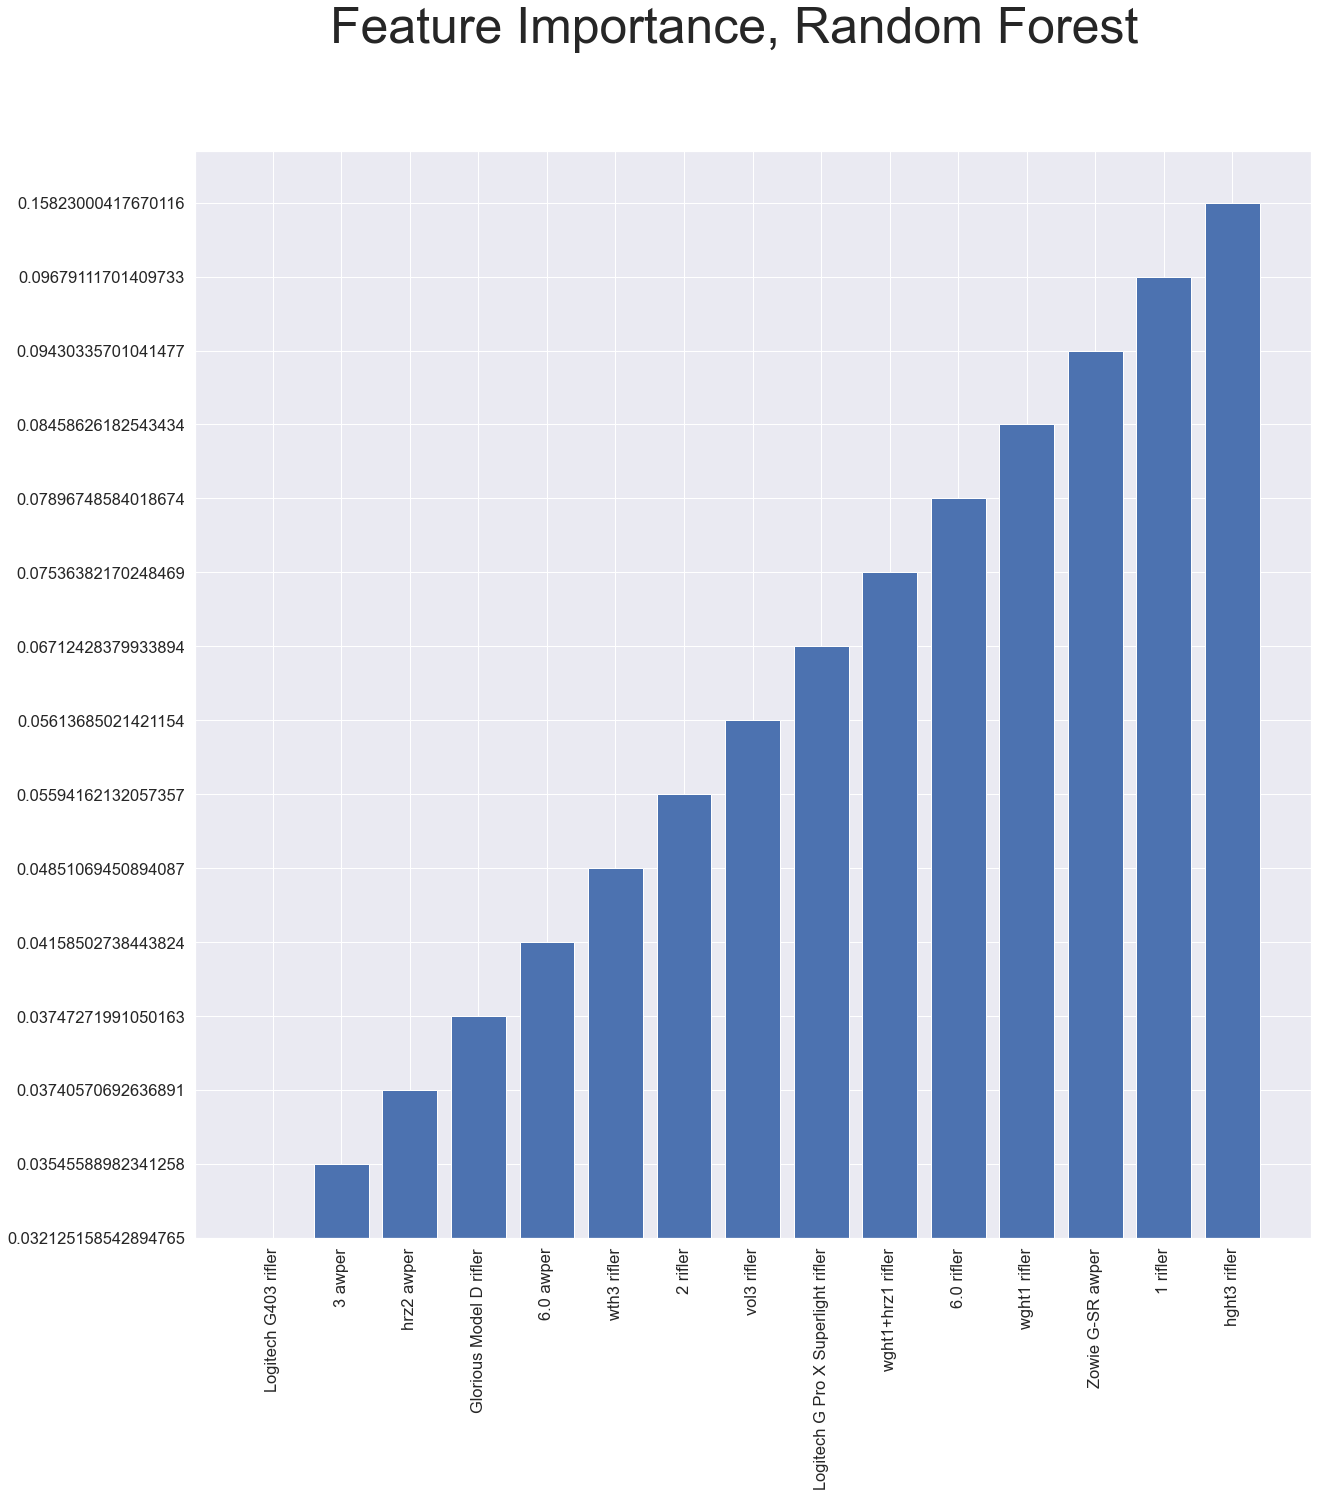

In [87]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Feature Importance, Random Forest', fontsize=50)
plt.xticks(rotation=90)
plt.bar(feature_importance.columns.astype(str), feature_importance.loc[1].values.astype(str))
plt.show()

*Above is essentially how important each of our features was to our model during classification.*